In [1]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install -q kaggle

In [4]:
!pip install Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**We are using Kaggle API to connect google colab with Kaggle dataset. So pleas upload your kaggle.json file, which is your kaggle API token to continue.**

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jiaxinli0v0","key":"b53f09b0cf56cfcaca4f037a0dec3aca"}'}

In [7]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


# 新段落

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
! kaggle datasets list

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16           9483        253  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1190         31  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36            912         28  1.0              
iammustafatz/diabetes-prediction-dataset               

In [10]:
!kaggle datasets download -d adityajn105/flickr8k

100% 1.03G/1.04G [00:49<00:00, 24.3MB/s]
100% 1.04G/1.04G [00:49<00:00, 22.6MB/s]


In [11]:
!kaggle datasets download -d anindya2906/glove6b

100% 843M/844M [00:45<00:00, 18.4MB/s]
100% 844M/844M [00:45<00:00, 19.6MB/s]


In [12]:
! mkdir data

In [13]:
! unzip glove6b.zip -d data

Archive:  glove6b.zip
  inflating: data/glove.6B.100d.txt  
  inflating: data/glove.6B.200d.txt  
  inflating: data/glove.6B.300d.txt  
  inflating: data/glove.6B.50d.txt   


In [14]:
! unzip flickr8k.zip -d data

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: data/Images/2844846111_8c1cbfc75d.jpg  
  inflating: data/Images/2844963839_ff09cdb81f.jpg  
  inflating: data/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: data/Images/2845691057_d4ab89d889.jpg  
  inflating: data/Images/2845845721_d0bc113ff7.jpg  
  inflating: data/Images/2846037553_1a1de50709.jpg  
  inflating: data/Images/2846785268_904c5fcf9f.jpg  
  inflating: data/Images/2846843520_b0e6211478.jpg  
  inflating: data/Images/2847514745_9a35493023.jpg  
  inflating: data/Images/2847615962_c330bded6e.jpg  
  inflating: data/Images/2847859796_4d9cb0d31f.jpg  
  inflating: data/Images/2848266893_9693c66275.jpg  
  inflating: data/Images/2848571082_26454cb981.jpg  
  inflating: data/Images/2848895544_6d06210e9d.jpg  
  inflating: data/Images/2848977044_446a31d86e.jpg  
  inflating: data/Images/2849194983_2968c72832.jpg  
  inflating: data/Images/2850719435_221f15e951.jpg  
  inflating: data/Images/2851198725_37b6027625.jpg  
  inflating: data/I

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

import string
import os
import glob
from PIL import Image
from time import time

from keras import Input, layers
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing import sequence
from keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Add
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from keras.layers import add
import concurrent.futures
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from concurrent.futures import ThreadPoolExecutor, as_completed
%load_ext Cython

In [2]:
token_path = "data/captions.txt"
images_path = "data/Images/"

In [3]:
doc = open(token_path,'r').read()

This code defines an optimized function **parse_descriptions_cython** that takes a string doc as input and returns a dictionary **descriptions**. It processes the input string, which contains image names and their corresponding captions, and stores them in the dictionary. The keys are image IDs (file names without file extensions), and their values are lists of captions associated with each image. The function is optimized with **Cython** for faster performance by disabling bounds checking and negative index wrapping.

In [4]:
%%cython
# cython: language_level=3
cimport cython

@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative index wrapping
cpdef dict parse_descriptions_cython(str doc):
    cdef dict descriptions = {}
    cdef list tokens
    cdef str image_id, image_desc
    for line in doc.split('\n')[1:]:
        tokens = line.split()
        if len(line) > 2:
            image_id = tokens[0].split('.')[0]
            image_desc = tokens[0].split(',')[1]+" "+' '.join(tokens[1:])
            if image_id not in descriptions:
                descriptions[image_id] = list()
            descriptions[image_id].append(image_desc)
    return descriptions

In [5]:
descriptions = parse_descriptions_cython(doc)

This code defines a function **clean_description** that takes a list of captions (desc_list) as input and returns a cleaned version of the captions, with **punctuation removed** and all words in lowercase. The function is then used in a parallelized manner with **concurrent.futures.ThreadPoolExecutor** to process all the lists of captions in the descriptions dictionary. The cleaned caption lists are combined with the original dictionary keys to create a new cleaned_descriptions dictionary, which is then assigned back to the descriptions variable.

In [6]:
import concurrent.futures
def clean_description(desc_list):
    cleaned_descriptions = []
    table = str.maketrans('', '', string.punctuation)
    for desc in desc_list:
        desc = desc.split()
        desc = [word.lower() for word in desc]
        desc = [w.translate(table) for w in desc]
        cleaned_descriptions.append(' '.join(desc))
    return cleaned_descriptions

with concurrent.futures.ThreadPoolExecutor(64) as executor:
    desc_lists = list(descriptions.values())
    cleaned_desc_lists = list(executor.map(clean_description, desc_lists))

cleaned_descriptions = dict(zip(descriptions.keys(), cleaned_desc_lists))
descriptions = cleaned_descriptions


Below is a example of images and captions example

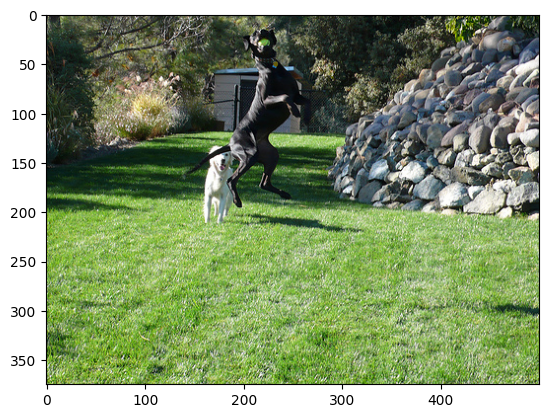

['a child in a pink dress is climbing up a set of stairs in an entry way ',
 'a girl going into a wooden building ',
 'a little girl climbing into a wooden playhouse ',
 'a little girl climbing the stairs to her playhouse ',
 'a little girl in a pink dress going into a wooden cabin ']

In [7]:
pic = '1679565118_d36f0d6d52.jpg'
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()
descriptions['1000268201_693b08cb0e']

This Cython code defines two functions, **create_lines_cython** and **build_new_descriptions_cython**, to create a single string containing image IDs and their corresponding cleaned descriptions.

**create_lines_cython** takes a tuple description_item containing an image ID and its associated list of descriptions. It returns a list of strings, with each string consisting of the image ID followed by a description.

**build_new_descriptions_cython** takes the descriptions dictionary as input and uses **concurrent.futures.ThreadPoolExecutor** to parallelize the processing of the dictionary items using **create_lines_cython**. The lists of strings returned by the function are combined into a single list lines. The function returns a single string containing all the lines joined with newline characters.

In [8]:
%%cython
# cython: language_level=3
import concurrent.futures
cimport cython

@cython.boundscheck(False)  # Deactivate bounds checking
@cython.wraparound(False)   # Deactivate negative index wrapping
cpdef list create_lines_cython(tuple description_item):
    key, desc_list = description_item
    lines = [key + ' ' + desc for desc in desc_list]
    return lines

cpdef str build_new_descriptions_cython(dict descriptions):
    with concurrent.futures.ThreadPoolExecutor(10) as executor:
        lines_results = executor.map(create_lines_cython, descriptions.items())

    lines = []
    for lines_result in lines_results:
        lines.extend(lines_result)

    return '\n'.join(lines)



In [9]:
new_descriptions = build_new_descriptions_cython(descriptions)

train test split

In [10]:
train_keys = list(descriptions.keys())[:8000]
test_keys = list(descriptions.keys())[8000:]

This code defines a function **filter_images** that takes an img_path and a set of image keys as input. The function returns a list of image file paths that match the given keys by filtering out images that do not have their IDs in the keys set.

The code then uses **concurrent.futures.ThreadPoolExecutor** to run two instances of the filter_images function in parallel.

In [11]:
def filter_images(img_path, keys):
    return [img for img in glob.glob(img_path + '*.jpg') if img[len(img_path):-4] in keys]

with concurrent.futures.ThreadPoolExecutor(100) as executor:
    train_img_future = executor.submit(filter_images, images_path, train_keys)
    test_img_future = executor.submit(filter_images, images_path, test_keys)

train_img = train_img_future.result()
test_img = test_img_future.result()

This code processes the **new_descriptions** string to create a **train_descriptions** dictionary and an all_train_captions list for the training set, adding 'startseq' and 'endseq' tokens to each caption. The 'startseq' and 'endseq' tokens are used for models to start generating and end generating captions later in the result. They also involved in trainning part.

In [12]:
from collections import defaultdict

train_descriptions = defaultdict(list)
all_train_captions = []

for line in new_descriptions.split('\n'):
    tokens = line.split()
    image_id, image_desc = tokens[0], tokens[1:]
    
    if image_id in train_keys:
        desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
        train_descriptions[image_id].append(desc)
        all_train_captions.append(desc)

This code defines a **count_words** function that takes a list of sentences and returns a **Counter** object containing the count of each word. It then calculates the total word counts from all_train_captions in parallel using **ThreadPoolExecutor**.

A **word_count_threshold** is set, and the final vocabulary is created by including only words with a count equal to or greater than the threshold. 

In [13]:
from collections import Counter

def count_words(sentences):
    word_counts = Counter()
    for sent in sentences:
        word_counts.update(sent.split(' '))
    return word_counts

word_count_threshold = 10
chunk_size = len(all_train_captions) // 4 

with concurrent.futures.ThreadPoolExecutor(10) as executor:
    word_counts_chunks = list(executor.map(count_words, [all_train_captions[i:i+chunk_size] for i in range(0, len(all_train_captions), chunk_size)]))

word_counts = sum(word_counts_chunks, Counter())

vocab = [w for w, count in word_counts.items() if count >= word_count_threshold]

print('Vocabulary = %d' % (len(vocab)))

Vocabulary = 1948


This code creates two dictionaries, ixtoword and wordtoix, for converting words to indices and vice versa. It iterates through the vocab list, assigning a unique index to each word in both dictionaries. The vocab_size is then calculated by adding 1 to the number of unique words in ixtoword. We will use these two dictionaries in the searching algorithm when we generating captions to the image.

In [14]:
ixtoword = {}
wordtoix = {}
ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

vocab_size = len(ixtoword) + 1

This code creates a list all_desc containing all descriptions from the train_descriptions dictionary. It calculates the max_length of descriptions by finding the longest description in terms of the number of words. This will gurantee that we do not exceed the maximum length of words when generating captions to the test image.

In [15]:
all_desc = list()
for key in train_descriptions.keys():
    [all_desc.append(d) for d in train_descriptions[key]]
lines = all_desc
max_length = max(len(d.split()) for d in lines)

print('Description Length: %d' % max_length)

Description Length: 38


This code initializes an **embeddings_index** dictionary to store word embeddings. It reads the pre-trained **GloVe** embeddings file 'glove.6B.200d.txt' line by line. For each line, it splits the values, extracts the word, and converts the embedding coefficients into a NumPy array of type 'float32'. 

In [16]:
embeddings_index = {} 
f = open(os.path.join('data/glove.6B.200d.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

This code iterates through the wordtoix dictionary and retrieves the corresponding embedding vector from the embeddings_index created above. 
The **embedding_matrix** stores the GloVe word embeddings as vector representations of words.



In [17]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in wordtoix.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

This code imports necessary libraries and sets the Keras backend to PlaidML. It defines an extract_features function that preprocesses an image, resizing and normalization, and extracts features using an **Xception** model. The **Xception** model is used to extract feature vectors for each image.

Setting num-thread to 16, and an **Xception** model instance is created for each thread. The code uses **ThreadPoolExecutor** to concurrently process the images in train_img and extract their features.

In [34]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import cv2
import numpy as np
from skimage import io
from tqdm import tqdm
from keras.applications.xception import Xception
import concurrent.futures
from time import time
def extract_features(img, model):
    image = io.imread(img)
    if image.ndim != 3:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = cv2.resize(image, (299, 299))
    image = np.expand_dims(image, axis=0)
    image = image / 127.5
    image = image - 1.0
    feature = model.predict(image)
    return img, feature
image_features = {}
image_features_test = {}

num_threads = 24

ts = time()
models = [Xception(include_top=False, pooling='avg') for _ in range(num_threads)]
with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
    futures = [executor.submit(extract_features, img, models[i % num_threads]) for i, img in enumerate(train_img)]
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(train_img)):
        img, feature = future.result()
        image_features[img[len(images_path):]] = feature.squeeze()
train_features = image_features
print('\n Preprocessing takes:', time()-ts)

  0%|          | 0/8000 [00:00<?, ?it/s]

1/1 [==============================] - 18s 18s/step


  0%|          | 1/8000 [00:19<43:35:12, 19.62s/it]

1/1 [==============================] - ETA: 0s

  0%|          | 11/8000 [00:19<2:52:56,  1.30s/it]

1/1 [==============================] - 19s 19s/step


  0%|          | 18/8000 [00:19<1:30:45,  1.47it/s]

1/1 [==============================] - 0s 103ms/step


  0%|          | 24/8000 [00:20<1:03:08,  2.11it/s]

1/1 [==============================] - 0s 154ms/step


  0%|          | 28/8000 [00:20<47:50,  2.78it/s]  

1/1 [==============================] - ETA: 0s

  0%|          | 33/8000 [00:20<34:00,  3.90it/s]

1/1 [==============================] - 0s 180ms/step


  0%|          | 38/8000 [00:21<24:50,  5.34it/s]

1/1 [==============================] - 0s 121ms/step


  1%|          | 42/8000 [00:21<19:11,  6.91it/s]

1/1 [==============================] - 0s 167ms/step


  1%|          | 46/8000 [00:21<17:18,  7.66it/s]

1/1 [==============================] - ETA: 0s

  1%|          | 49/8000 [00:21<15:40,  8.45it/s]

1/1 [==============================] - 0s 114ms/step


  1%|          | 52/8000 [00:21<13:03, 10.14it/s]

1/1 [==============================] - 0s 103ms/step


  1%|          | 55/8000 [00:22<11:39, 11.37it/s]

1/1 [==============================] - 0s 175ms/step


  1%|          | 59/8000 [00:22<09:36, 13.79it/s]

1/1 [==============================] - ETA: 0s

  1%|          | 64/8000 [00:22<07:13, 18.31it/s]

1/1 [==============================] - 0s 138ms/step


  1%|          | 67/8000 [00:22<09:20, 14.15it/s]

1/1 [==============================] - ETA: 0s

  1%|          | 70/8000 [00:23<09:22, 14.10it/s]

1/1 [==============================] - ETA: 0s

  1%|          | 73/8000 [00:23<08:15, 15.99it/s]

1/1 [==============================] - 0s 132ms/step


  1%|          | 77/8000 [00:23<06:56, 19.03it/s]

1/1 [==============================] - 0s 131ms/step


  1%|          | 80/8000 [00:23<06:48, 19.40it/s]

1/1 [==============================] - 0s 169ms/step


  1%|          | 84/8000 [00:23<05:46, 22.83it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 87/8000 [00:23<07:41, 17.15it/s]

1/1 [==============================] - 0s 116ms/step


  1%|          | 90/8000 [00:24<08:09, 16.14it/s]

1/1 [==============================] - 0s 121ms/step


  1%|          | 94/8000 [00:24<07:36, 17.33it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 97/8000 [00:24<07:43, 17.03it/s]

1/1 [==============================] - 0s 159ms/step


  1%|▏         | 102/8000 [00:24<06:29, 20.29it/s]

1/1 [==============================] - ETA: 0s

  1%|▏         | 105/8000 [00:24<06:23, 20.58it/s]

1/1 [==============================] - 0s 108ms/step


  1%|▏         | 108/8000 [00:25<08:08, 16.17it/s]

1/1 [==============================] - 0s 117ms/step


  1%|▏         | 113/8000 [00:25<06:05, 21.58it/s]

1/1 [==============================] - 0s 86ms/step


  1%|▏         | 116/8000 [00:25<07:26, 17.65it/s]

1/1 [==============================] - ETA: 0s

  2%|▏         | 120/8000 [00:25<06:10, 21.29it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 123/8000 [00:25<07:00, 18.71it/s]

1/1 [==============================] - 0s 132ms/step


  2%|▏         | 126/8000 [00:25<08:00, 16.40it/s]

1/1 [==============================] - 0s 121ms/step


  2%|▏         | 129/8000 [00:26<07:33, 17.37it/s]

1/1 [==============================] - ETA: 0s

  2%|▏         | 131/8000 [00:26<07:51, 16.69it/s]

1/1 [==============================] - ETA: 0s

  2%|▏         | 136/8000 [00:26<06:12, 21.13it/s]

1/1 [==============================] - 0s 106ms/step


  2%|▏         | 140/8000 [00:26<06:34, 19.91it/s]

1/1 [==============================] - 0s 138ms/step


  2%|▏         | 143/8000 [00:26<07:38, 17.14it/s]

1/1 [==============================] - 0s 114ms/step


  2%|▏         | 145/8000 [00:26<07:27, 17.55it/s]

1/1 [==============================] - 0s 109ms/step


  2%|▏         | 147/8000 [00:27<07:16, 18.00it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 149/8000 [00:27<07:35, 17.23it/s]

1/1 [==============================] - 0s 162ms/step


  2%|▏         | 152/8000 [00:27<07:00, 18.68it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 157/8000 [00:27<05:28, 23.87it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 160/8000 [00:27<07:55, 16.50it/s]

1/1 [==============================] - ETA: 0s

  2%|▏         | 163/8000 [00:27<06:59, 18.69it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 166/8000 [00:28<06:48, 19.19it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 169/8000 [00:28<06:31, 20.02it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 173/8000 [00:28<05:28, 23.84it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 176/8000 [00:28<07:58, 16.36it/s]

1/1 [==============================] - 0s 98ms/step


  2%|▏         | 181/8000 [00:28<06:45, 19.27it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 184/8000 [00:28<06:32, 19.90it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 188/8000 [00:29<06:23, 20.36it/s]

1/1 [==============================] - ETA: 0s

  2%|▏         | 191/8000 [00:29<07:14, 17.98it/s]

1/1 [==============================] - ETA: 0s

  2%|▏         | 196/8000 [00:29<06:54, 18.84it/s]

1/1 [==============================] - 0s 107ms/step


  2%|▏         | 199/8000 [00:29<06:18, 20.64it/s]

1/1 [==============================] - 0s 86ms/step


  3%|▎         | 203/8000 [00:29<06:02, 21.54it/s]

1/1 [==============================] - ETA: 0s

  3%|▎         | 206/8000 [00:30<07:14, 17.96it/s]

1/1 [==============================] - 0s 81ms/step


  3%|▎         | 210/8000 [00:30<05:58, 21.75it/s]

1/1 [==============================] - 0s 86ms/step


  3%|▎         | 213/8000 [00:30<06:00, 21.59it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 216/8000 [00:30<05:48, 22.32it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 219/8000 [00:30<07:57, 16.30it/s]

1/1 [==============================] - 0s 81ms/step


  3%|▎         | 224/8000 [00:30<06:15, 20.70it/s]

1/1 [==============================] - 0s 106ms/step


  3%|▎         | 228/8000 [00:31<05:47, 22.39it/s]

1/1 [==============================] - 0s 101ms/step


  3%|▎         | 231/8000 [00:31<06:32, 19.79it/s]

1/1 [==============================] - ETA: 0s

  3%|▎         | 234/8000 [00:31<08:11, 15.81it/s]

1/1 [==============================] - 0s 77ms/step


  3%|▎         | 241/8000 [00:31<06:02, 21.38it/s]

1/1 [==============================] - 0s 100ms/step


  3%|▎         | 244/8000 [00:32<06:25, 20.10it/s]

1/1 [==============================] - 0s 64ms/step


  3%|▎         | 247/8000 [00:32<07:54, 16.35it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 253/8000 [00:32<05:36, 23.04it/s]

1/1 [==============================] - 0s 124ms/step


  3%|▎         | 256/8000 [00:32<07:17, 17.70it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 259/8000 [00:32<07:36, 16.96it/s]

1/1 [==============================] - 0s 91ms/step


  3%|▎         | 263/8000 [00:33<06:25, 20.09it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 267/8000 [00:33<05:40, 22.69it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 270/8000 [00:33<08:00, 16.07it/s]

1/1 [==============================] - 0s 77ms/step


  3%|▎         | 274/8000 [00:33<06:41, 19.26it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 278/8000 [00:33<05:37, 22.90it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▎         | 281/8000 [00:34<07:53, 16.29it/s]

1/1 [==============================] - 0s 82ms/step


  4%|▎         | 284/8000 [00:34<07:18, 17.60it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▎         | 290/8000 [00:34<06:59, 18.40it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▎         | 293/8000 [00:34<06:56, 18.50it/s]

1/1 [==============================] - ETA: 0s

  4%|▎         | 297/8000 [00:34<05:48, 22.13it/s]

1/1 [==============================] - 0s 62ms/step


  4%|▍         | 301/8000 [00:35<06:34, 19.52it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 304/8000 [00:35<07:11, 17.84it/s]

1/1 [==============================] - 0s 258ms/step


  4%|▍         | 307/8000 [00:35<08:40, 14.77it/s]

1/1 [==============================] - 0s 67ms/step


  4%|▍         | 310/8000 [00:35<07:40, 16.70it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 312/8000 [00:35<09:44, 13.14it/s]

1/1 [==============================] - ETA: 0s

  4%|▍         | 317/8000 [00:36<06:55, 18.51it/s]

1/1 [==============================] - 0s 278ms/step


  4%|▍         | 320/8000 [00:36<09:00, 14.20it/s]

1/1 [==============================] - 8s 8s/step


  4%|▍         | 322/8000 [00:36<11:00, 11.63it/s]

1/1 [==============================] - ETA: 0s

  4%|▍         | 328/8000 [00:36<07:08, 17.90it/s]

1/1 [==============================] - 6s 6s/step


  4%|▍         | 333/8000 [00:36<05:42, 22.37it/s]

1/1 [==============================] - 2s 2s/step


  4%|▍         | 338/8000 [00:37<04:53, 26.11it/s]

1/1 [==============================] - 0s 125ms/step


  4%|▍         | 342/8000 [00:37<06:55, 18.42it/s]

1/1 [==============================] - 0s 105ms/step


  4%|▍         | 345/8000 [00:37<08:22, 15.22it/s]

1/1 [==============================] - ETA: 0s

  4%|▍         | 350/8000 [00:37<06:32, 19.49it/s]

1/1 [==============================] - ETA: 0s

  4%|▍         | 353/8000 [00:37<06:02, 21.08it/s]

1/1 [==============================] - ETA: 0s

  4%|▍         | 358/8000 [00:38<05:09, 24.66it/s]

1/1 [==============================] - ETA: 0s

  5%|▍         | 361/8000 [00:38<05:19, 23.92it/s]

1/1 [==============================] - 0s 164ms/step


  5%|▍         | 364/8000 [00:38<05:14, 24.31it/s]

1/1 [==============================] - 0s 97ms/step


  5%|▍         | 367/8000 [00:38<09:02, 14.06it/s]

1/1 [==============================] - ETA: 0s

  5%|▍         | 370/8000 [00:38<07:58, 15.96it/s]

1/1 [==============================] - ETA: 0s

  5%|▍         | 375/8000 [00:39<05:59, 21.21it/s]

1/1 [==============================] - ETA: 0s

  5%|▍         | 378/8000 [00:39<06:00, 21.14it/s]

1/1 [==============================] - ETA: 0s

  5%|▍         | 383/8000 [00:39<05:22, 23.59it/s]

1/1 [==============================] - 0s 277ms/step


  5%|▍         | 386/8000 [00:39<06:49, 18.58it/s]

1/1 [==============================] - 0s 135ms/step


  5%|▍         | 389/8000 [00:39<07:34, 16.73it/s]

1/1 [==============================] - ETA: 0s

  5%|▍         | 391/8000 [00:40<08:40, 14.63it/s]

1/1 [==============================] - 0s 122ms/step


  5%|▍         | 394/8000 [00:40<07:40, 16.53it/s]

1/1 [==============================] - 0s 84ms/step


  5%|▍         | 398/8000 [00:40<06:20, 19.96it/s]

1/1 [==============================] - ETA: 0s

  5%|▌         | 404/8000 [00:40<05:11, 24.39it/s]

1/1 [==============================] - 0s 124ms/step


  5%|▌         | 407/8000 [00:40<05:16, 24.00it/s]

1/1 [==============================] - 0s 200ms/step


  5%|▌         | 410/8000 [00:40<05:52, 21.54it/s]

1/1 [==============================] - 0s 83ms/step


  5%|▌         | 413/8000 [00:41<08:21, 15.11it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 417/8000 [00:41<06:49, 18.53it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▌         | 420/8000 [00:41<06:09, 20.54it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▌         | 423/8000 [00:41<06:25, 19.67it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 428/8000 [00:41<05:06, 24.67it/s]

1/1 [==============================] - 0s 126ms/step


  5%|▌         | 431/8000 [00:41<05:02, 25.00it/s]

1/1 [==============================] - 0s 138ms/step


  5%|▌         | 434/8000 [00:42<06:46, 18.63it/s]

1/1 [==============================] - 0s 123ms/step


  5%|▌         | 437/8000 [00:42<06:50, 18.44it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▌         | 440/8000 [00:42<06:34, 19.17it/s]

1/1 [==============================] - ETA: 0s

  6%|▌         | 443/8000 [00:42<06:39, 18.92it/s]

1/1 [==============================] - ETA: 0s

  6%|▌         | 446/8000 [00:42<06:15, 20.10it/s]

1/1 [==============================] - 0s 123ms/step


  6%|▌         | 451/8000 [00:42<04:51, 25.91it/s]

1/1 [==============================] - ETA: 0s

  6%|▌         | 454/8000 [00:43<05:39, 22.21it/s]

1/1 [==============================] - 0s 128ms/step


  6%|▌         | 457/8000 [00:43<08:10, 15.36it/s]

1/1 [==============================] - 0s 103ms/step


  6%|▌         | 462/8000 [00:43<06:35, 19.04it/s]

1/1 [==============================] - ETA: 0s

  6%|▌         | 465/8000 [00:43<06:01, 20.86it/s]

1/1 [==============================] - 0s 161ms/step


  6%|▌         | 468/8000 [00:43<06:01, 20.86it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▌         | 471/8000 [00:43<06:26, 19.48it/s]

1/1 [==============================] - 0s 143ms/step


  6%|▌         | 477/8000 [00:44<06:56, 18.06it/s]

1/1 [==============================] - 0s 117ms/step


  6%|▌         | 480/8000 [00:44<06:23, 19.62it/s]

1/1 [==============================] - 0s 125ms/step


  6%|▌         | 483/8000 [00:44<06:15, 20.00it/s]

1/1 [==============================] - 0s 121ms/step


  6%|▌         | 488/8000 [00:44<04:59, 25.12it/s]

1/1 [==============================] - 0s 215ms/step


  6%|▌         | 491/8000 [00:44<06:12, 20.13it/s]

1/1 [==============================] - 0s 141ms/step


  6%|▌         | 495/8000 [00:45<05:20, 23.45it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 498/8000 [00:45<05:31, 22.61it/s]

1/1 [==============================] - ETA: 0s

  6%|▋         | 501/8000 [00:45<07:22, 16.96it/s]

1/1 [==============================] - 0s 107ms/step


  6%|▋         | 505/8000 [00:45<07:06, 17.56it/s]

1/1 [==============================] - 0s 85ms/step


  6%|▋         | 508/8000 [00:45<06:26, 19.37it/s]

1/1 [==============================] - ETA: 0s

  6%|▋         | 512/8000 [00:45<05:46, 21.61it/s]

1/1 [==============================] - 0s 139ms/step


  6%|▋         | 515/8000 [00:46<05:45, 21.65it/s]

1/1 [==============================] - ETA: 0s

  6%|▋         | 518/8000 [00:46<06:49, 18.28it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 523/8000 [00:46<05:35, 22.31it/s]

1/1 [==============================] - 0s 111ms/step


  7%|▋         | 526/8000 [00:46<06:05, 20.45it/s]

1/1 [==============================] - 0s 105ms/step


  7%|▋         | 529/8000 [00:46<07:20, 16.96it/s]

1/1 [==============================] - 0s 107ms/step


  7%|▋         | 535/8000 [00:47<05:36, 22.16it/s]

1/1 [==============================] - 0s 122ms/step


  7%|▋         | 538/8000 [00:47<05:56, 20.93it/s]

1/1 [==============================] - ETA: 0s

  7%|▋         | 541/8000 [00:47<06:11, 20.06it/s]

1/1 [==============================] - 0s 116ms/step


  7%|▋         | 544/8000 [00:47<06:59, 17.79it/s]

1/1 [==============================] - 0s 120ms/step


  7%|▋         | 548/8000 [00:47<05:59, 20.73it/s]

1/1 [==============================] - 0s 113ms/step


  7%|▋         | 551/8000 [00:47<06:43, 18.44it/s]

1/1 [==============================] - 0s 128ms/step


  7%|▋         | 555/8000 [00:48<05:47, 21.40it/s]

1/1 [==============================] - 0s 111ms/step


  7%|▋         | 559/8000 [00:48<05:19, 23.29it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 562/8000 [00:48<06:24, 19.35it/s]

1/1 [==============================] - 0s 110ms/step


  7%|▋         | 565/8000 [00:48<06:28, 19.15it/s]

1/1 [==============================] - 0s 90ms/step


  7%|▋         | 568/8000 [00:48<06:34, 18.83it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 573/8000 [00:48<05:24, 22.90it/s]

1/1 [==============================] - 0s 123ms/step


  7%|▋         | 576/8000 [00:49<05:43, 21.61it/s]

1/1 [==============================] - 0s 133ms/step


  7%|▋         | 579/8000 [00:49<06:26, 19.18it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 582/8000 [00:49<05:50, 21.18it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 585/8000 [00:49<05:42, 21.63it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 588/8000 [00:49<06:13, 19.82it/s]

1/1 [==============================] - ETA: 0s

  7%|▋         | 591/8000 [00:49<06:47, 18.17it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 594/8000 [00:50<06:36, 18.68it/s]

1/1 [==============================] - ETA: 0s

  7%|▋         | 599/8000 [00:50<05:52, 21.02it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 602/8000 [00:50<05:35, 22.03it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 605/8000 [00:50<06:14, 19.76it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 608/8000 [00:50<06:20, 19.45it/s]

1/1 [==============================] - 0s 119ms/step


  8%|▊         | 611/8000 [00:50<06:22, 19.31it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 613/8000 [00:51<07:21, 16.75it/s]

1/1 [==============================] - 0s 156ms/step


  8%|▊         | 618/8000 [00:51<05:22, 22.92it/s]

1/1 [==============================] - 0s 130ms/step


  8%|▊         | 621/8000 [00:51<05:14, 23.46it/s]

1/1 [==============================] - 0s 112ms/step


  8%|▊         | 624/8000 [00:51<06:38, 18.51it/s]

1/1 [==============================] - 0s 163ms/step


  8%|▊         | 627/8000 [00:51<06:26, 19.09it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 630/8000 [00:51<06:29, 18.90it/s]

1/1 [==============================] - 0s 119ms/step


  8%|▊         | 633/8000 [00:52<06:20, 19.36it/s]

1/1 [==============================] - 0s 266ms/step


  8%|▊         | 636/8000 [00:52<07:32, 16.26it/s]

1/1 [==============================] - 0s 138ms/step


  8%|▊         | 641/8000 [00:52<06:02, 20.32it/s]

1/1 [==============================] - 0s 130ms/step


  8%|▊         | 646/8000 [00:52<04:54, 24.97it/s]

1/1 [==============================] - 0s 100ms/step


  8%|▊         | 649/8000 [00:52<05:59, 20.44it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 653/8000 [00:53<07:00, 17.48it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 656/8000 [00:53<07:47, 15.72it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 660/8000 [00:53<06:29, 18.82it/s]

1/1 [==============================] - 0s 162ms/step


  8%|▊         | 663/8000 [00:53<07:13, 16.93it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 668/8000 [00:53<05:47, 21.12it/s]

1/1 [==============================] - 0s 74ms/step


  8%|▊         | 671/8000 [00:54<06:11, 19.75it/s]

1/1 [==============================] - ETA: 0s

  8%|▊         | 674/8000 [00:54<06:04, 20.11it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 677/8000 [00:54<07:02, 17.33it/s]

1/1 [==============================] - ETA: 0s

  9%|▊         | 681/8000 [00:54<05:47, 21.04it/s]

1/1 [==============================] - ETA: 0s

  9%|▊         | 684/8000 [00:54<05:32, 22.00it/s]

1/1 [==============================] - 0s 111ms/step


  9%|▊         | 687/8000 [00:54<05:33, 21.95it/s]

1/1 [==============================] - ETA: 0s

  9%|▊         | 690/8000 [00:54<05:41, 21.38it/s]

1/1 [==============================] - 0s 156ms/step


  9%|▊         | 693/8000 [00:55<07:36, 16.01it/s]

1/1 [==============================] - 0s 82ms/step


  9%|▊         | 697/8000 [00:55<06:04, 20.01it/s]

1/1 [==============================] - 0s 119ms/step


  9%|▉         | 700/8000 [00:55<06:26, 18.90it/s]

1/1 [==============================] - 0s 126ms/step


  9%|▉         | 703/8000 [00:55<05:59, 20.28it/s]

1/1 [==============================] - ETA: 0s

  9%|▉         | 706/8000 [00:55<05:28, 22.20it/s]

1/1 [==============================] - 0s 121ms/step


  9%|▉         | 709/8000 [00:55<06:24, 18.96it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 712/8000 [00:56<05:51, 20.72it/s]

1/1 [==============================] - ETA: 0s

  9%|▉         | 715/8000 [00:56<06:11, 19.59it/s]

1/1 [==============================] - ETA: 0s

  9%|▉         | 718/8000 [00:56<06:37, 18.31it/s]

1/1 [==============================] - 0s 141ms/step


  9%|▉         | 720/8000 [00:56<06:43, 18.06it/s]

1/1 [==============================] - 0s 122ms/step


  9%|▉         | 723/8000 [00:56<07:17, 16.62it/s]

1/1 [==============================] - ETA: 0s

  9%|▉         | 728/8000 [00:56<05:15, 23.08it/s]

1/1 [==============================] - 0s 134ms/step


  9%|▉         | 731/8000 [00:56<05:08, 23.56it/s]

1/1 [==============================] - 0s 114ms/step


  9%|▉         | 734/8000 [00:57<06:28, 18.71it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▉         | 737/8000 [00:57<06:50, 17.69it/s]

1/1 [==============================] - 0s 116ms/step


  9%|▉         | 741/8000 [00:57<07:25, 16.31it/s]

1/1 [==============================] - 0s 127ms/step


  9%|▉         | 746/8000 [00:57<05:40, 21.32it/s]

1/1 [==============================] - 0s 131ms/step


  9%|▉         | 750/8000 [00:58<05:17, 22.82it/s]

1/1 [==============================] - 0s 184ms/step


  9%|▉         | 754/8000 [00:58<04:36, 26.20it/s]

1/1 [==============================] - 0s 163ms/step


  9%|▉         | 757/8000 [00:58<05:24, 22.32it/s]

1/1 [==============================] - 0s 107ms/step


 10%|▉         | 760/8000 [00:58<06:23, 18.87it/s]

1/1 [==============================] - 0s 132ms/step


 10%|▉         | 763/8000 [00:58<06:45, 17.84it/s]

1/1 [==============================] - 0s 107ms/step


 10%|▉         | 765/8000 [00:58<07:36, 15.85it/s]

1/1 [==============================] - ETA: 0s

 10%|▉         | 769/8000 [00:59<05:58, 20.18it/s]

1/1 [==============================] - 0s 97ms/step


 10%|▉         | 772/8000 [00:59<05:33, 21.67it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 775/8000 [00:59<07:39, 15.73it/s]

1/1 [==============================] - ETA: 0s

 10%|▉         | 779/8000 [00:59<06:07, 19.64it/s]

1/1 [==============================] - 0s 102ms/step


 10%|▉         | 782/8000 [00:59<07:05, 16.95it/s]

1/1 [==============================] - ETA: 0s

 10%|▉         | 785/8000 [00:59<06:51, 17.52it/s]

1/1 [==============================] - 0s 132ms/step


 10%|▉         | 788/8000 [01:00<06:57, 17.27it/s]

1/1 [==============================] - 0s 92ms/step


 10%|▉         | 790/8000 [01:00<06:58, 17.24it/s]

1/1 [==============================] - 0s 129ms/step


 10%|▉         | 792/8000 [01:00<07:03, 17.04it/s]

1/1 [==============================] - ETA: 0s

 10%|▉         | 797/8000 [01:00<05:44, 20.92it/s]

1/1 [==============================] - 0s 115ms/step


 10%|█         | 801/8000 [01:00<04:51, 24.73it/s]

1/1 [==============================] - 0s 177ms/step


 10%|█         | 804/8000 [01:00<05:20, 22.48it/s]

1/1 [==============================] - 0s 117ms/step


 10%|█         | 807/8000 [01:00<05:17, 22.68it/s]

1/1 [==============================] - 0s 118ms/step


 10%|█         | 810/8000 [01:01<06:30, 18.42it/s]

1/1 [==============================] - 0s 132ms/step


 10%|█         | 813/8000 [01:01<06:35, 18.16it/s]

1/1 [==============================] - ETA: 0s

 10%|█         | 816/8000 [01:01<06:57, 17.22it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 820/8000 [01:01<05:38, 21.21it/s]

1/1 [==============================] - ETA: 0s

 10%|█         | 823/8000 [01:01<05:48, 20.57it/s]

1/1 [==============================] - ETA: 0s

 10%|█         | 827/8000 [01:02<05:54, 20.24it/s]

1/1 [==============================] - 0s 137ms/step


 10%|█         | 831/8000 [01:02<06:01, 19.83it/s]

1/1 [==============================] - ETA: 0s

 10%|█         | 834/8000 [01:02<06:54, 17.30it/s]

1/1 [==============================] - 0s 134ms/step


 10%|█         | 838/8000 [01:02<06:12, 19.24it/s]

1/1 [==============================] - 0s 114ms/step


 11%|█         | 844/8000 [01:02<05:19, 22.36it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 847/8000 [01:02<05:17, 22.53it/s]

1/1 [==============================] - 0s 116ms/step


 11%|█         | 850/8000 [01:03<05:22, 22.15it/s]

1/1 [==============================] - 0s 148ms/step


 11%|█         | 853/8000 [01:03<06:34, 18.10it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█         | 855/8000 [01:03<07:52, 15.12it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█         | 858/8000 [01:03<06:47, 17.54it/s]

1/1 [==============================] - ETA: 0s

 11%|█         | 861/8000 [01:03<06:00, 19.80it/s]

1/1 [==============================] - 0s 155ms/step


 11%|█         | 867/8000 [01:03<04:50, 24.59it/s]

1/1 [==============================] - 0s 124ms/step


 11%|█         | 870/8000 [01:04<06:35, 18.04it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 875/8000 [01:04<05:05, 23.33it/s]

1/1 [==============================] - ETA: 0s

 11%|█         | 878/8000 [01:04<07:15, 16.35it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█         | 881/8000 [01:04<06:32, 18.16it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█         | 888/8000 [01:05<05:12, 22.79it/s]

1/1 [==============================] - 0s 126ms/step


 11%|█         | 892/8000 [01:05<04:47, 24.75it/s]

1/1 [==============================] - ETA: 0s

 11%|█         | 895/8000 [01:05<05:23, 21.99it/s]

1/1 [==============================] - 0s 140ms/step


 11%|█         | 898/8000 [01:05<05:19, 22.26it/s]

1/1 [==============================] - 0s 99ms/step


 11%|█▏        | 901/8000 [01:05<07:23, 16.02it/s]

1/1 [==============================] - ETA: 0s

 11%|█▏        | 903/8000 [01:05<07:15, 16.28it/s]

1/1 [==============================] - ETA: 0s

 11%|█▏        | 908/8000 [01:06<05:21, 22.06it/s]

1/1 [==============================] - 0s 113ms/step


 11%|█▏        | 913/8000 [01:06<04:30, 26.16it/s]

1/1 [==============================] - 0s 143ms/step


 11%|█▏        | 917/8000 [01:06<05:00, 23.58it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 920/8000 [01:06<06:24, 18.43it/s]

1/1 [==============================] - 0s 156ms/step


 12%|█▏        | 923/8000 [01:06<06:10, 19.11it/s]

1/1 [==============================] - 0s 114ms/step


 12%|█▏        | 926/8000 [01:07<06:46, 17.42it/s]

1/1 [==============================] - 0s 120ms/step


 12%|█▏        | 928/8000 [01:07<07:17, 16.15it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█▏        | 935/8000 [01:07<04:39, 25.32it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 938/8000 [01:07<04:32, 25.94it/s]

1/1 [==============================] - 0s 160ms/step


 12%|█▏        | 941/8000 [01:07<06:13, 18.88it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 944/8000 [01:07<05:59, 19.61it/s]

1/1 [==============================] - 0s 115ms/step


 12%|█▏        | 947/8000 [01:07<05:30, 21.32it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 950/8000 [01:08<07:02, 16.68it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 953/8000 [01:08<06:31, 18.00it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 956/8000 [01:08<06:02, 19.42it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█▏        | 962/8000 [01:08<04:16, 27.46it/s]

1/1 [==============================] - 0s 195ms/step


 12%|█▏        | 966/8000 [01:08<05:58, 19.61it/s]

1/1 [==============================] - 0s 165ms/step


 12%|█▏        | 969/8000 [01:09<06:40, 17.58it/s]

1/1 [==============================] - 0s 155ms/step


 12%|█▏        | 972/8000 [01:09<07:25, 15.76it/s]

1/1 [==============================] - 0s 162ms/step


 12%|█▏        | 977/8000 [01:09<05:32, 21.09it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 980/8000 [01:09<05:20, 21.94it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 984/8000 [01:09<05:03, 23.11it/s]

1/1 [==============================] - 0s 129ms/step


 12%|█▏        | 987/8000 [01:09<04:57, 23.58it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 990/8000 [01:10<06:38, 17.60it/s]

1/1 [==============================] - 0s 127ms/step


 12%|█▏        | 993/8000 [01:10<06:57, 16.78it/s]

1/1 [==============================] - ETA: 0s

 12%|█▏        | 996/8000 [01:10<07:06, 16.44it/s]

1/1 [==============================] - ETA: 0s

 12%|█▎        | 1000/8000 [01:10<05:49, 20.02it/s]

1/1 [==============================] - 0s 230ms/step


 13%|█▎        | 1003/8000 [01:10<05:19, 21.93it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 1006/8000 [01:10<04:55, 23.68it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1009/8000 [01:11<05:14, 22.20it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1012/8000 [01:11<04:57, 23.46it/s]

1/1 [==============================] - 0s 128ms/step


 13%|█▎        | 1015/8000 [01:11<06:12, 18.74it/s]

1/1 [==============================] - 0s 138ms/step


 13%|█▎        | 1018/8000 [01:11<06:46, 17.16it/s]

1/1 [==============================] - 0s 125ms/step


 13%|█▎        | 1021/8000 [01:11<06:34, 17.69it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1025/8000 [01:12<06:43, 17.29it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 1032/8000 [01:12<05:18, 21.89it/s]

1/1 [==============================] - 0s 109ms/step


 13%|█▎        | 1036/8000 [01:12<04:57, 23.38it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1039/8000 [01:12<06:50, 16.96it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 1042/8000 [01:12<06:20, 18.28it/s]

1/1 [==============================] - 0s 120ms/step


 13%|█▎        | 1045/8000 [01:12<05:58, 19.39it/s]

1/1 [==============================] - 0s 96ms/step


 13%|█▎        | 1050/8000 [01:13<04:36, 25.16it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 1053/8000 [01:13<05:12, 22.24it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1056/8000 [01:13<05:46, 20.07it/s]

1/1 [==============================] - 0s 158ms/step


 13%|█▎        | 1059/8000 [01:13<05:33, 20.82it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1062/8000 [01:14<08:51, 13.06it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1067/8000 [01:14<06:18, 18.32it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1071/8000 [01:14<05:47, 19.96it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█▎        | 1076/8000 [01:14<06:13, 18.53it/s]

1/1 [==============================] - ETA: 0s

 13%|█▎        | 1079/8000 [01:14<05:58, 19.29it/s]

1/1 [==============================] - 0s 114ms/step


 14%|█▎        | 1082/8000 [01:14<05:45, 20.04it/s]

1/1 [==============================] - ETA: 0s

 14%|█▎        | 1085/8000 [01:15<06:11, 18.60it/s]

1/1 [==============================] - 0s 135ms/step


 14%|█▎        | 1088/8000 [01:15<06:20, 18.15it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▎        | 1091/8000 [01:15<05:41, 20.24it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▎        | 1094/8000 [01:15<05:16, 21.83it/s]

1/1 [==============================] - 0s 111ms/step


 14%|█▎        | 1098/8000 [01:15<05:14, 21.92it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1101/8000 [01:15<06:07, 18.76it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1104/8000 [01:16<05:46, 19.92it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1107/8000 [01:16<05:34, 20.63it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1110/8000 [01:16<06:02, 19.00it/s]

1/1 [==============================] - 0s 126ms/step


 14%|█▍        | 1113/8000 [01:16<05:55, 19.35it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1116/8000 [01:16<06:33, 17.48it/s]

1/1 [==============================] - 0s 129ms/step


 14%|█▍        | 1121/8000 [01:16<04:54, 23.35it/s]

1/1 [==============================] - 0s 116ms/step


 14%|█▍        | 1124/8000 [01:16<05:31, 20.75it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 1127/8000 [01:17<06:08, 18.63it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▍        | 1130/8000 [01:17<05:40, 20.17it/s]

1/1 [==============================] - 0s 134ms/step


 14%|█▍        | 1133/8000 [01:17<06:04, 18.85it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▍        | 1136/8000 [01:17<06:32, 17.51it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 1142/8000 [01:17<05:22, 21.25it/s]

1/1 [==============================] - 0s 108ms/step


 14%|█▍        | 1145/8000 [01:18<05:12, 21.94it/s]

1/1 [==============================] - 0s 145ms/step


 14%|█▍        | 1148/8000 [01:18<05:39, 20.17it/s]

1/1 [==============================] - 0s 109ms/step


 14%|█▍        | 1151/8000 [01:18<05:10, 22.08it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1154/8000 [01:18<06:11, 18.45it/s]

1/1 [==============================] - ETA: 0s

 14%|█▍        | 1157/8000 [01:18<06:34, 17.36it/s]

1/1 [==============================] - 0s 131ms/step


 15%|█▍        | 1162/8000 [01:18<05:35, 20.36it/s]

1/1 [==============================] - 0s 120ms/step


 15%|█▍        | 1166/8000 [01:19<05:56, 19.19it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█▍        | 1169/8000 [01:19<06:12, 18.36it/s]

1/1 [==============================] - 0s 126ms/step


 15%|█▍        | 1173/8000 [01:19<05:36, 20.29it/s]

1/1 [==============================] - 0s 116ms/step


 15%|█▍        | 1177/8000 [01:19<05:29, 20.73it/s]

1/1 [==============================] - ETA: 0s

 15%|█▍        | 1180/8000 [01:19<05:53, 19.30it/s]

1/1 [==============================] - 0s 100ms/step


 15%|█▍        | 1183/8000 [01:19<05:29, 20.70it/s]

1/1 [==============================] - 0s 193ms/step


 15%|█▍        | 1187/8000 [01:20<05:05, 22.31it/s]

1/1 [==============================] - 0s 151ms/step


 15%|█▍        | 1190/8000 [01:20<06:04, 18.68it/s]

1/1 [==============================] - 0s 142ms/step


 15%|█▍        | 1194/8000 [01:20<05:44, 19.77it/s]

1/1 [==============================] - 0s 160ms/step


 15%|█▍        | 1197/8000 [01:20<05:56, 19.09it/s]

1/1 [==============================] - 0s 136ms/step


 15%|█▌        | 1200/8000 [01:20<05:39, 20.01it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1203/8000 [01:21<05:47, 19.58it/s]

1/1 [==============================] - 0s 154ms/step


 15%|█▌        | 1207/8000 [01:21<05:23, 20.98it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1210/8000 [01:21<06:23, 17.71it/s]

1/1 [==============================] - 0s 236ms/step


 15%|█▌        | 1212/8000 [01:21<08:05, 13.99it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1215/8000 [01:21<06:49, 16.59it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1218/8000 [01:21<06:06, 18.50it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1222/8000 [01:22<05:48, 19.46it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1226/8000 [01:22<04:59, 22.64it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1229/8000 [01:22<06:46, 16.64it/s]

1/1 [==============================] - 0s 143ms/step


 15%|█▌        | 1233/8000 [01:22<06:01, 18.72it/s]

1/1 [==============================] - ETA: 0s

 15%|█▌        | 1236/8000 [01:22<06:55, 16.29it/s]

1/1 [==============================] - 0s 83ms/step


 15%|█▌        | 1239/8000 [01:23<06:15, 17.98it/s]

1/1 [==============================] - 0s 166ms/step


 16%|█▌        | 1242/8000 [01:23<06:33, 17.15it/s]

1/1 [==============================] - 0s 107ms/step


 16%|█▌        | 1247/8000 [01:23<04:50, 23.23it/s]

1/1 [==============================] - 0s 151ms/step


 16%|█▌        | 1250/8000 [01:23<04:50, 23.22it/s]

1/1 [==============================] - 0s 138ms/step


 16%|█▌        | 1253/8000 [01:23<04:38, 24.24it/s]

1/1 [==============================] - 0s 158ms/step


 16%|█▌        | 1256/8000 [01:23<06:18, 17.81it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▌        | 1259/8000 [01:24<06:00, 18.71it/s]

1/1 [==============================] - ETA: 0s

 16%|█▌        | 1262/8000 [01:24<05:59, 18.75it/s]

1/1 [==============================] - ETA: 0s

 16%|█▌        | 1265/8000 [01:24<05:23, 20.82it/s]

1/1 [==============================] - ETA: 0s

 16%|█▌        | 1269/8000 [01:24<04:55, 22.80it/s]

1/1 [==============================] - 0s 115ms/step


 16%|█▌        | 1272/8000 [01:24<05:06, 21.92it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 1276/8000 [01:24<04:20, 25.82it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1279/8000 [01:25<06:54, 16.23it/s]

1/1 [==============================] - ETA: 0s

 16%|█▌        | 1282/8000 [01:25<06:15, 17.91it/s]

1/1 [==============================] - ETA: 0s

 16%|█▌        | 1285/8000 [01:25<05:46, 19.39it/s]

1/1 [==============================] - 0s 119ms/step


 16%|█▌        | 1289/8000 [01:25<04:57, 22.55it/s]

1/1 [==============================] - 0s 157ms/step


 16%|█▌        | 1292/8000 [01:25<04:58, 22.49it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 1295/8000 [01:25<04:42, 23.73it/s]

1/1 [==============================] - ETA: 0s

 16%|█▌        | 1298/8000 [01:25<04:54, 22.76it/s]

1/1 [==============================] - ETA: 0s

 16%|█▋        | 1301/8000 [01:26<07:12, 15.51it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▋        | 1303/8000 [01:26<06:52, 16.23it/s]

1/1 [==============================] - 0s 94ms/step


 16%|█▋        | 1307/8000 [01:26<05:22, 20.73it/s]

1/1 [==============================] - 0s 218ms/step


 16%|█▋        | 1310/8000 [01:26<05:14, 21.26it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▋        | 1313/8000 [01:26<05:00, 22.25it/s]

1/1 [==============================] - 0s 103ms/step


 16%|█▋        | 1317/8000 [01:26<04:26, 25.06it/s]

1/1 [==============================] - 0s 127ms/step


 16%|█▋        | 1320/8000 [01:26<05:27, 20.39it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1323/8000 [01:27<06:23, 17.41it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1325/8000 [01:27<07:03, 15.74it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1331/8000 [01:27<05:34, 19.94it/s]

1/1 [==============================] - 0s 103ms/step


 17%|█▋        | 1336/8000 [01:27<04:25, 25.13it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1339/8000 [01:27<04:50, 22.96it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 1342/8000 [01:28<05:17, 20.98it/s]

1/1 [==============================] - 0s 237ms/step


 17%|█▋        | 1345/8000 [01:28<06:12, 17.89it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1348/8000 [01:28<05:34, 19.89it/s]

1/1 [==============================] - 0s 143ms/step


 17%|█▋        | 1351/8000 [01:28<06:07, 18.10it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1353/8000 [01:28<06:04, 18.22it/s]

1/1 [==============================] - 0s 118ms/step


 17%|█▋        | 1357/8000 [01:28<04:57, 22.36it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█▋        | 1362/8000 [01:28<04:08, 26.71it/s]

1/1 [==============================] - 0s 100ms/step


 17%|█▋        | 1365/8000 [01:29<06:27, 17.13it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1368/8000 [01:29<06:05, 18.13it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1371/8000 [01:29<06:06, 18.08it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1376/8000 [01:29<04:38, 23.76it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1379/8000 [01:29<05:00, 22.00it/s]

1/1 [==============================] - 0s 99ms/step


 17%|█▋        | 1382/8000 [01:29<04:51, 22.73it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1385/8000 [01:30<05:20, 20.66it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1388/8000 [01:30<06:44, 16.35it/s]

1/1 [==============================] - 0s 126ms/step


 17%|█▋        | 1390/8000 [01:30<06:39, 16.55it/s]

1/1 [==============================] - 0s 159ms/step


 17%|█▋        | 1395/8000 [01:30<04:44, 23.24it/s]

1/1 [==============================] - ETA: 0s

 17%|█▋        | 1398/8000 [01:30<04:47, 22.95it/s]

1/1 [==============================] - 0s 146ms/step


 18%|█▊        | 1401/8000 [01:30<05:05, 21.63it/s]

1/1 [==============================] - 0s 131ms/step


 18%|█▊        | 1404/8000 [01:31<05:05, 21.61it/s]

1/1 [==============================] - 0s 114ms/step


 18%|█▊        | 1407/8000 [01:31<05:28, 20.06it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1411/8000 [01:31<06:41, 16.40it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1414/8000 [01:31<06:12, 17.69it/s]

1/1 [==============================] - 0s 160ms/step


 18%|█▊        | 1418/8000 [01:31<05:14, 20.93it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1421/8000 [01:31<05:03, 21.70it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 1426/8000 [01:32<04:06, 26.65it/s]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 1429/8000 [01:32<05:17, 20.69it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1432/8000 [01:32<05:10, 21.17it/s]

1/1 [==============================] - 0s 150ms/step


 18%|█▊        | 1435/8000 [01:32<06:53, 15.88it/s]

1/1 [==============================] - 0s 125ms/step


 18%|█▊        | 1439/8000 [01:32<05:38, 19.36it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1442/8000 [01:33<05:27, 20.00it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1445/8000 [01:33<05:51, 18.65it/s]

1/1 [==============================] - 0s 164ms/step


 18%|█▊        | 1449/8000 [01:33<04:51, 22.51it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1452/8000 [01:33<05:20, 20.41it/s]

1/1 [==============================] - 0s 114ms/step


 18%|█▊        | 1456/8000 [01:33<04:55, 22.18it/s]

1/1 [==============================] - 0s 132ms/step


 18%|█▊        | 1459/8000 [01:34<06:47, 16.04it/s]

1/1 [==============================] - ETA: 0s

 18%|█▊        | 1461/8000 [01:34<06:39, 16.35it/s]

1/1 [==============================] - 0s 163ms/step


 18%|█▊        | 1465/8000 [01:34<06:08, 17.75it/s]

1/1 [==============================] - 0s 141ms/step


 18%|█▊        | 1469/8000 [01:34<04:57, 21.94it/s]

1/1 [==============================] - 0s 157ms/step


 18%|█▊        | 1472/8000 [01:34<04:55, 22.09it/s]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 1476/8000 [01:34<04:33, 23.86it/s]

1/1 [==============================] - 0s 134ms/step


 18%|█▊        | 1479/8000 [01:34<05:18, 20.50it/s]

1/1 [==============================] - ETA: 0s

 19%|█▊        | 1482/8000 [01:35<06:43, 16.14it/s]

1/1 [==============================] - ETA: 0s

 19%|█▊        | 1484/8000 [01:35<06:29, 16.74it/s]

1/1 [==============================] - ETA: 0s

 19%|█▊        | 1487/8000 [01:35<05:40, 19.10it/s]

1/1 [==============================] - 0s 87ms/step


 19%|█▊        | 1490/8000 [01:35<05:35, 19.42it/s]

1/1 [==============================] - 0s 117ms/step


 19%|█▊        | 1495/8000 [01:35<04:11, 25.85it/s]

1/1 [==============================] - 0s 119ms/step


 19%|█▊        | 1498/8000 [01:35<04:48, 22.51it/s]

1/1 [==============================] - 0s 129ms/step


 19%|█▉        | 1501/8000 [01:35<05:16, 20.50it/s]

1/1 [==============================] - 0s 126ms/step


 19%|█▉        | 1504/8000 [01:36<06:34, 16.46it/s]

1/1 [==============================] - 0s 112ms/step


 19%|█▉        | 1508/8000 [01:36<05:52, 18.44it/s]

1/1 [==============================] - 0s 67ms/step


 19%|█▉        | 1511/8000 [01:36<05:33, 19.45it/s]

1/1 [==============================] - ETA: 0s

 19%|█▉        | 1514/8000 [01:36<05:27, 19.80it/s]

1/1 [==============================] - ETA: 0s

 19%|█▉        | 1518/8000 [01:36<04:55, 21.90it/s]

1/1 [==============================] - 0s 130ms/step


 19%|█▉        | 1522/8000 [01:37<04:37, 23.30it/s]

1/1 [==============================] - 0s 121ms/step


 19%|█▉        | 1525/8000 [01:37<06:59, 15.43it/s]

1/1 [==============================] - ETA: 0s

 19%|█▉        | 1529/8000 [01:37<05:46, 18.70it/s]

1/1 [==============================] - ETA: 0s

 19%|█▉        | 1533/8000 [01:37<04:49, 22.31it/s]

1/1 [==============================] - 0s 138ms/step


 19%|█▉        | 1536/8000 [01:37<04:56, 21.78it/s]

1/1 [==============================] - ETA: 0s

 19%|█▉        | 1539/8000 [01:37<05:18, 20.29it/s]

1/1 [==============================] - 0s 114ms/step


 19%|█▉        | 1544/8000 [01:38<04:27, 24.12it/s]

1/1 [==============================] - ETA: 0s

 19%|█▉        | 1547/8000 [01:38<06:49, 15.75it/s]

1/1 [==============================] - 0s 111ms/step


 19%|█▉        | 1550/8000 [01:38<06:06, 17.59it/s]

1/1 [==============================] - 0s 154ms/step


 19%|█▉        | 1554/8000 [01:38<05:05, 21.07it/s]

1/1 [==============================] - 0s 110ms/step


 19%|█▉        | 1558/8000 [01:38<04:25, 24.30it/s]

1/1 [==============================] - 0s 340ms/step


 20%|█▉        | 1561/8000 [01:39<06:27, 16.62it/s]

1/1 [==============================] - 0s 138ms/step


 20%|█▉        | 1564/8000 [01:39<05:54, 18.15it/s]

1/1 [==============================] - 0s 108ms/step


 20%|█▉        | 1568/8000 [01:39<05:16, 20.29it/s]

1/1 [==============================] - 0s 140ms/step


 20%|█▉        | 1571/8000 [01:39<07:01, 15.24it/s]

1/1 [==============================] - 0s 179ms/step


 20%|█▉        | 1573/8000 [01:40<08:09, 13.14it/s]

1/1 [==============================] - ETA: 0s

 20%|█▉        | 1577/8000 [01:40<06:12, 17.25it/s]

1/1 [==============================] - 0s 150ms/step


 20%|█▉        | 1580/8000 [01:40<05:32, 19.31it/s]

1/1 [==============================] - 0s 108ms/step


 20%|█▉        | 1586/8000 [01:40<04:28, 23.89it/s]

1/1 [==============================] - 0s 183ms/step


 20%|█▉        | 1589/8000 [01:40<04:44, 22.51it/s]

1/1 [==============================] - 0s 105ms/step


 20%|█▉        | 1592/8000 [01:40<05:22, 19.89it/s]

1/1 [==============================] - 0s 138ms/step


 20%|█▉        | 1595/8000 [01:41<06:23, 16.70it/s]

1/1 [==============================] - 0s 108ms/step


 20%|█▉        | 1599/8000 [01:41<06:13, 17.12it/s]

1/1 [==============================] - 0s 161ms/step


 20%|██        | 1603/8000 [01:41<05:14, 20.33it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 1606/8000 [01:41<05:15, 20.25it/s]

1/1 [==============================] - 0s 80ms/step


 20%|██        | 1610/8000 [01:41<04:33, 23.38it/s]

1/1 [==============================] - 0s 159ms/step


 20%|██        | 1613/8000 [01:41<05:35, 19.05it/s]

1/1 [==============================] - ETA: 0s

 20%|██        | 1616/8000 [01:41<05:17, 20.09it/s]

1/1 [==============================] - ETA: 0s

 20%|██        | 1619/8000 [01:42<06:26, 16.53it/s]

1/1 [==============================] - ETA: 0s

 20%|██        | 1622/8000 [01:42<06:13, 17.06it/s]

1/1 [==============================] - 0s 129ms/step


 20%|██        | 1627/8000 [01:42<04:49, 22.03it/s]

1/1 [==============================] - 0s 96ms/step


 20%|██        | 1631/8000 [01:42<04:19, 24.52it/s]

1/1 [==============================] - 0s 109ms/step


 20%|██        | 1634/8000 [01:42<04:39, 22.75it/s]

1/1 [==============================] - ETA: 0s

 20%|██        | 1637/8000 [01:43<05:06, 20.76it/s]

1/1 [==============================] - 0s 136ms/step


 20%|██        | 1640/8000 [01:43<06:09, 17.20it/s]

1/1 [==============================] - ETA: 0s

 21%|██        | 1642/8000 [01:43<06:42, 15.81it/s]

1/1 [==============================] - 0s 98ms/step


 21%|██        | 1646/8000 [01:43<05:14, 20.20it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 1650/8000 [01:43<04:46, 22.18it/s]

1/1 [==============================] - 0s 131ms/step


 21%|██        | 1653/8000 [01:43<05:05, 20.80it/s]

1/1 [==============================] - 0s 159ms/step


 21%|██        | 1657/8000 [01:43<04:22, 24.13it/s]

1/1 [==============================] - 0s 96ms/step


 21%|██        | 1660/8000 [01:44<05:13, 20.22it/s]

1/1 [==============================] - 0s 122ms/step


 21%|██        | 1663/8000 [01:44<05:49, 18.13it/s]

1/1 [==============================] - 0s 124ms/step


 21%|██        | 1666/8000 [01:44<06:08, 17.19it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 1668/8000 [01:44<06:32, 16.14it/s]

1/1 [==============================] - 0s 170ms/step


 21%|██        | 1674/8000 [01:44<04:25, 23.82it/s]

1/1 [==============================] - 0s 85ms/step


 21%|██        | 1677/8000 [01:44<04:22, 24.09it/s]

1/1 [==============================] - ETA: 0s

 21%|██        | 1680/8000 [01:45<04:43, 22.31it/s]

1/1 [==============================] - 0s 103ms/step


 21%|██        | 1683/8000 [01:45<05:47, 18.16it/s]

1/1 [==============================] - 0s 126ms/step


 21%|██        | 1687/8000 [01:45<05:06, 20.59it/s]

1/1 [==============================] - ETA: 0s

 21%|██        | 1690/8000 [01:45<06:42, 15.66it/s]

1/1 [==============================] - ETA: 0s

 21%|██        | 1692/8000 [01:45<06:42, 15.67it/s]

1/1 [==============================] - 0s 124ms/step


 21%|██        | 1699/8000 [01:46<04:17, 24.43it/s]

1/1 [==============================] - 0s 110ms/step


 21%|██▏       | 1702/8000 [01:46<04:06, 25.54it/s]

1/1 [==============================] - ETA: 0s

 21%|██▏       | 1705/8000 [01:46<04:21, 24.10it/s]

1/1 [==============================] - 0s 142ms/step


 21%|██▏       | 1708/8000 [01:46<05:37, 18.65it/s]

1/1 [==============================] - ETA: 0s

 21%|██▏       | 1711/8000 [01:47<07:49, 13.39it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██▏       | 1718/8000 [01:47<04:49, 21.68it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1722/8000 [01:47<04:21, 24.02it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1726/8000 [01:47<05:41, 18.39it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1730/8000 [01:47<04:54, 21.31it/s]

1/1 [==============================] - 0s 132ms/step


 22%|██▏       | 1733/8000 [01:47<05:19, 19.61it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1736/8000 [01:48<07:01, 14.85it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1740/8000 [01:48<05:35, 18.65it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1744/8000 [01:48<04:59, 20.89it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1748/8000 [01:48<04:15, 24.49it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1752/8000 [01:49<06:36, 15.78it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1755/8000 [01:49<07:41, 13.53it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1759/8000 [01:49<06:22, 16.30it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1763/8000 [01:49<05:32, 18.78it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1766/8000 [01:49<05:30, 18.85it/s]

1/1 [==============================] - 0s 182ms/step


 22%|██▏       | 1769/8000 [01:49<05:04, 20.46it/s]

1/1 [==============================] - 0s 98ms/step


 22%|██▏       | 1772/8000 [01:50<05:11, 19.99it/s]

1/1 [==============================] - 0s 96ms/step


 22%|██▏       | 1776/8000 [01:50<04:22, 23.75it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1779/8000 [01:50<06:14, 16.62it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1782/8000 [01:50<06:08, 16.89it/s]

1/1 [==============================] - 0s 126ms/step


 22%|██▏       | 1786/8000 [01:50<05:04, 20.42it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1789/8000 [01:50<05:30, 18.81it/s]

1/1 [==============================] - ETA: 0s

 22%|██▏       | 1793/8000 [01:51<04:34, 22.62it/s]

1/1 [==============================] - 0s 120ms/step


 22%|██▏       | 1796/8000 [01:51<05:43, 18.06it/s]

1/1 [==============================] - 0s 120ms/step


 22%|██▏       | 1799/8000 [01:51<05:13, 19.81it/s]

1/1 [==============================] - 0s 113ms/step


 23%|██▎       | 1802/8000 [01:51<05:06, 20.25it/s]

1/1 [==============================] - 0s 103ms/step


 23%|██▎       | 1805/8000 [01:51<04:53, 21.13it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1808/8000 [01:51<05:34, 18.51it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1811/8000 [01:52<05:46, 17.88it/s]

1/1 [==============================] - 0s 101ms/step


 23%|██▎       | 1815/8000 [01:52<04:55, 20.95it/s]

1/1 [==============================] - 0s 154ms/step


 23%|██▎       | 1819/8000 [01:52<04:37, 22.31it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██▎       | 1822/8000 [01:52<04:37, 22.28it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1825/8000 [01:52<05:38, 18.24it/s]

1/1 [==============================] - 0s 131ms/step


 23%|██▎       | 1828/8000 [01:52<05:37, 18.27it/s]

1/1 [==============================] - 0s 107ms/step


 23%|██▎       | 1831/8000 [01:53<05:01, 20.46it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1834/8000 [01:53<05:36, 18.31it/s]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 1838/8000 [01:53<04:55, 20.88it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1841/8000 [01:53<04:48, 21.38it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1846/8000 [01:53<05:24, 18.94it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 1849/8000 [01:53<05:14, 19.54it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1852/8000 [01:54<05:35, 18.31it/s]

1/1 [==============================] - 0s 103ms/step


 23%|██▎       | 1855/8000 [01:54<05:05, 20.11it/s]

1/1 [==============================] - ETA: 0s

 23%|██▎       | 1858/8000 [01:54<04:53, 20.92it/s]

1/1 [==============================] - 0s 118ms/step


 23%|██▎       | 1861/8000 [01:54<04:30, 22.72it/s]

1/1 [==============================] - 0s 125ms/step


 23%|██▎       | 1864/8000 [01:54<04:48, 21.27it/s]

1/1 [==============================] - 0s 157ms/step


 23%|██▎       | 1868/8000 [01:54<04:32, 22.50it/s]

1/1 [==============================] - 0s 94ms/step


 23%|██▎       | 1871/8000 [01:54<04:35, 22.27it/s]

1/1 [==============================] - 0s 168ms/step


 23%|██▎       | 1874/8000 [01:55<05:37, 18.13it/s]

1/1 [==============================] - 0s 141ms/step


 23%|██▎       | 1876/8000 [01:55<06:37, 15.39it/s]

1/1 [==============================] - 0s 143ms/step


 24%|██▎       | 1881/8000 [01:55<04:58, 20.47it/s]

1/1 [==============================] - 0s 121ms/step


 24%|██▎       | 1885/8000 [01:55<04:14, 24.05it/s]

1/1 [==============================] - 0s 124ms/step


 24%|██▎       | 1888/8000 [01:55<04:29, 22.69it/s]

1/1 [==============================] - 0s 111ms/step


 24%|██▎       | 1892/8000 [01:56<04:41, 21.69it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▎       | 1895/8000 [01:56<05:07, 19.88it/s]

1/1 [==============================] - 0s 138ms/step


 24%|██▎       | 1898/8000 [01:56<05:47, 17.55it/s]

1/1 [==============================] - 0s 86ms/step


 24%|██▍       | 1900/8000 [01:56<06:04, 16.76it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▍       | 1903/8000 [01:56<05:31, 18.38it/s]

1/1 [==============================] - 0s 142ms/step


 24%|██▍       | 1907/8000 [01:56<04:40, 21.73it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 1912/8000 [01:57<04:38, 21.87it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 1916/8000 [01:57<04:13, 24.03it/s]

1/1 [==============================] - 0s 125ms/step


 24%|██▍       | 1919/8000 [01:57<04:54, 20.62it/s]

1/1 [==============================] - ETA: 0s

 24%|██▍       | 1922/8000 [01:57<06:18, 16.06it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 1926/8000 [01:57<05:34, 18.17it/s]

1/1 [==============================] - 0s 163ms/step


 24%|██▍       | 1932/8000 [01:57<04:17, 23.53it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██▍       | 1935/8000 [01:58<04:24, 22.89it/s]

1/1 [==============================] - 0s 125ms/step


 24%|██▍       | 1939/8000 [01:58<04:29, 22.49it/s]

1/1 [==============================] - 0s 132ms/step


 24%|██▍       | 1942/8000 [01:58<05:35, 18.07it/s]

1/1 [==============================] - ETA: 0s

 24%|██▍       | 1944/8000 [01:58<06:28, 15.59it/s]

1/1 [==============================] - 0s 143ms/step


 24%|██▍       | 1948/8000 [01:58<05:13, 19.32it/s]

1/1 [==============================] - ETA: 0s

 24%|██▍       | 1951/8000 [01:59<05:05, 19.78it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▍       | 1954/8000 [01:59<04:38, 21.69it/s]

1/1 [==============================] - ETA: 0s

 24%|██▍       | 1957/8000 [01:59<04:22, 23.01it/s]

1/1 [==============================] - ETA: 0s

 24%|██▍       | 1960/8000 [01:59<04:37, 21.77it/s]

1/1 [==============================] - 0s 117ms/step


 25%|██▍       | 1963/8000 [01:59<05:01, 20.01it/s]

1/1 [==============================] - 0s 98ms/step


 25%|██▍       | 1966/8000 [01:59<06:16, 16.03it/s]

1/1 [==============================] - 0s 134ms/step


 25%|██▍       | 1969/8000 [02:00<06:35, 15.26it/s]

1/1 [==============================] - ETA: 0s

 25%|██▍       | 1972/8000 [02:00<05:48, 17.28it/s]

1/1 [==============================] - 0s 103ms/step


 25%|██▍       | 1976/8000 [02:00<05:02, 19.91it/s]

1/1 [==============================] - ETA: 0s

 25%|██▍       | 1981/8000 [02:00<04:34, 21.90it/s]

1/1 [==============================] - ETA: 0s

 25%|██▍       | 1984/8000 [02:00<04:35, 21.80it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▍       | 1987/8000 [02:00<04:20, 23.05it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▍       | 1990/8000 [02:01<05:36, 17.85it/s]

1/1 [==============================] - 0s 101ms/step


 25%|██▍       | 1993/8000 [02:01<05:13, 19.18it/s]

1/1 [==============================] - 0s 106ms/step


 25%|██▍       | 1996/8000 [02:01<05:51, 17.09it/s]

1/1 [==============================] - ETA: 0s

 25%|██▌       | 2000/8000 [02:01<04:49, 20.73it/s]

1/1 [==============================] - 0s 132ms/step


 25%|██▌       | 2003/8000 [02:01<05:18, 18.85it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 2008/8000 [02:01<04:30, 22.12it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▌       | 2011/8000 [02:02<05:08, 19.38it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 2016/8000 [02:02<05:03, 19.70it/s]

1/1 [==============================] - 0s 107ms/step


 25%|██▌       | 2020/8000 [02:02<04:57, 20.09it/s]

1/1 [==============================] - 0s 126ms/step


 25%|██▌       | 2023/8000 [02:02<05:23, 18.50it/s]

1/1 [==============================] - 0s 197ms/step


 25%|██▌       | 2025/8000 [02:02<05:44, 17.35it/s]

1/1 [==============================] - 0s 151ms/step


 25%|██▌       | 2029/8000 [02:03<04:52, 20.42it/s]

1/1 [==============================] - ETA: 0s

 25%|██▌       | 2032/8000 [02:03<04:48, 20.72it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▌       | 2036/8000 [02:03<04:05, 24.31it/s]

1/1 [==============================] - 0s 132ms/step


 25%|██▌       | 2039/8000 [02:03<05:25, 18.32it/s]

1/1 [==============================] - 0s 146ms/step


 26%|██▌       | 2042/8000 [02:03<05:08, 19.29it/s]

1/1 [==============================] - 0s 119ms/step


 26%|██▌       | 2045/8000 [02:03<06:17, 15.77it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 2049/8000 [02:04<05:30, 18.01it/s]

1/1 [==============================] - 0s 137ms/step


 26%|██▌       | 2055/8000 [02:04<04:18, 23.03it/s]

1/1 [==============================] - 0s 164ms/step


 26%|██▌       | 2058/8000 [02:04<04:20, 22.79it/s]

1/1 [==============================] - 0s 136ms/step


 26%|██▌       | 2061/8000 [02:04<04:09, 23.83it/s]

1/1 [==============================] - 0s 156ms/step


 26%|██▌       | 2064/8000 [02:04<04:53, 20.25it/s]

1/1 [==============================] - 0s 134ms/step


 26%|██▌       | 2067/8000 [02:04<05:07, 19.32it/s]

1/1 [==============================] - 0s 127ms/step


 26%|██▌       | 2070/8000 [02:05<06:45, 14.61it/s]

1/1 [==============================] - 0s 118ms/step


 26%|██▌       | 2073/8000 [02:05<05:47, 17.07it/s]

1/1 [==============================] - 0s 118ms/step


 26%|██▌       | 2078/8000 [02:05<04:40, 21.15it/s]

1/1 [==============================] - 0s 161ms/step


 26%|██▌       | 2082/8000 [02:05<04:21, 22.64it/s]

1/1 [==============================] - ETA: 0s

 26%|██▌       | 2085/8000 [02:05<04:45, 20.68it/s]

1/1 [==============================] - 0s 138ms/step


 26%|██▌       | 2089/8000 [02:05<04:05, 24.09it/s]

1/1 [==============================] - ETA: 0s

 26%|██▌       | 2092/8000 [02:06<07:28, 13.18it/s]

1/1 [==============================] - 0s 115ms/step


 26%|██▌       | 2098/8000 [02:06<05:07, 19.18it/s]

1/1 [==============================] - 0s 157ms/step


 26%|██▋       | 2101/8000 [02:06<05:23, 18.25it/s]

1/1 [==============================] - 0s 135ms/step


 26%|██▋       | 2105/8000 [02:06<04:29, 21.83it/s]

1/1 [==============================] - ETA: 0s

 26%|██▋       | 2108/8000 [02:07<04:36, 21.30it/s]

1/1 [==============================] - 0s 182ms/step


 26%|██▋       | 2112/8000 [02:07<04:03, 24.18it/s]

1/1 [==============================] - 0s 140ms/step


 26%|██▋       | 2115/8000 [02:07<07:16, 13.48it/s]

1/1 [==============================] - ETA: 0s

 26%|██▋       | 2118/8000 [02:07<06:17, 15.56it/s]

1/1 [==============================] - 0s 103ms/step


 27%|██▋       | 2123/8000 [02:07<04:46, 20.54it/s]

1/1 [==============================] - ETA: 0s

 27%|██▋       | 2126/8000 [02:08<04:34, 21.40it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 2130/8000 [02:08<04:10, 23.44it/s]

1/1 [==============================] - 0s 196ms/step


 27%|██▋       | 2133/8000 [02:08<04:53, 19.99it/s]

1/1 [==============================] - 0s 148ms/step


 27%|██▋       | 2136/8000 [02:08<05:31, 17.70it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 2139/8000 [02:08<07:16, 13.41it/s]

1/1 [==============================] - 0s 107ms/step


 27%|██▋       | 2145/8000 [02:09<05:03, 19.32it/s]

1/1 [==============================] - 0s 87ms/step


 27%|██▋       | 2150/8000 [02:09<04:05, 23.86it/s]

1/1 [==============================] - 0s 130ms/step


 27%|██▋       | 2154/8000 [02:09<04:46, 20.43it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 2157/8000 [02:09<04:38, 20.98it/s]

1/1 [==============================] - ETA: 0s

 27%|██▋       | 2160/8000 [02:10<06:40, 14.59it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 2165/8000 [02:10<05:23, 18.04it/s]

1/1 [==============================] - 0s 149ms/step


 27%|██▋       | 2170/8000 [02:10<04:21, 22.27it/s]

1/1 [==============================] - 0s 138ms/step


 27%|██▋       | 2174/8000 [02:10<04:26, 21.89it/s]

1/1 [==============================] - 0s 154ms/step


 27%|██▋       | 2177/8000 [02:10<04:36, 21.04it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 2180/8000 [02:10<04:33, 21.30it/s]

1/1 [==============================] - ETA: 0s

 27%|██▋       | 2183/8000 [02:11<06:25, 15.08it/s]

1/1 [==============================] - 0s 177ms/step


 27%|██▋       | 2186/8000 [02:11<05:36, 17.30it/s]

1/1 [==============================] - ETA: 0s

 27%|██▋       | 2190/8000 [02:11<04:36, 21.02it/s]

1/1 [==============================] - ETA: 0s

 27%|██▋       | 2194/8000 [02:11<03:58, 24.33it/s]

1/1 [==============================] - 0s 353ms/step


 27%|██▋       | 2197/8000 [02:11<05:59, 16.15it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 2200/8000 [02:12<07:20, 13.16it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2204/8000 [02:12<05:40, 17.00it/s]

1/1 [==============================] - 0s 110ms/step


 28%|██▊       | 2207/8000 [02:12<06:10, 15.64it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2210/8000 [02:12<05:32, 17.39it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2214/8000 [02:12<05:05, 18.94it/s]

1/1 [==============================] - 0s 128ms/step


 28%|██▊       | 2218/8000 [02:12<04:26, 21.72it/s]

1/1 [==============================] - 0s 159ms/step


 28%|██▊       | 2221/8000 [02:13<05:02, 19.08it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2224/8000 [02:13<06:07, 15.70it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2230/8000 [02:13<05:07, 18.74it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2234/8000 [02:13<05:10, 18.56it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 2239/8000 [02:14<04:12, 22.78it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██▊       | 2242/8000 [02:14<05:23, 17.78it/s]

1/1 [==============================] - 0s 149ms/step


 28%|██▊       | 2245/8000 [02:14<05:08, 18.68it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2248/8000 [02:14<05:07, 18.73it/s]

1/1 [==============================] - 0s 155ms/step


 28%|██▊       | 2252/8000 [02:14<04:15, 22.48it/s]

1/1 [==============================] - 0s 143ms/step


 28%|██▊       | 2255/8000 [02:14<04:23, 21.76it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2258/8000 [02:15<04:48, 19.93it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██▊       | 2262/8000 [02:15<04:23, 21.77it/s]

1/1 [==============================] - 0s 146ms/step


 28%|██▊       | 2265/8000 [02:15<04:40, 20.41it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2268/8000 [02:15<04:53, 19.55it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 2271/8000 [02:15<04:45, 20.08it/s]

1/1 [==============================] - 0s 113ms/step


 28%|██▊       | 2274/8000 [02:15<04:57, 19.25it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2277/8000 [02:15<04:33, 20.95it/s]

1/1 [==============================] - ETA: 0s

 28%|██▊       | 2280/8000 [02:16<05:33, 17.16it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██▊       | 2284/8000 [02:16<04:44, 20.08it/s]

1/1 [==============================] - 0s 107ms/step


 29%|██▊       | 2287/8000 [02:16<04:26, 21.43it/s]

1/1 [==============================] - 0s 125ms/step


 29%|██▊       | 2290/8000 [02:16<04:11, 22.74it/s]

1/1 [==============================] - 0s 119ms/step


 29%|██▊       | 2293/8000 [02:16<04:38, 20.49it/s]

1/1 [==============================] - 0s 101ms/step


 29%|██▊       | 2296/8000 [02:16<04:48, 19.77it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▊       | 2299/8000 [02:17<05:45, 16.50it/s]

1/1 [==============================] - 0s 100ms/step


 29%|██▉       | 2301/8000 [02:17<05:33, 17.07it/s]

1/1 [==============================] - 0s 134ms/step


 29%|██▉       | 2305/8000 [02:17<05:12, 18.21it/s]

1/1 [==============================] - ETA: 0s

 29%|██▉       | 2309/8000 [02:17<04:20, 21.82it/s]

1/1 [==============================] - 0s 131ms/step


 29%|██▉       | 2313/8000 [02:17<04:20, 21.80it/s]

1/1 [==============================] - 0s 107ms/step


 29%|██▉       | 2316/8000 [02:18<05:05, 18.60it/s]

1/1 [==============================] - 0s 158ms/step


 29%|██▉       | 2321/8000 [02:18<04:01, 23.52it/s]

1/1 [==============================] - 0s 132ms/step


 29%|██▉       | 2324/8000 [02:18<04:39, 20.29it/s]

1/1 [==============================] - 0s 138ms/step


 29%|██▉       | 2327/8000 [02:18<05:24, 17.46it/s]

1/1 [==============================] - 0s 123ms/step


 29%|██▉       | 2329/8000 [02:18<05:24, 17.48it/s]

1/1 [==============================] - 0s 96ms/step


 29%|██▉       | 2333/8000 [02:18<04:41, 20.11it/s]

1/1 [==============================] - 0s 121ms/step


 29%|██▉       | 2337/8000 [02:18<04:11, 22.47it/s]

1/1 [==============================] - 0s 122ms/step


 29%|██▉       | 2340/8000 [02:19<04:28, 21.12it/s]

1/1 [==============================] - ETA: 0s

 29%|██▉       | 2343/8000 [02:19<04:08, 22.76it/s]

1/1 [==============================] - ETA: 0s

 29%|██▉       | 2346/8000 [02:19<05:07, 18.40it/s]

1/1 [==============================] - ETA: 0s

 29%|██▉       | 2349/8000 [02:19<05:20, 17.63it/s]

1/1 [==============================] - 0s 123ms/step


 29%|██▉       | 2351/8000 [02:19<05:16, 17.83it/s]

1/1 [==============================] - ETA: 0s

 29%|██▉       | 2353/8000 [02:19<05:34, 16.88it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 2357/8000 [02:20<04:20, 21.64it/s]

1/1 [==============================] - ETA: 0s

 30%|██▉       | 2361/8000 [02:20<03:45, 25.03it/s]

1/1 [==============================] - 0s 87ms/step


 30%|██▉       | 2364/8000 [02:20<04:00, 23.42it/s]

1/1 [==============================] - ETA: 0s

 30%|██▉       | 2367/8000 [02:20<04:33, 20.57it/s]

1/1 [==============================] - 0s 109ms/step


 30%|██▉       | 2370/8000 [02:20<04:53, 19.16it/s]

1/1 [==============================] - 0s 120ms/step


 30%|██▉       | 2373/8000 [02:20<05:50, 16.05it/s]

1/1 [==============================] - ETA: 0s

 30%|██▉       | 2376/8000 [02:21<05:08, 18.24it/s]

1/1 [==============================] - 0s 147ms/step


 30%|██▉       | 2380/8000 [02:21<04:29, 20.84it/s]

1/1 [==============================] - 0s 89ms/step


 30%|██▉       | 2383/8000 [02:21<04:28, 20.95it/s]

1/1 [==============================] - 0s 139ms/step


 30%|██▉       | 2388/8000 [02:21<04:05, 22.84it/s]

1/1 [==============================] - 0s 131ms/step


 30%|██▉       | 2391/8000 [02:21<04:47, 19.49it/s]

1/1 [==============================] - 0s 90ms/step


 30%|██▉       | 2394/8000 [02:21<05:32, 16.87it/s]

1/1 [==============================] - ETA: 0s

 30%|██▉       | 2397/8000 [02:22<04:56, 18.91it/s]

1/1 [==============================] - 0s 142ms/step


 30%|███       | 2400/8000 [02:22<04:37, 20.16it/s]

1/1 [==============================] - ETA: 0s

 30%|███       | 2403/8000 [02:22<04:48, 19.41it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███       | 2409/8000 [02:22<03:37, 25.65it/s]

1/1 [==============================] - 0s 192ms/step


 30%|███       | 2412/8000 [02:22<03:58, 23.41it/s]

1/1 [==============================] - ETA: 0s

 30%|███       | 2415/8000 [02:22<05:15, 17.68it/s]

1/1 [==============================] - ETA: 0s

 30%|███       | 2418/8000 [02:23<05:43, 16.24it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 2421/8000 [02:23<05:22, 17.32it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 2424/8000 [02:23<04:51, 19.15it/s]

1/1 [==============================] - ETA: 0s

 30%|███       | 2427/8000 [02:23<04:26, 20.93it/s]

1/1 [==============================] - ETA: 0s

 30%|███       | 2430/8000 [02:23<04:04, 22.76it/s]

1/1 [==============================] - 0s 125ms/step


 30%|███       | 2434/8000 [02:23<03:51, 24.01it/s]

1/1 [==============================] - 0s 143ms/step


 30%|███       | 2437/8000 [02:24<05:38, 16.44it/s]

1/1 [==============================] - ETA: 0s

 30%|███       | 2440/8000 [02:24<05:32, 16.71it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2444/8000 [02:24<07:29, 12.37it/s]

1/1 [==============================] - 0s 433ms/step


 31%|███       | 2447/8000 [02:24<06:22, 14.50it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2452/8000 [02:25<04:57, 18.67it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2455/8000 [02:25<04:43, 19.58it/s]

1/1 [==============================] - 0s 170ms/step


 31%|███       | 2458/8000 [02:25<04:37, 19.99it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2461/8000 [02:25<05:04, 18.21it/s]

1/1 [==============================] - 0s 115ms/step


 31%|███       | 2464/8000 [02:25<05:53, 15.66it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███       | 2466/8000 [02:26<06:37, 13.93it/s]

1/1 [==============================] - 0s 126ms/step


 31%|███       | 2473/8000 [02:26<03:57, 23.28it/s]

1/1 [==============================] - 0s 181ms/step


 31%|███       | 2477/8000 [02:26<03:50, 23.98it/s]

1/1 [==============================] - 0s 141ms/step


 31%|███       | 2480/8000 [02:26<03:56, 23.34it/s]

1/1 [==============================] - 0s 157ms/step


 31%|███       | 2483/8000 [02:26<04:39, 19.74it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2486/8000 [02:26<05:56, 15.46it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2488/8000 [02:27<05:43, 16.07it/s]

1/1 [==============================] - 0s 122ms/step


 31%|███       | 2492/8000 [02:27<04:31, 20.28it/s]

1/1 [==============================] - ETA: 0s

 31%|███       | 2495/8000 [02:27<04:31, 20.31it/s]

1/1 [==============================] - ETA: 0s

 31%|███▏      | 2502/8000 [02:27<03:19, 27.51it/s]

1/1 [==============================] - 0s 146ms/step


 31%|███▏      | 2505/8000 [02:27<03:31, 25.95it/s]

1/1 [==============================] - 0s 149ms/step


 31%|███▏      | 2508/8000 [02:27<05:12, 17.56it/s]

1/1 [==============================] - ETA: 0s

 31%|███▏      | 2511/8000 [02:28<05:56, 15.40it/s]

1/1 [==============================] - ETA: 0s

 31%|███▏      | 2515/8000 [02:28<04:51, 18.82it/s]

1/1 [==============================] - 0s 163ms/step


 32%|███▏      | 2520/8000 [02:28<03:45, 24.31it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2524/8000 [02:28<04:03, 22.51it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2527/8000 [02:28<03:54, 23.29it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 2530/8000 [02:29<04:58, 18.34it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2533/8000 [02:29<05:20, 17.04it/s]

1/1 [==============================] - 0s 111ms/step


 32%|███▏      | 2535/8000 [02:29<05:29, 16.58it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2540/8000 [02:29<04:09, 21.84it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2544/8000 [02:29<03:41, 24.66it/s]

1/1 [==============================] - 0s 188ms/step


 32%|███▏      | 2547/8000 [02:29<03:59, 22.79it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2550/8000 [02:29<04:22, 20.78it/s]

1/1 [==============================] - 0s 134ms/step


 32%|███▏      | 2553/8000 [02:30<05:18, 17.09it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 2555/8000 [02:30<05:35, 16.24it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2557/8000 [02:30<06:35, 13.75it/s]

1/1 [==============================] - ETA: 0s

 32%|███▏      | 2564/8000 [02:30<04:00, 22.58it/s]

1/1 [==============================] - 0s 118ms/step


 32%|███▏      | 2569/8000 [02:30<03:32, 25.57it/s]

1/1 [==============================] - 0s 136ms/step


 32%|███▏      | 2572/8000 [02:31<04:03, 22.30it/s]

1/1 [==============================] - 0s 122ms/step


 32%|███▏      | 2576/8000 [02:31<04:51, 18.59it/s]

1/1 [==============================] - 0s 163ms/step


 32%|███▏      | 2579/8000 [02:31<05:11, 17.39it/s]

1/1 [==============================] - 0s 157ms/step


 32%|███▏      | 2581/8000 [02:31<05:22, 16.78it/s]

1/1 [==============================] - 0s 178ms/step


 32%|███▏      | 2585/8000 [02:31<04:32, 19.91it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 2591/8000 [02:31<03:31, 25.58it/s]

1/1 [==============================] - 0s 148ms/step


 32%|███▏      | 2594/8000 [02:32<03:54, 23.06it/s]

1/1 [==============================] - 0s 105ms/step


 32%|███▏      | 2597/8000 [02:32<03:58, 22.65it/s]

1/1 [==============================] - 0s 109ms/step


 32%|███▎      | 2600/8000 [02:32<04:36, 19.52it/s]

1/1 [==============================] - 0s 102ms/step


 33%|███▎      | 2603/8000 [02:32<05:14, 17.13it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 2605/8000 [02:32<05:23, 16.67it/s]

1/1 [==============================] - ETA: 0s

 33%|███▎      | 2608/8000 [02:33<05:10, 17.38it/s]

1/1 [==============================] - 0s 136ms/step


 33%|███▎      | 2612/8000 [02:33<04:08, 21.69it/s]

1/1 [==============================] - 0s 110ms/step


 33%|███▎      | 2615/8000 [02:33<04:20, 20.68it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2619/8000 [02:33<04:12, 21.35it/s]

1/1 [==============================] - 0s 140ms/step


 33%|███▎      | 2622/8000 [02:33<04:10, 21.51it/s]

1/1 [==============================] - 0s 119ms/step


 33%|███▎      | 2625/8000 [02:33<05:12, 17.21it/s]

1/1 [==============================] - ETA: 0s

 33%|███▎      | 2627/8000 [02:33<05:10, 17.30it/s]

1/1 [==============================] - 0s 96ms/step


 33%|███▎      | 2630/8000 [02:34<05:06, 17.52it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 2634/8000 [02:34<04:13, 21.15it/s]

1/1 [==============================] - 0s 152ms/step


 33%|███▎      | 2637/8000 [02:34<05:00, 17.83it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 2641/8000 [02:34<04:02, 22.13it/s]

1/1 [==============================] - 0s 131ms/step


 33%|███▎      | 2644/8000 [02:34<03:48, 23.47it/s]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 2647/8000 [02:34<04:42, 18.95it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 2650/8000 [02:35<04:57, 17.96it/s]

1/1 [==============================] - 0s 154ms/step


 33%|███▎      | 2653/8000 [02:35<05:14, 16.99it/s]

1/1 [==============================] - 0s 160ms/step


 33%|███▎      | 2655/8000 [02:35<05:39, 15.73it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 2658/8000 [02:35<04:55, 18.11it/s]

1/1 [==============================] - 0s 188ms/step


 33%|███▎      | 2663/8000 [02:35<03:35, 24.77it/s]

1/1 [==============================] - 0s 112ms/step


 33%|███▎      | 2666/8000 [02:35<03:35, 24.71it/s]

1/1 [==============================] - 0s 129ms/step


 33%|███▎      | 2669/8000 [02:36<04:14, 20.96it/s]

1/1 [==============================] - 0s 158ms/step


 33%|███▎      | 2672/8000 [02:36<05:30, 16.12it/s]

1/1 [==============================] - 0s 131ms/step


 33%|███▎      | 2676/8000 [02:36<05:39, 15.70it/s]

1/1 [==============================] - 0s 139ms/step


 34%|███▎      | 2680/8000 [02:36<04:48, 18.43it/s]

1/1 [==============================] - 0s 144ms/step


 34%|███▎      | 2687/8000 [02:36<03:36, 24.53it/s]

1/1 [==============================] - 0s 111ms/step


 34%|███▎      | 2690/8000 [02:36<03:29, 25.37it/s]

1/1 [==============================] - 0s 123ms/step


 34%|███▎      | 2693/8000 [02:37<03:49, 23.11it/s]

1/1 [==============================] - ETA: 0s

 34%|███▎      | 2696/8000 [02:37<05:17, 16.71it/s]

1/1 [==============================] - ETA: 0s

 34%|███▎      | 2699/8000 [02:37<05:47, 15.27it/s]

1/1 [==============================] - ETA: 0s

 34%|███▍      | 2702/8000 [02:37<05:25, 16.27it/s]

1/1 [==============================] - ETA: 0s

 34%|███▍      | 2707/8000 [02:37<04:02, 21.79it/s]

1/1 [==============================] - 0s 106ms/step


 34%|███▍      | 2710/8000 [02:38<03:55, 22.47it/s]

1/1 [==============================] - 0s 128ms/step


 34%|███▍      | 2715/8000 [02:38<03:29, 25.25it/s]

1/1 [==============================] - 0s 149ms/step


 34%|███▍      | 2718/8000 [02:38<03:58, 22.19it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▍      | 2721/8000 [02:38<05:11, 16.96it/s]

1/1 [==============================] - ETA: 0s

 34%|███▍      | 2723/8000 [02:38<06:02, 14.57it/s]

1/1 [==============================] - 0s 112ms/step


 34%|███▍      | 2727/8000 [02:39<05:04, 17.34it/s]

1/1 [==============================] - 0s 115ms/step


 34%|███▍      | 2733/8000 [02:39<04:01, 21.78it/s]

1/1 [==============================] - 0s 114ms/step


 34%|███▍      | 2739/8000 [02:39<03:07, 28.03it/s]

1/1 [==============================] - ETA: 0s

 34%|███▍      | 2743/8000 [02:39<04:15, 20.54it/s]

1/1 [==============================] - 0s 107ms/step


 34%|███▍      | 2746/8000 [02:40<05:34, 15.71it/s]

1/1 [==============================] - 0s 156ms/step


 34%|███▍      | 2750/8000 [02:40<04:44, 18.48it/s]

1/1 [==============================] - 0s 164ms/step


 34%|███▍      | 2753/8000 [02:40<04:21, 20.07it/s]

1/1 [==============================] - 0s 122ms/step


 34%|███▍      | 2758/8000 [02:40<03:54, 22.31it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▍      | 2763/8000 [02:40<03:10, 27.53it/s]

1/1 [==============================] - 0s 110ms/step


 35%|███▍      | 2767/8000 [02:40<04:21, 20.01it/s]

1/1 [==============================] - 0s 156ms/step


 35%|███▍      | 2770/8000 [02:41<06:00, 14.49it/s]

1/1 [==============================] - ETA: 0s

 35%|███▍      | 2774/8000 [02:41<04:56, 17.63it/s]

1/1 [==============================] - 0s 159ms/step


 35%|███▍      | 2779/8000 [02:41<03:53, 22.32it/s]

1/1 [==============================] - 0s 121ms/step


 35%|███▍      | 2783/8000 [02:41<03:50, 22.61it/s]

1/1 [==============================] - 0s 171ms/step


 35%|███▍      | 2787/8000 [02:41<03:37, 23.97it/s]

1/1 [==============================] - 0s 167ms/step


 35%|███▍      | 2790/8000 [02:42<03:47, 22.93it/s]

1/1 [==============================] - 0s 109ms/step


 35%|███▍      | 2793/8000 [02:42<06:01, 14.40it/s]

1/1 [==============================] - ETA: 0s

 35%|███▍      | 2796/8000 [02:42<05:19, 16.30it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▌      | 2800/8000 [02:42<04:22, 19.79it/s]

1/1 [==============================] - 0s 125ms/step


 35%|███▌      | 2803/8000 [02:42<04:00, 21.64it/s]

1/1 [==============================] - 0s 220ms/step


 35%|███▌      | 2806/8000 [02:42<03:42, 23.30it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███▌      | 2810/8000 [02:43<03:36, 23.99it/s]

1/1 [==============================] - 0s 114ms/step


 35%|███▌      | 2815/8000 [02:43<04:56, 17.47it/s]

1/1 [==============================] - ETA: 0s

 35%|███▌      | 2818/8000 [02:43<04:36, 18.74it/s]

1/1 [==============================] - 0s 116ms/step


 35%|███▌      | 2821/8000 [02:43<04:32, 18.98it/s]

1/1 [==============================] - ETA: 0s

 35%|███▌      | 2824/8000 [02:43<04:32, 19.01it/s]

1/1 [==============================] - 0s 138ms/step


 35%|███▌      | 2829/8000 [02:44<03:38, 23.65it/s]

1/1 [==============================] - 0s 157ms/step


 35%|███▌      | 2833/8000 [02:44<03:31, 24.45it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███▌      | 2837/8000 [02:44<03:25, 25.08it/s]

1/1 [==============================] - 0s 97ms/step


 36%|███▌      | 2840/8000 [02:44<05:21, 16.03it/s]

1/1 [==============================] - 0s 113ms/step


 36%|███▌      | 2844/8000 [02:44<04:44, 18.12it/s]

1/1 [==============================] - ETA: 0s

 36%|███▌      | 2847/8000 [02:45<04:51, 17.69it/s]

1/1 [==============================] - 0s 135ms/step


 36%|███▌      | 2852/8000 [02:45<03:43, 23.03it/s]

1/1 [==============================] - ETA: 0s

 36%|███▌      | 2855/8000 [02:45<03:37, 23.67it/s]

1/1 [==============================] - 0s 161ms/step


 36%|███▌      | 2859/8000 [02:45<04:21, 19.67it/s]

1/1 [==============================] - 0s 134ms/step


 36%|███▌      | 2862/8000 [02:45<04:45, 18.02it/s]

1/1 [==============================] - 0s 114ms/step


 36%|███▌      | 2865/8000 [02:45<04:43, 18.14it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███▌      | 2868/8000 [02:46<04:58, 17.19it/s]

1/1 [==============================] - ETA: 0s

 36%|███▌      | 2872/8000 [02:46<04:03, 21.07it/s]

1/1 [==============================] - 0s 126ms/step


 36%|███▌      | 2877/8000 [02:46<03:27, 24.66it/s]

1/1 [==============================] - ETA: 0s

 36%|███▌      | 2880/8000 [02:46<03:42, 23.01it/s]

1/1 [==============================] - 0s 130ms/step


 36%|███▌      | 2883/8000 [02:46<04:34, 18.67it/s]

1/1 [==============================] - 0s 119ms/step


 36%|███▌      | 2886/8000 [02:47<04:49, 17.67it/s]

1/1 [==============================] - ETA: 0s

 36%|███▌      | 2890/8000 [02:47<04:49, 17.63it/s]

1/1 [==============================] - ETA: 0s

 36%|███▌      | 2894/8000 [02:47<04:30, 18.91it/s]

1/1 [==============================] - 0s 149ms/step


 36%|███▌      | 2899/8000 [02:47<03:42, 22.94it/s]

1/1 [==============================] - 0s 160ms/step


 36%|███▋      | 2902/8000 [02:47<03:52, 21.97it/s]

1/1 [==============================] - 0s 127ms/step


 36%|███▋      | 2905/8000 [02:47<04:02, 21.00it/s]

1/1 [==============================] - ETA: 0s

 36%|███▋      | 2908/8000 [02:48<05:05, 16.68it/s]

1/1 [==============================] - ETA: 0s

 36%|███▋      | 2912/8000 [02:48<04:12, 20.12it/s]

1/1 [==============================] - ETA: 0s

 36%|███▋      | 2915/8000 [02:48<04:41, 18.06it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▋      | 2918/8000 [02:48<04:44, 17.89it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2922/8000 [02:48<03:58, 21.25it/s]

1/1 [==============================] - 0s 131ms/step


 37%|███▋      | 2926/8000 [02:48<03:27, 24.42it/s]

1/1 [==============================] - 0s 142ms/step


 37%|███▋      | 2929/8000 [02:49<05:10, 16.34it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2932/8000 [02:49<04:36, 18.36it/s]

1/1 [==============================] - 0s 191ms/step


 37%|███▋      | 2935/8000 [02:49<04:27, 18.93it/s]

1/1 [==============================] - 0s 127ms/step


 37%|███▋      | 2938/8000 [02:49<04:03, 20.81it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2941/8000 [02:49<04:48, 17.52it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2947/8000 [02:49<03:22, 24.97it/s]

1/1 [==============================] - 0s 149ms/step


 37%|███▋      | 2950/8000 [02:50<04:12, 19.97it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2953/8000 [02:50<05:04, 16.58it/s]

1/1 [==============================] - 0s 193ms/step


 37%|███▋      | 2956/8000 [02:50<05:09, 16.28it/s]

1/1 [==============================] - 0s 102ms/step


 37%|███▋      | 2961/8000 [02:50<04:05, 20.56it/s]

1/1 [==============================] - 0s 121ms/step


 37%|███▋      | 2964/8000 [02:50<03:55, 21.35it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2967/8000 [02:51<03:48, 22.01it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2970/8000 [02:51<03:37, 23.12it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2973/8000 [02:51<04:38, 18.04it/s]

1/1 [==============================] - 0s 140ms/step


 37%|███▋      | 2976/8000 [02:51<05:02, 16.62it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2978/8000 [02:51<04:58, 16.82it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2981/8000 [02:51<04:59, 16.75it/s]

1/1 [==============================] - 0s 110ms/step


 37%|███▋      | 2985/8000 [02:52<04:16, 19.54it/s]

1/1 [==============================] - 0s 145ms/step


 37%|███▋      | 2989/8000 [02:52<04:23, 19.02it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2995/8000 [02:52<03:13, 25.83it/s]

1/1 [==============================] - ETA: 0s

 37%|███▋      | 2998/8000 [02:52<03:48, 21.89it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 3001/8000 [02:52<04:11, 19.91it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 3004/8000 [02:53<04:41, 17.77it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3007/8000 [02:53<07:07, 11.67it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3011/8000 [02:53<06:05, 13.65it/s]

1/1 [==============================] - 0s 122ms/step


 38%|███▊      | 3016/8000 [02:53<04:30, 18.39it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3019/8000 [02:54<04:39, 17.83it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3022/8000 [02:54<04:31, 18.32it/s]

1/1 [==============================] - 0s 156ms/step


 38%|███▊      | 3025/8000 [02:54<04:12, 19.73it/s]

1/1 [==============================] - 0s 148ms/step


 38%|███▊      | 3028/8000 [02:54<05:03, 16.37it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 3030/8000 [02:54<05:11, 15.93it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 3033/8000 [02:54<04:29, 18.41it/s]

1/1 [==============================] - 0s 115ms/step


 38%|███▊      | 3036/8000 [02:54<04:22, 18.91it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3039/8000 [02:55<04:01, 20.54it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3042/8000 [02:55<04:02, 20.43it/s]

1/1 [==============================] - 0s 131ms/step


 38%|███▊      | 3045/8000 [02:55<03:39, 22.57it/s]

1/1 [==============================] - 0s 99ms/step


 38%|███▊      | 3048/8000 [02:55<03:30, 23.56it/s]

1/1 [==============================] - 0s 120ms/step


 38%|███▊      | 3051/8000 [02:55<04:08, 19.95it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3054/8000 [02:55<05:17, 15.58it/s]

1/1 [==============================] - 0s 93ms/step


 38%|███▊      | 3056/8000 [02:56<05:10, 15.91it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3061/8000 [02:56<03:58, 20.68it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3064/8000 [02:56<04:36, 17.85it/s]

1/1 [==============================] - 0s 120ms/step


 38%|███▊      | 3070/8000 [02:56<03:15, 25.19it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3073/8000 [02:56<03:27, 23.71it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3076/8000 [02:57<05:04, 16.15it/s]

1/1 [==============================] - ETA: 0s

 38%|███▊      | 3080/8000 [02:57<04:05, 20.04it/s]

1/1 [==============================] - 0s 116ms/step


 39%|███▊      | 3083/8000 [02:57<04:45, 17.19it/s]

1/1 [==============================] - ETA: 0s

 39%|███▊      | 3089/8000 [02:57<03:33, 22.98it/s]

1/1 [==============================] - 0s 258ms/step


 39%|███▊      | 3092/8000 [02:57<03:44, 21.86it/s]

1/1 [==============================] - ETA: 0s

 39%|███▊      | 3095/8000 [02:57<03:31, 23.16it/s]

1/1 [==============================] - 0s 105ms/step


 39%|███▊      | 3098/8000 [02:58<04:09, 19.69it/s]

1/1 [==============================] - ETA: 0s

 39%|███▉      | 3101/8000 [02:58<05:10, 15.78it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███▉      | 3106/8000 [02:58<04:21, 18.72it/s]

1/1 [==============================] - 0s 161ms/step


 39%|███▉      | 3110/8000 [02:58<03:41, 22.09it/s]

1/1 [==============================] - ETA: 0s

 39%|███▉      | 3113/8000 [02:58<04:00, 20.28it/s]

1/1 [==============================] - 0s 131ms/step


 39%|███▉      | 3117/8000 [02:58<03:33, 22.90it/s]

1/1 [==============================] - 0s 136ms/step


 39%|███▉      | 3120/8000 [02:59<03:37, 22.46it/s]

1/1 [==============================] - 0s 157ms/step


 39%|███▉      | 3123/8000 [02:59<04:43, 17.22it/s]

1/1 [==============================] - 0s 118ms/step


 39%|███▉      | 3126/8000 [02:59<04:56, 16.46it/s]

1/1 [==============================] - ETA: 0s

 39%|███▉      | 3129/8000 [02:59<04:21, 18.64it/s]

1/1 [==============================] - 0s 149ms/step


 39%|███▉      | 3134/8000 [02:59<04:13, 19.20it/s]

1/1 [==============================] - ETA: 0s

 39%|███▉      | 3139/8000 [03:00<03:37, 22.34it/s]

1/1 [==============================] - 0s 124ms/step


 39%|███▉      | 3143/8000 [03:00<03:09, 25.64it/s]

1/1 [==============================] - 0s 120ms/step


 39%|███▉      | 3146/8000 [03:00<05:11, 15.58it/s]

1/1 [==============================] - 0s 117ms/step


 39%|███▉      | 3151/8000 [03:00<04:03, 19.94it/s]

1/1 [==============================] - 0s 108ms/step


 39%|███▉      | 3154/8000 [03:00<04:13, 19.13it/s]

1/1 [==============================] - ETA: 0s

 39%|███▉      | 3157/8000 [03:01<04:11, 19.26it/s]

1/1 [==============================] - ETA: 0s

 40%|███▉      | 3160/8000 [03:01<03:53, 20.69it/s]

1/1 [==============================] - 0s 181ms/step


 40%|███▉      | 3164/8000 [03:01<03:33, 22.63it/s]

1/1 [==============================] - ETA: 0s

 40%|███▉      | 3167/8000 [03:01<04:03, 19.86it/s]

1/1 [==============================] - 0s 99ms/step


 40%|███▉      | 3170/8000 [03:01<04:50, 16.60it/s]

1/1 [==============================] - 0s 135ms/step


 40%|███▉      | 3173/8000 [03:01<04:14, 18.94it/s]

1/1 [==============================] - 0s 182ms/step


 40%|███▉      | 3176/8000 [03:02<03:59, 20.13it/s]

1/1 [==============================] - ETA: 0s

 40%|███▉      | 3179/8000 [03:02<04:53, 16.40it/s]

1/1 [==============================] - 0s 109ms/step


 40%|███▉      | 3182/8000 [03:02<04:19, 18.54it/s]

1/1 [==============================] - 0s 114ms/step


 40%|███▉      | 3187/8000 [03:02<03:42, 21.66it/s]

1/1 [==============================] - 0s 90ms/step


 40%|███▉      | 3191/8000 [03:02<03:11, 25.13it/s]

1/1 [==============================] - 0s 109ms/step


 40%|███▉      | 3194/8000 [03:02<04:12, 19.07it/s]

1/1 [==============================] - 0s 129ms/step


 40%|███▉      | 3197/8000 [03:03<04:03, 19.71it/s]

1/1 [==============================] - 0s 149ms/step


 40%|████      | 3200/8000 [03:03<03:53, 20.53it/s]

1/1 [==============================] - ETA: 0s

 40%|████      | 3203/8000 [03:03<04:11, 19.10it/s]

1/1 [==============================] - 0s 122ms/step


 40%|████      | 3206/8000 [03:03<03:46, 21.16it/s]

1/1 [==============================] - 0s 188ms/step


 40%|████      | 3209/8000 [03:03<04:12, 18.96it/s]

1/1 [==============================] - ETA: 0s

 40%|████      | 3212/8000 [03:03<04:02, 19.77it/s]

1/1 [==============================] - 0s 214ms/step


 40%|████      | 3215/8000 [03:04<04:02, 19.74it/s]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 3218/8000 [03:04<04:10, 19.13it/s]

1/1 [==============================] - 0s 113ms/step


 40%|████      | 3223/8000 [03:04<03:56, 20.16it/s]

1/1 [==============================] - 0s 123ms/step


 40%|████      | 3226/8000 [03:04<03:50, 20.70it/s]

1/1 [==============================] - 0s 81ms/step


 40%|████      | 3229/8000 [03:04<04:35, 17.33it/s]

1/1 [==============================] - 0s 97ms/step


 40%|████      | 3234/8000 [03:04<03:50, 20.69it/s]

1/1 [==============================] - 0s 114ms/step


 40%|████      | 3237/8000 [03:05<04:18, 18.42it/s]

1/1 [==============================] - ETA: 0s

 40%|████      | 3240/8000 [03:05<03:58, 19.98it/s]

1/1 [==============================] - ETA: 0s

 41%|████      | 3244/8000 [03:05<03:29, 22.75it/s]

1/1 [==============================] - 0s 103ms/step


 41%|████      | 3247/8000 [03:05<03:48, 20.81it/s]

1/1 [==============================] - 0s 123ms/step


 41%|████      | 3250/8000 [03:05<03:51, 20.55it/s]

1/1 [==============================] - 0s 93ms/step


 41%|████      | 3253/8000 [03:05<04:07, 19.21it/s]

1/1 [==============================] - 0s 122ms/step


 41%|████      | 3258/8000 [03:06<03:10, 24.93it/s]

1/1 [==============================] - 0s 165ms/step


 41%|████      | 3261/8000 [03:06<04:27, 17.69it/s]

1/1 [==============================] - 0s 113ms/step


 41%|████      | 3264/8000 [03:06<04:13, 18.71it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 3268/8000 [03:06<03:30, 22.53it/s]

1/1 [==============================] - ETA: 0s

 41%|████      | 3271/8000 [03:06<04:32, 17.37it/s]

1/1 [==============================] - ETA: 0s

 41%|████      | 3274/8000 [03:06<04:06, 19.20it/s]

1/1 [==============================] - 0s 109ms/step


 41%|████      | 3279/8000 [03:07<03:09, 24.85it/s]

1/1 [==============================] - ETA: 0s

 41%|████      | 3282/8000 [03:07<04:34, 17.18it/s]

1/1 [==============================] - 0s 174ms/step


 41%|████      | 3286/8000 [03:07<03:59, 19.67it/s]

1/1 [==============================] - ETA: 0s

 41%|████      | 3291/8000 [03:07<03:25, 22.94it/s]

1/1 [==============================] - ETA: 0s

 41%|████      | 3294/8000 [03:07<03:55, 20.02it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████      | 3297/8000 [03:08<04:21, 17.96it/s]

1/1 [==============================] - 0s 112ms/step


 41%|████▏     | 3300/8000 [03:08<03:53, 20.09it/s]

1/1 [==============================] - ETA: 0s

 41%|████▏     | 3304/8000 [03:08<03:42, 21.10it/s]

1/1 [==============================] - ETA: 0s

 41%|████▏     | 3307/8000 [03:08<03:34, 21.88it/s]

1/1 [==============================] - ETA: 0s

 41%|████▏     | 3310/8000 [03:08<04:13, 18.47it/s]

1/1 [==============================] - ETA: 0s

 41%|████▏     | 3314/8000 [03:08<03:38, 21.46it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████▏     | 3317/8000 [03:09<03:44, 20.82it/s]

1/1 [==============================] - 0s 129ms/step


 42%|████▏     | 3320/8000 [03:09<07:37, 10.23it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 3328/8000 [03:09<04:15, 18.30it/s]

1/1 [==============================] - ETA: 0s

 42%|████▏     | 3332/8000 [03:10<04:44, 16.41it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 3335/8000 [03:10<04:25, 17.57it/s]

1/1 [==============================] - 0s 131ms/step


 42%|████▏     | 3338/8000 [03:10<04:10, 18.61it/s]

1/1 [==============================] - 0s 118ms/step


 42%|████▏     | 3341/8000 [03:10<04:33, 17.01it/s]

1/1 [==============================] - 0s 159ms/step


 42%|████▏     | 3344/8000 [03:10<04:51, 15.96it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 3348/8000 [03:11<04:04, 19.03it/s]

1/1 [==============================] - 0s 159ms/step


 42%|████▏     | 3351/8000 [03:11<03:56, 19.68it/s]

1/1 [==============================] - 0s 132ms/step


 42%|████▏     | 3354/8000 [03:11<04:01, 19.25it/s]

1/1 [==============================] - ETA: 0s

 42%|████▏     | 3358/8000 [03:11<04:04, 19.00it/s]

1/1 [==============================] - 0s 150ms/step


 42%|████▏     | 3361/8000 [03:11<04:06, 18.78it/s]

1/1 [==============================] - 0s 240ms/step


 42%|████▏     | 3363/8000 [03:11<05:16, 14.64it/s]

1/1 [==============================] - ETA: 0s

 42%|████▏     | 3366/8000 [03:12<04:34, 16.87it/s]

1/1 [==============================] - ETA: 0s

 42%|████▏     | 3368/8000 [03:12<04:57, 15.60it/s]

1/1 [==============================] - ETA: 0s

 42%|████▏     | 3372/8000 [03:12<03:48, 20.22it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▏     | 3375/8000 [03:12<03:41, 20.85it/s]

1/1 [==============================] - 0s 116ms/step


 42%|████▏     | 3378/8000 [03:12<04:03, 18.98it/s]

1/1 [==============================] - 0s 111ms/step


 42%|████▏     | 3382/8000 [03:12<03:47, 20.29it/s]

1/1 [==============================] - 0s 161ms/step


 42%|████▏     | 3385/8000 [03:13<04:10, 18.43it/s]

1/1 [==============================] - ETA: 0s

 42%|████▏     | 3387/8000 [03:13<04:18, 17.87it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 3390/8000 [03:13<04:32, 16.93it/s]

1/1 [==============================] - 0s 142ms/step


 42%|████▏     | 3395/8000 [03:13<03:43, 20.58it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 3398/8000 [03:13<03:32, 21.64it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3401/8000 [03:13<04:03, 18.85it/s]

1/1 [==============================] - 0s 111ms/step


 43%|████▎     | 3405/8000 [03:13<03:36, 21.27it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3408/8000 [03:14<04:05, 18.68it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 3411/8000 [03:14<03:45, 20.38it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3414/8000 [03:14<04:01, 18.97it/s]

1/1 [==============================] - 0s 149ms/step


 43%|████▎     | 3418/8000 [03:14<04:03, 18.79it/s]

1/1 [==============================] - 0s 186ms/step


 43%|████▎     | 3420/8000 [03:14<04:23, 17.41it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3423/8000 [03:15<04:10, 18.27it/s]

1/1 [==============================] - 0s 135ms/step


 43%|████▎     | 3427/8000 [03:15<03:24, 22.38it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3430/8000 [03:15<03:50, 19.85it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3433/8000 [03:15<03:36, 21.13it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3436/8000 [03:15<03:39, 20.77it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 3440/8000 [03:15<03:31, 21.52it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3443/8000 [03:15<03:57, 19.20it/s]

1/1 [==============================] - 0s 130ms/step


 43%|████▎     | 3446/8000 [03:16<04:25, 17.14it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3452/8000 [03:16<03:50, 19.76it/s]

1/1 [==============================] - 0s 150ms/step


 43%|████▎     | 3455/8000 [03:16<03:43, 20.35it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 3458/8000 [03:16<03:55, 19.30it/s]

1/1 [==============================] - 0s 85ms/step


 43%|████▎     | 3462/8000 [03:16<03:16, 23.04it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3465/8000 [03:17<04:02, 18.72it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3468/8000 [03:17<04:34, 16.49it/s]

1/1 [==============================] - 0s 150ms/step


 43%|████▎     | 3473/8000 [03:17<03:28, 21.71it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3476/8000 [03:17<03:43, 20.24it/s]

1/1 [==============================] - ETA: 0s

 43%|████▎     | 3479/8000 [03:17<03:24, 22.09it/s]

1/1 [==============================] - ETA: 0s

 44%|████▎     | 3482/8000 [03:17<03:24, 22.05it/s]

1/1 [==============================] - 0s 153ms/step


 44%|████▎     | 3485/8000 [03:18<03:42, 20.27it/s]

1/1 [==============================] - 0s 115ms/step


 44%|████▎     | 3489/8000 [03:18<03:45, 20.04it/s]

1/1 [==============================] - ETA: 0s

 44%|████▎     | 3492/8000 [03:18<04:21, 17.22it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▎     | 3496/8000 [03:18<03:41, 20.34it/s]

1/1 [==============================] - 0s 118ms/step


 44%|████▎     | 3499/8000 [03:18<03:43, 20.12it/s]

1/1 [==============================] - 0s 126ms/step


 44%|████▍     | 3503/8000 [03:18<03:19, 22.59it/s]

1/1 [==============================] - 0s 133ms/step


 44%|████▍     | 3506/8000 [03:19<03:24, 21.98it/s]

1/1 [==============================] - ETA: 0s

 44%|████▍     | 3509/8000 [03:19<03:19, 22.54it/s]

1/1 [==============================] - ETA: 0s

 44%|████▍     | 3512/8000 [03:19<04:16, 17.50it/s]

1/1 [==============================] - ETA: 0s

 44%|████▍     | 3515/8000 [03:19<03:52, 19.32it/s]

1/1 [==============================] - 0s 140ms/step


 44%|████▍     | 3518/8000 [03:19<04:00, 18.63it/s]

1/1 [==============================] - 0s 141ms/step


 44%|████▍     | 3521/8000 [03:19<03:55, 18.98it/s]

1/1 [==============================] - ETA: 0s

 44%|████▍     | 3524/8000 [03:19<03:34, 20.83it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▍     | 3527/8000 [03:20<03:16, 22.74it/s]

1/1 [==============================] - 0s 128ms/step


 44%|████▍     | 3531/8000 [03:20<02:49, 26.33it/s]

1/1 [==============================] - 0s 158ms/step


 44%|████▍     | 3534/8000 [03:20<04:05, 18.19it/s]

1/1 [==============================] - 0s 141ms/step


 44%|████▍     | 3537/8000 [03:20<03:51, 19.27it/s]

1/1 [==============================] - 0s 114ms/step


 44%|████▍     | 3540/8000 [03:20<04:26, 16.74it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 3544/8000 [03:21<04:00, 18.52it/s]

1/1 [==============================] - 0s 123ms/step


 44%|████▍     | 3548/8000 [03:21<03:33, 20.85it/s]

1/1 [==============================] - ETA: 0s

 44%|████▍     | 3552/8000 [03:21<03:00, 24.60it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 3556/8000 [03:21<03:38, 20.33it/s]

1/1 [==============================] - 0s 125ms/step


 44%|████▍     | 3559/8000 [03:21<04:02, 18.31it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████▍     | 3562/8000 [03:21<04:13, 17.50it/s]

1/1 [==============================] - ETA: 0s

 45%|████▍     | 3564/8000 [03:22<04:23, 16.81it/s]

1/1 [==============================] - 0s 166ms/step


 45%|████▍     | 3569/8000 [03:22<03:24, 21.69it/s]

1/1 [==============================] - 0s 162ms/step


 45%|████▍     | 3573/8000 [03:22<03:02, 24.22it/s]

1/1 [==============================] - ETA: 0s

 45%|████▍     | 3576/8000 [03:22<03:39, 20.13it/s]

1/1 [==============================] - 0s 152ms/step


 45%|████▍     | 3579/8000 [03:22<03:35, 20.56it/s]

1/1 [==============================] - 0s 131ms/step


 45%|████▍     | 3582/8000 [03:22<03:32, 20.75it/s]

1/1 [==============================] - 0s 121ms/step


 45%|████▍     | 3585/8000 [03:23<04:37, 15.89it/s]

1/1 [==============================] - ETA: 0s

 45%|████▍     | 3590/8000 [03:23<03:34, 20.52it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▍     | 3594/8000 [03:23<03:19, 22.12it/s]

1/1 [==============================] - 0s 143ms/step


 45%|████▍     | 3597/8000 [03:23<03:52, 18.97it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▌     | 3600/8000 [03:23<03:40, 19.92it/s]

1/1 [==============================] - 0s 122ms/step


 45%|████▌     | 3603/8000 [03:23<03:24, 21.51it/s]

1/1 [==============================] - ETA: 0s

 45%|████▌     | 3606/8000 [03:24<04:23, 16.67it/s]

1/1 [==============================] - 0s 134ms/step


 45%|████▌     | 3608/8000 [03:24<04:23, 16.68it/s]

1/1 [==============================] - 0s 114ms/step


 45%|████▌     | 3612/8000 [03:24<03:46, 19.41it/s]

1/1 [==============================] - 0s 143ms/step


 45%|████▌     | 3616/8000 [03:24<03:21, 21.72it/s]

1/1 [==============================] - ETA: 0s

 45%|████▌     | 3619/8000 [03:24<03:08, 23.19it/s]

1/1 [==============================] - 0s 193ms/step


 45%|████▌     | 3623/8000 [03:24<03:20, 21.81it/s]

1/1 [==============================] - 0s 143ms/step


 45%|████▌     | 3626/8000 [03:25<04:02, 18.02it/s]

1/1 [==============================] - ETA: 0s

 45%|████▌     | 3628/8000 [03:25<04:26, 16.41it/s]

1/1 [==============================] - 0s 145ms/step


 45%|████▌     | 3630/8000 [03:25<04:26, 16.39it/s]

1/1 [==============================] - ETA: 0s

 45%|████▌     | 3634/8000 [03:25<03:31, 20.60it/s]

1/1 [==============================] - 0s 115ms/step


 45%|████▌     | 3637/8000 [03:25<03:14, 22.42it/s]

1/1 [==============================] - 0s 206ms/step


 46%|████▌     | 3640/8000 [03:25<03:13, 22.48it/s]

1/1 [==============================] - 0s 161ms/step


 46%|████▌     | 3643/8000 [03:25<03:33, 20.44it/s]

1/1 [==============================] - 0s 130ms/step


 46%|████▌     | 3647/8000 [03:26<04:10, 17.39it/s]

1/1 [==============================] - ETA: 0s

 46%|████▌     | 3649/8000 [03:26<04:16, 16.97it/s]

1/1 [==============================] - ETA: 0s

 46%|████▌     | 3652/8000 [03:26<04:12, 17.21it/s]

1/1 [==============================] - ETA: 0s

 46%|████▌     | 3656/8000 [03:26<03:39, 19.82it/s]

1/1 [==============================] - 0s 182ms/step


 46%|████▌     | 3659/8000 [03:26<03:46, 19.13it/s]

1/1 [==============================] - 0s 124ms/step


 46%|████▌     | 3664/8000 [03:27<03:43, 19.38it/s]

1/1 [==============================] - 0s 139ms/step


 46%|████▌     | 3669/8000 [03:27<02:55, 24.70it/s]

1/1 [==============================] - 0s 160ms/step


 46%|████▌     | 3672/8000 [03:27<04:30, 15.97it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 3675/8000 [03:27<04:07, 17.49it/s]

1/1 [==============================] - 0s 85ms/step


 46%|████▌     | 3679/8000 [03:27<03:47, 19.02it/s]

1/1 [==============================] - 0s 137ms/step


 46%|████▌     | 3682/8000 [03:28<03:41, 19.50it/s]

1/1 [==============================] - ETA: 0s

 46%|████▌     | 3685/8000 [03:28<03:24, 21.14it/s]

1/1 [==============================] - ETA: 0s

 46%|████▌     | 3688/8000 [03:28<03:18, 21.69it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▌     | 3692/8000 [03:28<02:59, 23.95it/s]

1/1 [==============================] - ETA: 0s

 46%|████▌     | 3695/8000 [03:28<04:24, 16.29it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 3698/8000 [03:28<03:50, 18.65it/s]

1/1 [==============================] - 0s 119ms/step


 46%|████▋     | 3701/8000 [03:29<03:29, 20.50it/s]

1/1 [==============================] - ETA: 0s

 46%|████▋     | 3704/8000 [03:29<03:35, 19.91it/s]

1/1 [==============================] - 0s 100ms/step


 46%|████▋     | 3709/8000 [03:29<03:16, 21.87it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▋     | 3712/8000 [03:29<04:12, 17.00it/s]

1/1 [==============================] - 0s 113ms/step


 46%|████▋     | 3716/8000 [03:29<04:18, 16.58it/s]

1/1 [==============================] - 0s 146ms/step


 46%|████▋     | 3718/8000 [03:30<04:21, 16.36it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3724/8000 [03:30<03:03, 23.28it/s]

1/1 [==============================] - 0s 133ms/step


 47%|████▋     | 3727/8000 [03:30<03:09, 22.56it/s]

1/1 [==============================] - 0s 174ms/step


 47%|████▋     | 3730/8000 [03:30<03:25, 20.76it/s]

1/1 [==============================] - 0s 165ms/step


 47%|████▋     | 3734/8000 [03:30<03:38, 19.54it/s]

1/1 [==============================] - 0s 127ms/step


 47%|████▋     | 3737/8000 [03:30<04:00, 17.72it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3740/8000 [03:31<03:34, 19.83it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3743/8000 [03:31<04:06, 17.27it/s]

1/1 [==============================] - 0s 163ms/step


 47%|████▋     | 3747/8000 [03:31<03:22, 20.97it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3751/8000 [03:31<02:55, 24.19it/s]

1/1 [==============================] - 0s 194ms/step


 47%|████▋     | 3754/8000 [03:31<03:48, 18.62it/s]

1/1 [==============================] - 0s 125ms/step


 47%|████▋     | 3758/8000 [03:31<03:16, 21.60it/s]

1/1 [==============================] - 0s 133ms/step


 47%|████▋     | 3761/8000 [03:32<03:15, 21.69it/s]

1/1 [==============================] - 0s 154ms/step


 47%|████▋     | 3764/8000 [03:32<04:10, 16.92it/s]

1/1 [==============================] - 0s 107ms/step


 47%|████▋     | 3767/8000 [03:32<03:44, 18.88it/s]

1/1 [==============================] - 0s 199ms/step


 47%|████▋     | 3770/8000 [03:32<03:44, 18.85it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 3773/8000 [03:32<03:27, 20.36it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3776/8000 [03:32<03:47, 18.59it/s]

1/1 [==============================] - 0s 108ms/step


 47%|████▋     | 3779/8000 [03:33<03:40, 19.13it/s]

1/1 [==============================] - 0s 141ms/step


 47%|████▋     | 3782/8000 [03:33<03:40, 19.14it/s]

1/1 [==============================] - 0s 115ms/step


 47%|████▋     | 3785/8000 [03:33<03:18, 21.29it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 3788/8000 [03:33<04:11, 16.76it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3793/8000 [03:33<03:15, 21.49it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3796/8000 [03:33<03:44, 18.74it/s]

1/1 [==============================] - ETA: 0s

 47%|████▋     | 3799/8000 [03:34<03:32, 19.73it/s]

1/1 [==============================] - ETA: 0s

 48%|████▊     | 3802/8000 [03:34<03:12, 21.83it/s]

1/1 [==============================] - 0s 115ms/step


 48%|████▊     | 3806/8000 [03:34<03:48, 18.32it/s]

1/1 [==============================] - 0s 146ms/step


 48%|████▊     | 3809/8000 [03:34<03:57, 17.64it/s]

1/1 [==============================] - 0s 123ms/step


 48%|████▊     | 3814/8000 [03:34<03:21, 20.74it/s]

1/1 [==============================] - 0s 156ms/step


 48%|████▊     | 3817/8000 [03:35<03:38, 19.16it/s]

1/1 [==============================] - 0s 115ms/step


 48%|████▊     | 3820/8000 [03:35<03:56, 17.66it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 3823/8000 [03:35<03:36, 19.30it/s]

1/1 [==============================] - 0s 148ms/step


 48%|████▊     | 3826/8000 [03:35<03:34, 19.43it/s]

1/1 [==============================] - ETA: 0s

 48%|████▊     | 3829/8000 [03:35<03:13, 21.61it/s]

1/1 [==============================] - 0s 153ms/step


 48%|████▊     | 3832/8000 [03:35<03:58, 17.50it/s]

1/1 [==============================] - 0s 166ms/step


 48%|████▊     | 3837/8000 [03:36<03:18, 20.95it/s]

1/1 [==============================] - 0s 127ms/step


 48%|████▊     | 3840/8000 [03:36<03:24, 20.35it/s]

1/1 [==============================] - ETA: 0s

 48%|████▊     | 3843/8000 [03:36<03:53, 17.82it/s]

1/1 [==============================] - ETA: 0s

 48%|████▊     | 3845/8000 [03:36<04:21, 15.89it/s]

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 3849/8000 [03:36<03:33, 19.46it/s]

1/1 [==============================] - ETA: 0s

 48%|████▊     | 3852/8000 [03:36<03:21, 20.61it/s]

1/1 [==============================] - 0s 102ms/step


 48%|████▊     | 3856/8000 [03:36<02:58, 23.19it/s]

1/1 [==============================] - ETA: 0s

 48%|████▊     | 3859/8000 [03:37<03:38, 18.93it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 3862/8000 [03:37<03:39, 18.83it/s]

1/1 [==============================] - 0s 119ms/step


 48%|████▊     | 3865/8000 [03:37<04:22, 15.74it/s]

1/1 [==============================] - 0s 146ms/step


 48%|████▊     | 3868/8000 [03:37<03:58, 17.31it/s]

1/1 [==============================] - 0s 125ms/step


 48%|████▊     | 3870/8000 [03:37<04:11, 16.43it/s]

1/1 [==============================] - 0s 167ms/step


 48%|████▊     | 3875/8000 [03:38<03:03, 22.42it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 3878/8000 [03:38<02:57, 23.22it/s]

1/1 [==============================] - 0s 146ms/step


 49%|████▊     | 3881/8000 [03:38<04:03, 16.93it/s]

1/1 [==============================] - ETA: 0s

 49%|████▊     | 3884/8000 [03:38<04:01, 17.04it/s]

1/1 [==============================] - 0s 161ms/step


 49%|████▊     | 3886/8000 [03:38<04:23, 15.64it/s]

1/1 [==============================] - 0s 133ms/step


 49%|████▊     | 3888/8000 [03:39<05:17, 12.96it/s]

1/1 [==============================] - 0s 198ms/step


 49%|████▊     | 3890/8000 [03:39<04:52, 14.06it/s]

1/1 [==============================] - 0s 118ms/step


 49%|████▊     | 3895/8000 [03:39<03:35, 19.06it/s]

1/1 [==============================] - 0s 128ms/step


 49%|████▊     | 3898/8000 [03:39<03:37, 18.87it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 3902/8000 [03:39<03:15, 20.94it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3905/8000 [03:39<03:24, 20.00it/s]

1/1 [==============================] - 0s 101ms/step


 49%|████▉     | 3908/8000 [03:39<03:19, 20.51it/s]

1/1 [==============================] - 0s 131ms/step


 49%|████▉     | 3911/8000 [03:40<03:57, 17.22it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3913/8000 [03:40<04:15, 15.97it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3918/8000 [03:40<03:22, 20.18it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3921/8000 [03:40<03:31, 19.32it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3925/8000 [03:40<03:22, 20.15it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3928/8000 [03:40<03:09, 21.47it/s]

1/1 [==============================] - 0s 178ms/step


 49%|████▉     | 3931/8000 [03:41<03:41, 18.40it/s]

1/1 [==============================] - 0s 194ms/step


 49%|████▉     | 3933/8000 [03:41<03:43, 18.16it/s]

1/1 [==============================] - 0s 143ms/step


 49%|████▉     | 3935/8000 [03:41<04:02, 16.73it/s]

1/1 [==============================] - 0s 103ms/step


 49%|████▉     | 3941/8000 [03:41<02:38, 25.66it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3944/8000 [03:41<03:08, 21.56it/s]

1/1 [==============================] - 0s 153ms/step


 49%|████▉     | 3947/8000 [03:41<03:18, 20.41it/s]

1/1 [==============================] - 0s 146ms/step


 49%|████▉     | 3950/8000 [03:42<03:27, 19.57it/s]

1/1 [==============================] - 0s 128ms/step


 49%|████▉     | 3953/8000 [03:42<03:34, 18.89it/s]

1/1 [==============================] - 0s 128ms/step


 49%|████▉     | 3956/8000 [03:42<04:17, 15.72it/s]

1/1 [==============================] - ETA: 0s

 49%|████▉     | 3958/8000 [03:42<04:31, 14.86it/s]

1/1 [==============================] - ETA: 0s

 50%|████▉     | 3965/8000 [03:42<03:30, 19.20it/s]

1/1 [==============================] - 0s 106ms/step


 50%|████▉     | 3970/8000 [03:43<02:52, 23.43it/s]

1/1 [==============================] - 0s 109ms/step


 50%|████▉     | 3973/8000 [03:43<03:09, 21.23it/s]

1/1 [==============================] - 0s 149ms/step


 50%|████▉     | 3977/8000 [03:43<03:37, 18.46it/s]

1/1 [==============================] - ETA: 0s

 50%|████▉     | 3980/8000 [03:43<03:44, 17.91it/s]

1/1 [==============================] - 0s 101ms/step


 50%|████▉     | 3983/8000 [03:43<03:26, 19.45it/s]

1/1 [==============================] - 0s 124ms/step


 50%|████▉     | 3986/8000 [03:44<03:35, 18.64it/s]

1/1 [==============================] - 0s 124ms/step


 50%|████▉     | 3988/8000 [03:44<04:04, 16.42it/s]

1/1 [==============================] - 0s 173ms/step


 50%|████▉     | 3994/8000 [03:44<03:12, 20.86it/s]

1/1 [==============================] - 0s 182ms/step


 50%|████▉     | 3997/8000 [03:44<03:05, 21.53it/s]

1/1 [==============================] - ETA: 0s

 50%|█████     | 4000/8000 [03:44<03:34, 18.61it/s]

1/1 [==============================] - 0s 143ms/step


 50%|█████     | 4002/8000 [03:44<03:54, 17.08it/s]

1/1 [==============================] - ETA: 0s

 50%|█████     | 4005/8000 [03:44<03:29, 19.11it/s]

1/1 [==============================] - ETA: 0s

 50%|█████     | 4008/8000 [03:45<03:20, 19.87it/s]

1/1 [==============================] - 0s 108ms/step


 50%|█████     | 4011/8000 [03:45<03:12, 20.72it/s]

1/1 [==============================] - 0s 134ms/step


 50%|█████     | 4014/8000 [03:45<03:05, 21.48it/s]

1/1 [==============================] - ETA: 0s

 50%|█████     | 4017/8000 [03:45<03:10, 20.86it/s]

1/1 [==============================] - 0s 183ms/step


 50%|█████     | 4020/8000 [03:45<03:25, 19.40it/s]

1/1 [==============================] - 0s 132ms/step


 50%|█████     | 4023/8000 [03:45<03:30, 18.90it/s]

1/1 [==============================] - 0s 116ms/step


 50%|█████     | 4025/8000 [03:46<03:40, 18.03it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 4028/8000 [03:46<03:20, 19.85it/s]

1/1 [==============================] - 0s 123ms/step


 50%|█████     | 4031/8000 [03:46<03:10, 20.81it/s]

1/1 [==============================] - ETA: 0s

 50%|█████     | 4034/8000 [03:46<03:51, 17.10it/s]

1/1 [==============================] - 0s 112ms/step


 50%|█████     | 4036/8000 [03:46<03:47, 17.41it/s]

1/1 [==============================] - ETA: 0s

 50%|█████     | 4040/8000 [03:46<03:01, 21.80it/s]

1/1 [==============================] - ETA: 0s

 51%|█████     | 4044/8000 [03:46<02:51, 23.08it/s]

1/1 [==============================] - 0s 115ms/step


 51%|█████     | 4048/8000 [03:47<03:33, 18.47it/s]

1/1 [==============================] - 0s 183ms/step


 51%|█████     | 4052/8000 [03:47<03:29, 18.81it/s]

1/1 [==============================] - 0s 118ms/step


 51%|█████     | 4055/8000 [03:47<03:47, 17.33it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 4057/8000 [03:47<03:46, 17.43it/s]

1/1 [==============================] - ETA: 0s

 51%|█████     | 4061/8000 [03:48<05:26, 12.06it/s]

1/1 [==============================] - 1s 551ms/step


 51%|█████     | 4065/8000 [03:48<04:16, 15.33it/s]

1/1 [==============================] - 0s 145ms/step


 51%|█████     | 4068/8000 [03:48<03:50, 17.09it/s]

1/1 [==============================] - 0s 113ms/step


 51%|█████     | 4072/8000 [03:48<03:31, 18.62it/s]

1/1 [==============================] - ETA: 0s

 51%|█████     | 4075/8000 [03:48<04:27, 14.68it/s]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 4077/8000 [03:49<04:49, 13.56it/s]

1/1 [==============================] - ETA: 0s

 51%|█████     | 4080/8000 [03:49<04:14, 15.43it/s]

1/1 [==============================] - 0s 136ms/step


 51%|█████     | 4086/8000 [03:49<03:10, 20.52it/s]

1/1 [==============================] - ETA: 0s

 51%|█████     | 4089/8000 [03:49<03:11, 20.39it/s]

1/1 [==============================] - 0s 161ms/step


 51%|█████     | 4092/8000 [03:49<02:56, 22.08it/s]

1/1 [==============================] - 0s 155ms/step


 51%|█████     | 4095/8000 [03:49<02:48, 23.17it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 4098/8000 [03:50<05:19, 12.22it/s]

1/1 [==============================] - 0s 159ms/step


 51%|█████▏    | 4105/8000 [03:50<03:32, 18.36it/s]

1/1 [==============================] - 0s 111ms/step


 51%|█████▏    | 4109/8000 [03:50<03:21, 19.35it/s]

1/1 [==============================] - ETA: 0s

 51%|█████▏    | 4113/8000 [03:50<02:54, 22.32it/s]

1/1 [==============================] - ETA: 0s

 51%|█████▏    | 4116/8000 [03:51<03:21, 19.25it/s]

1/1 [==============================] - 0s 98ms/step


 51%|█████▏    | 4119/8000 [03:51<04:24, 14.68it/s]

1/1 [==============================] - 0s 149ms/step


 52%|█████▏    | 4121/8000 [03:51<04:16, 15.10it/s]

1/1 [==============================] - ETA: 0s

 52%|█████▏    | 4126/8000 [03:51<03:25, 18.82it/s]

1/1 [==============================] - 0s 127ms/step


 52%|█████▏    | 4129/8000 [03:51<03:11, 20.18it/s]

1/1 [==============================] - 0s 170ms/step


 52%|█████▏    | 4132/8000 [03:51<03:00, 21.45it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 4136/8000 [03:52<02:38, 24.32it/s]

1/1 [==============================] - 0s 160ms/step


 52%|█████▏    | 4139/8000 [03:52<04:04, 15.77it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 4142/8000 [03:52<03:56, 16.34it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 4147/8000 [03:52<03:25, 18.74it/s]

1/1 [==============================] - 0s 123ms/step


 52%|█████▏    | 4152/8000 [03:53<03:03, 21.02it/s]

1/1 [==============================] - 0s 99ms/step


 52%|█████▏    | 4155/8000 [03:53<02:54, 21.98it/s]

1/1 [==============================] - 0s 118ms/step


 52%|█████▏    | 4159/8000 [03:53<02:37, 24.43it/s]

1/1 [==============================] - 0s 112ms/step


 52%|█████▏    | 4162/8000 [03:53<03:47, 16.88it/s]

1/1 [==============================] - 0s 122ms/step


 52%|█████▏    | 4165/8000 [03:53<03:37, 17.64it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 4168/8000 [03:53<03:45, 16.97it/s]

1/1 [==============================] - 0s 122ms/step


 52%|█████▏    | 4171/8000 [03:54<03:22, 18.91it/s]

1/1 [==============================] - 0s 117ms/step


 52%|█████▏    | 4174/8000 [03:54<03:01, 21.08it/s]

1/1 [==============================] - ETA: 0s

 52%|█████▏    | 4177/8000 [03:54<02:49, 22.56it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 4181/8000 [03:54<03:05, 20.55it/s]

1/1 [==============================] - 0s 125ms/step


 52%|█████▏    | 4184/8000 [03:54<03:05, 20.57it/s]

1/1 [==============================] - 0s 118ms/step


 52%|█████▏    | 4187/8000 [03:54<04:04, 15.59it/s]

1/1 [==============================] - 0s 136ms/step


 52%|█████▏    | 4189/8000 [03:55<03:58, 15.98it/s]

1/1 [==============================] - ETA: 0s

 52%|█████▏    | 4193/8000 [03:55<03:42, 17.11it/s]

1/1 [==============================] - 0s 130ms/step


 52%|█████▏    | 4198/8000 [03:55<03:18, 19.16it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4203/8000 [03:55<02:35, 24.44it/s]

1/1 [==============================] - 0s 134ms/step


 53%|█████▎    | 4207/8000 [03:55<03:04, 20.51it/s]

1/1 [==============================] - 0s 123ms/step


 53%|█████▎    | 4210/8000 [03:56<03:43, 16.92it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 4214/8000 [03:56<03:04, 20.50it/s]

1/1 [==============================] - 0s 123ms/step


 53%|█████▎    | 4217/8000 [03:56<03:18, 19.09it/s]

1/1 [==============================] - 0s 124ms/step


 53%|█████▎    | 4220/8000 [03:56<03:06, 20.30it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4224/8000 [03:56<02:56, 21.37it/s]

1/1 [==============================] - 0s 121ms/step


 53%|█████▎    | 4228/8000 [03:56<02:33, 24.51it/s]

1/1 [==============================] - 0s 128ms/step


 53%|█████▎    | 4231/8000 [03:57<03:26, 18.24it/s]

1/1 [==============================] - 0s 118ms/step


 53%|█████▎    | 4234/8000 [03:57<03:33, 17.67it/s]

1/1 [==============================] - 0s 164ms/step


 53%|█████▎    | 4237/8000 [03:57<03:42, 16.92it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 4240/8000 [03:57<03:21, 18.69it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4244/8000 [03:57<02:51, 21.91it/s]

1/1 [==============================] - 0s 127ms/step


 53%|█████▎    | 4247/8000 [03:57<02:41, 23.30it/s]

1/1 [==============================] - 0s 124ms/step


 53%|█████▎    | 4250/8000 [03:58<03:03, 20.43it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4253/8000 [03:58<03:47, 16.46it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 4255/8000 [03:58<04:22, 14.26it/s]

1/1 [==============================] - 0s 134ms/step


 53%|█████▎    | 4258/8000 [03:58<03:40, 16.93it/s]

1/1 [==============================] - 0s 106ms/step


 53%|█████▎    | 4261/8000 [03:58<03:18, 18.81it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4267/8000 [03:58<02:19, 26.76it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4271/8000 [03:59<02:42, 22.92it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4274/8000 [03:59<02:59, 20.75it/s]

1/1 [==============================] - ETA: 0s

 53%|█████▎    | 4277/8000 [03:59<03:51, 16.12it/s]

1/1 [==============================] - 0s 164ms/step


 53%|█████▎    | 4279/8000 [03:59<04:17, 14.44it/s]

1/1 [==============================] - 0s 135ms/step


 54%|█████▎    | 4282/8000 [03:59<03:38, 16.99it/s]

1/1 [==============================] - 0s 187ms/step


 54%|█████▎    | 4288/8000 [04:00<02:36, 23.68it/s]

1/1 [==============================] - 0s 190ms/step


 54%|█████▎    | 4294/8000 [04:00<02:25, 25.54it/s]

1/1 [==============================] - 0s 121ms/step


 54%|█████▎    | 4297/8000 [04:00<03:02, 20.30it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 4300/8000 [04:00<04:05, 15.09it/s]

1/1 [==============================] - 0s 144ms/step


 54%|█████▍    | 4303/8000 [04:00<03:34, 17.25it/s]

1/1 [==============================] - ETA: 0s

 54%|█████▍    | 4307/8000 [04:01<02:54, 21.19it/s]

1/1 [==============================] - ETA: 0s

 54%|█████▍    | 4312/8000 [04:01<02:22, 25.89it/s]

1/1 [==============================] - 0s 102ms/step


 54%|█████▍    | 4316/8000 [04:01<02:10, 28.30it/s]

1/1 [==============================] - 0s 112ms/step


 54%|█████▍    | 4320/8000 [04:01<03:23, 18.07it/s]

1/1 [==============================] - ETA: 0s

 54%|█████▍    | 4323/8000 [04:01<03:46, 16.27it/s]

1/1 [==============================] - 0s 122ms/step


 54%|█████▍    | 4326/8000 [04:02<03:50, 15.95it/s]

1/1 [==============================] - 0s 185ms/step


 54%|█████▍    | 4330/8000 [04:02<03:22, 18.09it/s]

1/1 [==============================] - ETA: 0s

 54%|█████▍    | 4335/8000 [04:02<02:39, 22.99it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 4339/8000 [04:02<02:21, 25.87it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 4343/8000 [04:02<03:34, 17.06it/s]

1/1 [==============================] - 0s 120ms/step


 54%|█████▍    | 4346/8000 [04:03<03:40, 16.54it/s]

1/1 [==============================] - 0s 192ms/step


 54%|█████▍    | 4349/8000 [04:03<03:57, 15.37it/s]

1/1 [==============================] - 0s 198ms/step


 54%|█████▍    | 4352/8000 [04:03<03:31, 17.28it/s]

1/1 [==============================] - 0s 107ms/step


 54%|█████▍    | 4357/8000 [04:03<02:38, 23.04it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▍    | 4361/8000 [04:03<02:17, 26.44it/s]

1/1 [==============================] - 0s 166ms/step


 55%|█████▍    | 4365/8000 [04:04<03:46, 16.05it/s]

1/1 [==============================] - ETA: 0s

 55%|█████▍    | 4369/8000 [04:04<03:24, 17.76it/s]

1/1 [==============================] - 0s 124ms/step


 55%|█████▍    | 4372/8000 [04:04<03:24, 17.72it/s]

1/1 [==============================] - ETA: 0s

 55%|█████▍    | 4375/8000 [04:04<03:30, 17.23it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▍    | 4379/8000 [04:04<03:01, 19.91it/s]

1/1 [==============================] - 0s 132ms/step


 55%|█████▍    | 4384/8000 [04:04<02:30, 24.03it/s]

1/1 [==============================] - ETA: 0s

 55%|█████▍    | 4387/8000 [04:05<03:29, 17.27it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▍    | 4392/8000 [04:05<02:45, 21.76it/s]

1/1 [==============================] - ETA: 0s

 55%|█████▍    | 4395/8000 [04:05<03:51, 15.57it/s]

1/1 [==============================] - 0s 193ms/step


 55%|█████▍    | 4399/8000 [04:05<03:23, 17.67it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▌    | 4404/8000 [04:06<02:48, 21.38it/s]

1/1 [==============================] - 0s 197ms/step


 55%|█████▌    | 4408/8000 [04:06<02:52, 20.86it/s]

1/1 [==============================] - 0s 184ms/step


 55%|█████▌    | 4411/8000 [04:06<02:56, 20.36it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▌    | 4414/8000 [04:06<03:37, 16.48it/s]

1/1 [==============================] - 0s 156ms/step


 55%|█████▌    | 4416/8000 [04:06<03:36, 16.53it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▌    | 4420/8000 [04:07<03:09, 18.88it/s]

1/1 [==============================] - 0s 123ms/step


 55%|█████▌    | 4423/8000 [04:07<03:18, 18.00it/s]

1/1 [==============================] - ETA: 0s

 55%|█████▌    | 4426/8000 [04:07<03:04, 19.32it/s]

1/1 [==============================] - 0s 113ms/step


 55%|█████▌    | 4432/8000 [04:07<02:49, 21.07it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▌    | 4435/8000 [04:07<02:59, 19.83it/s]

1/1 [==============================] - ETA: 0s

 55%|█████▌    | 4438/8000 [04:07<03:22, 17.63it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4441/8000 [04:08<03:00, 19.72it/s]

1/1 [==============================] - 0s 205ms/step


 56%|█████▌    | 4445/8000 [04:08<03:24, 17.35it/s]

1/1 [==============================] - 0s 163ms/step


 56%|█████▌    | 4447/8000 [04:08<03:34, 16.54it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4451/8000 [04:08<02:55, 20.24it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4454/8000 [04:08<02:43, 21.74it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4457/8000 [04:08<02:36, 22.65it/s]

1/1 [==============================] - 0s 156ms/step


 56%|█████▌    | 4460/8000 [04:09<02:46, 21.24it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████▌    | 4463/8000 [04:09<03:31, 16.69it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4466/8000 [04:09<03:20, 17.60it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4468/8000 [04:09<06:02,  9.73it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 4470/8000 [04:10<06:11,  9.49it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4473/8000 [04:10<04:50, 12.13it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4480/8000 [04:10<03:12, 18.33it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4483/8000 [04:10<03:18, 17.72it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 4486/8000 [04:10<03:27, 16.94it/s]

1/1 [==============================] - 0s 105ms/step


 56%|█████▌    | 4488/8000 [04:11<03:27, 16.91it/s]

1/1 [==============================] - 0s 233ms/step


 56%|█████▌    | 4491/8000 [04:11<03:51, 15.17it/s]

1/1 [==============================] - 0s 133ms/step


 56%|█████▌    | 4493/8000 [04:11<04:11, 13.96it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▌    | 4499/8000 [04:11<02:41, 21.70it/s]

1/1 [==============================] - ETA: 0s

 56%|█████▋    | 4504/8000 [04:11<02:46, 20.95it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▋    | 4507/8000 [04:11<02:49, 20.64it/s]

1/1 [==============================] - 0s 150ms/step


 56%|█████▋    | 4510/8000 [04:12<03:19, 17.53it/s]

1/1 [==============================] - 0s 106ms/step


 56%|█████▋    | 4514/8000 [04:12<03:13, 18.00it/s]

1/1 [==============================] - 0s 126ms/step


 56%|█████▋    | 4516/8000 [04:12<03:27, 16.79it/s]

1/1 [==============================] - 0s 152ms/step


 56%|█████▋    | 4519/8000 [04:12<03:01, 19.20it/s]

1/1 [==============================] - ETA: 0s

 57%|█████▋    | 4523/8000 [04:12<02:39, 21.83it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 4528/8000 [04:13<02:27, 23.59it/s]

1/1 [==============================] - 0s 109ms/step


 57%|█████▋    | 4531/8000 [04:13<03:03, 18.87it/s]

1/1 [==============================] - ETA: 0s

 57%|█████▋    | 4534/8000 [04:13<03:34, 16.17it/s]

1/1 [==============================] - ETA: 0s

 57%|█████▋    | 4538/8000 [04:13<03:10, 18.21it/s]

1/1 [==============================] - 0s 126ms/step


 57%|█████▋    | 4542/8000 [04:13<02:53, 19.96it/s]

1/1 [==============================] - 0s 134ms/step


 57%|█████▋    | 4545/8000 [04:13<02:48, 20.47it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 4550/8000 [04:14<02:25, 23.66it/s]

1/1 [==============================] - 0s 112ms/step


 57%|█████▋    | 4553/8000 [04:14<02:51, 20.15it/s]

1/1 [==============================] - ETA: 0s

 57%|█████▋    | 4556/8000 [04:14<03:38, 15.79it/s]

1/1 [==============================] - 0s 144ms/step


 57%|█████▋    | 4560/8000 [04:14<03:03, 18.79it/s]

1/1 [==============================] - 0s 113ms/step


 57%|█████▋    | 4563/8000 [04:15<03:25, 16.69it/s]

1/1 [==============================] - ETA: 0s

 57%|█████▋    | 4566/8000 [04:15<03:12, 17.87it/s]

1/1 [==============================] - 0s 126ms/step


 57%|█████▋    | 4571/8000 [04:15<02:31, 22.67it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 4575/8000 [04:15<02:11, 26.13it/s]

1/1 [==============================] - 0s 149ms/step


 57%|█████▋    | 4578/8000 [04:15<03:20, 17.10it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 4581/8000 [04:15<03:16, 17.42it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 4584/8000 [04:16<03:38, 15.62it/s]

1/1 [==============================] - 0s 126ms/step


 57%|█████▋    | 4587/8000 [04:16<03:28, 16.34it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 4592/8000 [04:16<02:40, 21.18it/s]

1/1 [==============================] - 0s 111ms/step


 57%|█████▋    | 4596/8000 [04:16<02:22, 23.86it/s]

1/1 [==============================] - 0s 124ms/step


 57%|█████▋    | 4599/8000 [04:16<02:22, 23.89it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 4602/8000 [04:16<03:05, 18.33it/s]

1/1 [==============================] - 0s 129ms/step


 58%|█████▊    | 4605/8000 [04:17<03:30, 16.12it/s]

1/1 [==============================] - 0s 114ms/step


 58%|█████▊    | 4608/8000 [04:17<03:23, 16.67it/s]

1/1 [==============================] - 0s 105ms/step


 58%|█████▊    | 4610/8000 [04:17<03:22, 16.73it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4616/8000 [04:17<02:29, 22.59it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4620/8000 [04:17<02:17, 24.63it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 4623/8000 [04:18<03:05, 18.21it/s]

1/1 [==============================] - 0s 111ms/step


 58%|█████▊    | 4626/8000 [04:18<02:51, 19.65it/s]

1/1 [==============================] - 0s 153ms/step


 58%|█████▊    | 4629/8000 [04:18<02:52, 19.49it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4632/8000 [04:18<02:55, 19.25it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4635/8000 [04:18<02:51, 19.68it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 4639/8000 [04:18<02:27, 22.73it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4643/8000 [04:18<02:20, 23.88it/s]

1/1 [==============================] - 0s 159ms/step


 58%|█████▊    | 4647/8000 [04:19<02:43, 20.49it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 4650/8000 [04:19<03:29, 16.01it/s]

1/1 [==============================] - 0s 155ms/step


 58%|█████▊    | 4655/8000 [04:19<03:11, 17.44it/s]

1/1 [==============================] - 0s 129ms/step


 58%|█████▊    | 4659/8000 [04:19<02:46, 20.05it/s]

1/1 [==============================] - 0s 128ms/step


 58%|█████▊    | 4663/8000 [04:19<02:26, 22.74it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4667/8000 [04:20<02:15, 24.55it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 4670/8000 [04:20<02:09, 25.66it/s]

1/1 [==============================] - 0s 154ms/step


 58%|█████▊    | 4673/8000 [04:20<03:19, 16.67it/s]

1/1 [==============================] - ETA: 0s

 58%|█████▊    | 4676/8000 [04:20<03:07, 17.75it/s]

1/1 [==============================] - 0s 136ms/step


 58%|█████▊    | 4680/8000 [04:20<02:42, 20.38it/s]

1/1 [==============================] - 0s 136ms/step


 59%|█████▊    | 4683/8000 [04:21<02:57, 18.71it/s]

1/1 [==============================] - 0s 190ms/step


 59%|█████▊    | 4690/8000 [04:21<02:09, 25.57it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▊    | 4693/8000 [04:21<02:29, 22.11it/s]

1/1 [==============================] - ETA: 0s

 59%|█████▊    | 4696/8000 [04:21<03:28, 15.86it/s]

1/1 [==============================] - 0s 122ms/step


 59%|█████▉    | 4700/8000 [04:21<02:56, 18.74it/s]

1/1 [==============================] - 0s 87ms/step


 59%|█████▉    | 4703/8000 [04:22<02:49, 19.47it/s]

1/1 [==============================] - ETA: 0s

 59%|█████▉    | 4706/8000 [04:22<02:54, 18.91it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 4712/8000 [04:22<02:11, 25.05it/s]

1/1 [==============================] - 0s 119ms/step


 59%|█████▉    | 4716/8000 [04:22<01:57, 28.04it/s]

1/1 [==============================] - ETA: 0s

 59%|█████▉    | 4720/8000 [04:22<03:23, 16.11it/s]

1/1 [==============================] - 0s 152ms/step


 59%|█████▉    | 4725/8000 [04:23<02:36, 20.89it/s]

1/1 [==============================] - 0s 189ms/step


 59%|█████▉    | 4729/8000 [04:23<03:00, 18.15it/s]

1/1 [==============================] - 0s 145ms/step


 59%|█████▉    | 4735/8000 [04:23<02:17, 23.70it/s]

1/1 [==============================] - ETA: 0s

 59%|█████▉    | 4739/8000 [04:23<02:37, 20.66it/s]

1/1 [==============================] - 0s 119ms/step


 59%|█████▉    | 4742/8000 [04:23<03:01, 17.94it/s]

1/1 [==============================] - 0s 105ms/step


 59%|█████▉    | 4745/8000 [04:24<02:54, 18.62it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 4749/8000 [04:24<02:26, 22.17it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▉    | 4752/8000 [04:24<02:56, 18.36it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 4757/8000 [04:24<02:19, 23.20it/s]

1/1 [==============================] - 0s 189ms/step


 60%|█████▉    | 4761/8000 [04:24<02:12, 24.49it/s]

1/1 [==============================] - 0s 164ms/step


 60%|█████▉    | 4764/8000 [04:24<02:29, 21.65it/s]

1/1 [==============================] - 0s 145ms/step


 60%|█████▉    | 4767/8000 [04:25<02:58, 18.11it/s]

1/1 [==============================] - 0s 148ms/step


 60%|█████▉    | 4770/8000 [04:25<03:33, 15.11it/s]

1/1 [==============================] - ETA: 0s

 60%|█████▉    | 4773/8000 [04:25<03:20, 16.07it/s]

1/1 [==============================] - 0s 102ms/step


 60%|█████▉    | 4779/8000 [04:25<02:28, 21.69it/s]

1/1 [==============================] - ETA: 0s

 60%|█████▉    | 4783/8000 [04:25<02:10, 24.59it/s]

1/1 [==============================] - 0s 165ms/step


 60%|█████▉    | 4787/8000 [04:26<02:35, 20.72it/s]

1/1 [==============================] - 0s 133ms/step


 60%|█████▉    | 4790/8000 [04:26<03:00, 17.80it/s]

1/1 [==============================] - 0s 125ms/step


 60%|█████▉    | 4793/8000 [04:26<02:59, 17.88it/s]

1/1 [==============================] - 0s 101ms/step


 60%|█████▉    | 4795/8000 [04:26<03:00, 17.76it/s]

1/1 [==============================] - 0s 198ms/step


 60%|██████    | 4800/8000 [04:26<02:43, 19.63it/s]

1/1 [==============================] - ETA: 0s

 60%|██████    | 4805/8000 [04:27<02:08, 24.81it/s]

1/1 [==============================] - 0s 120ms/step


 60%|██████    | 4808/8000 [04:27<02:17, 23.16it/s]

1/1 [==============================] - 0s 157ms/step


 60%|██████    | 4811/8000 [04:27<02:33, 20.75it/s]

1/1 [==============================] - 0s 157ms/step


 60%|██████    | 4814/8000 [04:27<03:13, 16.46it/s]

1/1 [==============================] - 0s 129ms/step


 60%|██████    | 4816/8000 [04:27<03:14, 16.35it/s]

1/1 [==============================] - 0s 133ms/step


 60%|██████    | 4818/8000 [04:27<03:31, 15.02it/s]

1/1 [==============================] - ETA: 0s

 60%|██████    | 4824/8000 [04:28<02:14, 23.66it/s]

1/1 [==============================] - 0s 131ms/step


 60%|██████    | 4828/8000 [04:28<01:57, 27.02it/s]

1/1 [==============================] - ETA: 0s

 60%|██████    | 4832/8000 [04:28<02:35, 20.33it/s]

1/1 [==============================] - 0s 164ms/step


 60%|██████    | 4835/8000 [04:28<02:45, 19.17it/s]

1/1 [==============================] - 0s 121ms/step


 60%|██████    | 4838/8000 [04:28<02:39, 19.77it/s]

1/1 [==============================] - 0s 123ms/step


 61%|██████    | 4841/8000 [04:29<03:06, 16.98it/s]

1/1 [==============================] - 0s 129ms/step


 61%|██████    | 4845/8000 [04:29<02:42, 19.44it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4848/8000 [04:29<02:34, 20.44it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4852/8000 [04:29<02:21, 22.20it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████    | 4855/8000 [04:29<02:26, 21.50it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4858/8000 [04:29<03:02, 17.23it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4862/8000 [04:30<03:11, 16.42it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4866/8000 [04:30<02:40, 19.59it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4870/8000 [04:30<02:19, 22.44it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4873/8000 [04:30<02:20, 22.31it/s]

1/1 [==============================] - 0s 164ms/step


 61%|██████    | 4876/8000 [04:30<02:16, 22.87it/s]

1/1 [==============================] - 0s 129ms/step


 61%|██████    | 4879/8000 [04:30<02:33, 20.30it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████    | 4882/8000 [04:31<02:58, 17.44it/s]

1/1 [==============================] - 0s 135ms/step


 61%|██████    | 4884/8000 [04:31<03:08, 16.56it/s]

1/1 [==============================] - ETA: 0s

 61%|██████    | 4887/8000 [04:31<03:07, 16.64it/s]

1/1 [==============================] - 0s 222ms/step


 61%|██████    | 4894/8000 [04:31<02:28, 20.95it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 4897/8000 [04:31<02:26, 21.23it/s]

1/1 [==============================] - 0s 97ms/step


 61%|██████▏   | 4900/8000 [04:31<02:23, 21.59it/s]

1/1 [==============================] - 0s 103ms/step


 61%|██████▏   | 4903/8000 [04:31<02:14, 22.99it/s]

1/1 [==============================] - 0s 181ms/step


 61%|██████▏   | 4906/8000 [04:32<03:06, 16.62it/s]

1/1 [==============================] - 0s 122ms/step


 61%|██████▏   | 4910/8000 [04:32<02:32, 20.29it/s]

1/1 [==============================] - 0s 105ms/step


 61%|██████▏   | 4914/8000 [04:32<02:24, 21.32it/s]

1/1 [==============================] - 0s 242ms/step


 61%|██████▏   | 4917/8000 [04:32<02:40, 19.25it/s]

1/1 [==============================] - 0s 148ms/step


 62%|██████▏   | 4920/8000 [04:32<02:33, 20.11it/s]

1/1 [==============================] - 0s 152ms/step


 62%|██████▏   | 4923/8000 [04:33<02:24, 21.27it/s]

1/1 [==============================] - ETA: 0s

 62%|██████▏   | 4926/8000 [04:33<02:20, 21.92it/s]

1/1 [==============================] - 0s 111ms/step


 62%|██████▏   | 4929/8000 [04:33<02:42, 18.90it/s]

1/1 [==============================] - 0s 186ms/step


 62%|██████▏   | 4932/8000 [04:33<02:56, 17.42it/s]

1/1 [==============================] - 0s 117ms/step


 62%|██████▏   | 4935/8000 [04:33<02:38, 19.30it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 4938/8000 [04:33<02:34, 19.82it/s]

1/1 [==============================] - ETA: 0s

 62%|██████▏   | 4942/8000 [04:33<02:07, 23.95it/s]

1/1 [==============================] - 0s 111ms/step


 62%|██████▏   | 4945/8000 [04:34<02:08, 23.82it/s]

1/1 [==============================] - 0s 106ms/step


 62%|██████▏   | 4948/8000 [04:34<02:41, 18.90it/s]

1/1 [==============================] - 0s 108ms/step


 62%|██████▏   | 4951/8000 [04:34<02:40, 18.99it/s]

1/1 [==============================] - 0s 179ms/step


 62%|██████▏   | 4954/8000 [04:34<02:27, 20.68it/s]

1/1 [==============================] - 0s 116ms/step


 62%|██████▏   | 4957/8000 [04:34<02:38, 19.17it/s]

1/1 [==============================] - ETA: 0s

 62%|██████▏   | 4960/8000 [04:34<02:57, 17.13it/s]

1/1 [==============================] - 0s 113ms/step


 62%|██████▏   | 4965/8000 [04:35<02:25, 20.81it/s]

1/1 [==============================] - 0s 180ms/step


 62%|██████▏   | 4969/8000 [04:35<02:12, 22.91it/s]

1/1 [==============================] - 0s 125ms/step


 62%|██████▏   | 4972/8000 [04:35<02:35, 19.46it/s]

1/1 [==============================] - ETA: 0s

 62%|██████▏   | 4976/8000 [04:35<02:27, 20.55it/s]

1/1 [==============================] - ETA: 0s

 62%|██████▏   | 4979/8000 [04:35<03:09, 15.92it/s]

1/1 [==============================] - 0s 193ms/step


 62%|██████▏   | 4984/8000 [04:36<02:24, 20.93it/s]

1/1 [==============================] - ETA: 0s

 62%|██████▏   | 4987/8000 [04:36<02:20, 21.52it/s]

1/1 [==============================] - 0s 105ms/step


 62%|██████▏   | 4990/8000 [04:36<02:33, 19.59it/s]

1/1 [==============================] - 0s 159ms/step


 62%|██████▏   | 4993/8000 [04:36<02:26, 20.49it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████▏   | 4996/8000 [04:36<02:27, 20.43it/s]

1/1 [==============================] - 0s 148ms/step


 62%|██████▎   | 5000/8000 [04:36<02:33, 19.61it/s]

1/1 [==============================] - ETA: 0s

 63%|██████▎   | 5003/8000 [04:37<02:51, 17.44it/s]

1/1 [==============================] - 0s 88ms/step


 63%|██████▎   | 5005/8000 [04:37<02:49, 17.68it/s]

1/1 [==============================] - 0s 191ms/step


 63%|██████▎   | 5010/8000 [04:37<02:23, 20.85it/s]

1/1 [==============================] - ETA: 0s

 63%|██████▎   | 5013/8000 [04:37<02:30, 19.86it/s]

1/1 [==============================] - 0s 134ms/step


 63%|██████▎   | 5018/8000 [04:37<02:10, 22.82it/s]

1/1 [==============================] - 0s 174ms/step


 63%|██████▎   | 5021/8000 [04:37<02:08, 23.27it/s]

1/1 [==============================] - 0s 117ms/step


 63%|██████▎   | 5024/8000 [04:38<02:32, 19.53it/s]

1/1 [==============================] - 0s 133ms/step


 63%|██████▎   | 5027/8000 [04:38<02:44, 18.03it/s]

1/1 [==============================] - 0s 114ms/step


 63%|██████▎   | 5031/8000 [04:38<02:17, 21.63it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 5034/8000 [04:38<02:56, 16.79it/s]

1/1 [==============================] - 0s 125ms/step


 63%|██████▎   | 5040/8000 [04:38<02:24, 20.42it/s]

1/1 [==============================] - 0s 155ms/step


 63%|██████▎   | 5043/8000 [04:39<02:16, 21.65it/s]

1/1 [==============================] - 0s 116ms/step


 63%|██████▎   | 5046/8000 [04:39<02:48, 17.56it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 5050/8000 [04:39<02:49, 17.39it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 5055/8000 [04:39<02:16, 21.50it/s]

1/1 [==============================] - ETA: 0s

 63%|██████▎   | 5058/8000 [04:39<02:23, 20.53it/s]

1/1 [==============================] - 0s 117ms/step


 63%|██████▎   | 5062/8000 [04:39<02:08, 22.82it/s]

1/1 [==============================] - 0s 125ms/step


 63%|██████▎   | 5065/8000 [04:40<02:05, 23.42it/s]

1/1 [==============================] - 0s 162ms/step


 63%|██████▎   | 5068/8000 [04:40<03:09, 15.48it/s]

1/1 [==============================] - 0s 124ms/step


 63%|██████▎   | 5074/8000 [04:40<02:32, 19.18it/s]

1/1 [==============================] - 0s 143ms/step


 63%|██████▎   | 5077/8000 [04:40<02:27, 19.76it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▎   | 5080/8000 [04:41<02:35, 18.80it/s]

1/1 [==============================] - 0s 113ms/step


 64%|██████▎   | 5085/8000 [04:41<02:27, 19.81it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▎   | 5089/8000 [04:41<02:29, 19.50it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▎   | 5092/8000 [04:41<02:43, 17.78it/s]

1/1 [==============================] - 0s 139ms/step


 64%|██████▎   | 5098/8000 [04:41<02:25, 19.97it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▍   | 5101/8000 [04:42<02:19, 20.82it/s]

1/1 [==============================] - 0s 135ms/step


 64%|██████▍   | 5104/8000 [04:42<02:20, 20.59it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▍   | 5109/8000 [04:42<02:07, 22.59it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 5112/8000 [04:42<02:36, 18.47it/s]

1/1 [==============================] - 0s 122ms/step


 64%|██████▍   | 5114/8000 [04:42<02:57, 16.28it/s]

1/1 [==============================] - 0s 194ms/step


 64%|██████▍   | 5116/8000 [04:42<02:51, 16.85it/s]

1/1 [==============================] - 0s 120ms/step


 64%|██████▍   | 5122/8000 [04:43<01:59, 24.18it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▍   | 5125/8000 [04:43<02:18, 20.83it/s]

1/1 [==============================] - 0s 115ms/step


 64%|██████▍   | 5131/8000 [04:43<01:53, 25.36it/s]

1/1 [==============================] - 0s 115ms/step


 64%|██████▍   | 5134/8000 [04:43<02:17, 20.84it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▍   | 5137/8000 [04:44<03:32, 13.46it/s]

1/1 [==============================] - 0s 126ms/step


 64%|██████▍   | 5142/8000 [04:44<02:46, 17.19it/s]

1/1 [==============================] - 0s 136ms/step


 64%|██████▍   | 5150/8000 [04:44<02:00, 23.70it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 5153/8000 [04:44<02:00, 23.57it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▍   | 5156/8000 [04:44<02:19, 20.38it/s]

1/1 [==============================] - ETA: 0s

 64%|██████▍   | 5159/8000 [04:45<03:07, 15.19it/s]

1/1 [==============================] - 0s 137ms/step


 65%|██████▍   | 5162/8000 [04:45<02:44, 17.26it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▍   | 5166/8000 [04:45<02:15, 20.99it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▍   | 5170/8000 [04:45<01:57, 24.07it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▍   | 5174/8000 [04:45<01:46, 26.58it/s]

1/1 [==============================] - 0s 181ms/step


 65%|██████▍   | 5178/8000 [04:45<02:23, 19.60it/s]

1/1 [==============================] - 0s 126ms/step


 65%|██████▍   | 5181/8000 [04:46<02:40, 17.61it/s]

1/1 [==============================] - ETA: 0s

 65%|██████▍   | 5184/8000 [04:46<02:52, 16.28it/s]

1/1 [==============================] - ETA: 0s

 65%|██████▍   | 5186/8000 [04:46<02:47, 16.76it/s]

1/1 [==============================] - ETA: 0s

 65%|██████▍   | 5190/8000 [04:46<02:17, 20.51it/s]

1/1 [==============================] - 0s 157ms/step


 65%|██████▍   | 5195/8000 [04:46<02:10, 21.49it/s]

1/1 [==============================] - 0s 80ms/step


 65%|██████▍   | 5199/8000 [04:46<02:01, 23.08it/s]

1/1 [==============================] - 0s 189ms/step


 65%|██████▌   | 5202/8000 [04:47<02:22, 19.60it/s]

1/1 [==============================] - 0s 105ms/step


 65%|██████▌   | 5205/8000 [04:47<02:45, 16.92it/s]

1/1 [==============================] - ETA: 0s

 65%|██████▌   | 5207/8000 [04:47<02:45, 16.83it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▌   | 5209/8000 [04:47<02:53, 16.05it/s]

1/1 [==============================] - ETA: 0s

 65%|██████▌   | 5215/8000 [04:47<01:58, 23.53it/s]

1/1 [==============================] - ETA: 0s

 65%|██████▌   | 5220/8000 [04:47<01:48, 25.57it/s]

1/1 [==============================] - 0s 124ms/step


 65%|██████▌   | 5223/8000 [04:48<01:48, 25.52it/s]

1/1 [==============================] - 0s 161ms/step


 65%|██████▌   | 5226/8000 [04:48<01:52, 24.75it/s]

1/1 [==============================] - 0s 116ms/step


 65%|██████▌   | 5229/8000 [04:48<02:39, 17.40it/s]

1/1 [==============================] - 0s 100ms/step


 65%|██████▌   | 5232/8000 [04:48<03:05, 14.90it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 5238/8000 [04:48<02:05, 21.97it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▌   | 5241/8000 [04:49<02:01, 22.76it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▌   | 5245/8000 [04:49<01:57, 23.35it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 5248/8000 [04:49<02:36, 17.54it/s]

1/1 [==============================] - 0s 114ms/step


 66%|██████▌   | 5252/8000 [04:49<02:16, 20.06it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▌   | 5255/8000 [04:50<03:12, 14.25it/s]

1/1 [==============================] - 0s 126ms/step


 66%|██████▌   | 5261/8000 [04:50<02:10, 20.95it/s]

1/1 [==============================] - 0s 104ms/step


 66%|██████▌   | 5267/8000 [04:50<01:52, 24.33it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▌   | 5271/8000 [04:50<02:10, 20.96it/s]

1/1 [==============================] - 0s 100ms/step


 66%|██████▌   | 5274/8000 [04:50<02:23, 18.96it/s]

1/1 [==============================] - 0s 99ms/step


 66%|██████▌   | 5277/8000 [04:51<02:52, 15.74it/s]

1/1 [==============================] - 0s 152ms/step


 66%|██████▌   | 5280/8000 [04:51<02:32, 17.88it/s]

1/1 [==============================] - 0s 135ms/step


 66%|██████▌   | 5285/8000 [04:51<01:57, 23.07it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▌   | 5288/8000 [04:51<01:57, 23.17it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▌   | 5292/8000 [04:51<01:43, 26.04it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▌   | 5295/8000 [04:51<02:15, 19.91it/s]

1/1 [==============================] - 0s 113ms/step


 66%|██████▌   | 5298/8000 [04:52<02:45, 16.30it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▋   | 5301/8000 [04:52<03:07, 14.39it/s]

1/1 [==============================] - 0s 100ms/step


 66%|██████▋   | 5304/8000 [04:52<02:48, 16.01it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▋   | 5309/8000 [04:52<02:04, 21.54it/s]

1/1 [==============================] - 0s 205ms/step


 66%|██████▋   | 5316/8000 [04:52<01:42, 26.19it/s]

1/1 [==============================] - ETA: 0s

 66%|██████▋   | 5319/8000 [04:53<02:12, 20.25it/s]

1/1 [==============================] - 0s 146ms/step


 67%|██████▋   | 5322/8000 [04:53<02:06, 21.10it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5325/8000 [04:53<02:57, 15.05it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5327/8000 [04:53<02:53, 15.43it/s]

1/1 [==============================] - 0s 109ms/step


 67%|██████▋   | 5331/8000 [04:53<02:18, 19.31it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5337/8000 [04:53<01:39, 26.66it/s]

1/1 [==============================] - 0s 84ms/step


 67%|██████▋   | 5341/8000 [04:54<02:04, 21.41it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 5344/8000 [04:54<02:05, 21.08it/s]

1/1 [==============================] - 0s 115ms/step


 67%|██████▋   | 5347/8000 [04:54<02:49, 15.69it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5350/8000 [04:54<02:38, 16.69it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5353/8000 [04:54<02:24, 18.33it/s]

1/1 [==============================] - 0s 142ms/step


 67%|██████▋   | 5360/8000 [04:55<01:42, 25.82it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5363/8000 [04:55<01:59, 22.09it/s]

1/1 [==============================] - 0s 107ms/step


 67%|██████▋   | 5367/8000 [04:55<02:20, 18.80it/s]

1/1 [==============================] - 0s 117ms/step


 67%|██████▋   | 5370/8000 [04:55<02:54, 15.07it/s]

1/1 [==============================] - ETA: 0s

 67%|██████▋   | 5373/8000 [04:56<02:42, 16.18it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████▋   | 5378/8000 [04:56<02:01, 21.49it/s]

1/1 [==============================] - 0s 117ms/step


 67%|██████▋   | 5385/8000 [04:56<01:33, 28.00it/s]

1/1 [==============================] - 0s 165ms/step


 67%|██████▋   | 5389/8000 [04:56<01:48, 23.96it/s]

1/1 [==============================] - 0s 148ms/step


 67%|██████▋   | 5392/8000 [04:56<02:38, 16.47it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 5395/8000 [04:57<02:40, 16.22it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5400/8000 [04:57<02:07, 20.39it/s]

1/1 [==============================] - 0s 121ms/step


 68%|██████▊   | 5403/8000 [04:57<02:06, 20.58it/s]

1/1 [==============================] - 1s 636ms/step


 68%|██████▊   | 5406/8000 [04:57<03:36, 12.00it/s]

1/1 [==============================] - 1s 721ms/step


 68%|██████▊   | 5409/8000 [04:58<03:03, 14.12it/s]

1/1 [==============================] - 0s 109ms/step


 68%|██████▊   | 5412/8000 [04:58<03:26, 12.56it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5414/8000 [04:58<03:51, 11.16it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5416/8000 [04:58<03:29, 12.35it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5420/8000 [04:58<02:35, 16.58it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 5424/8000 [04:58<02:07, 20.15it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5428/8000 [04:59<01:58, 21.71it/s]

1/1 [==============================] - 0s 136ms/step


 68%|██████▊   | 5432/8000 [04:59<02:05, 20.52it/s]

1/1 [==============================] - 0s 133ms/step


 68%|██████▊   | 5435/8000 [04:59<02:03, 20.77it/s]

1/1 [==============================] - 0s 126ms/step


 68%|██████▊   | 5438/8000 [04:59<03:24, 12.52it/s]

1/1 [==============================] - 0s 122ms/step


 68%|██████▊   | 5446/8000 [05:00<02:00, 21.15it/s]

1/1 [==============================] - 0s 146ms/step


 68%|██████▊   | 5450/8000 [05:00<01:48, 23.51it/s]

1/1 [==============================] - 0s 124ms/step


 68%|██████▊   | 5454/8000 [05:00<02:07, 20.00it/s]

1/1 [==============================] - 0s 123ms/step


 68%|██████▊   | 5457/8000 [05:00<02:24, 17.62it/s]

1/1 [==============================] - 0s 99ms/step


 68%|██████▊   | 5461/8000 [05:00<02:31, 16.74it/s]

1/1 [==============================] - 0s 102ms/step


 68%|██████▊   | 5464/8000 [05:01<02:25, 17.43it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5468/8000 [05:01<02:04, 20.39it/s]

1/1 [==============================] - 0s 158ms/step


 68%|██████▊   | 5473/8000 [05:01<01:42, 24.73it/s]

1/1 [==============================] - ETA: 0s

 68%|██████▊   | 5477/8000 [05:01<02:07, 19.78it/s]

1/1 [==============================] - 0s 151ms/step


 68%|██████▊   | 5480/8000 [05:01<02:03, 20.37it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▊   | 5483/8000 [05:02<02:21, 17.83it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▊   | 5486/8000 [05:02<02:37, 16.00it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▊   | 5489/8000 [05:02<02:28, 16.92it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▊   | 5493/8000 [05:02<02:04, 20.20it/s]

1/1 [==============================] - 0s 122ms/step


 69%|██████▊   | 5498/8000 [05:02<01:38, 25.45it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5502/8000 [05:02<01:43, 24.12it/s]

1/1 [==============================] - 0s 196ms/step


 69%|██████▉   | 5505/8000 [05:03<01:47, 23.26it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5508/8000 [05:03<02:38, 15.76it/s]

1/1 [==============================] - 0s 136ms/step


 69%|██████▉   | 5512/8000 [05:03<02:12, 18.82it/s]

1/1 [==============================] - 0s 157ms/step


 69%|██████▉   | 5515/8000 [05:03<02:19, 17.83it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████▉   | 5519/8000 [05:03<01:56, 21.30it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5523/8000 [05:03<01:48, 22.89it/s]

1/1 [==============================] - 0s 159ms/step


 69%|██████▉   | 5526/8000 [05:04<02:13, 18.59it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5529/8000 [05:04<02:30, 16.37it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5531/8000 [05:04<02:25, 16.91it/s]

1/1 [==============================] - 0s 149ms/step


 69%|██████▉   | 5536/8000 [05:04<02:06, 19.47it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5539/8000 [05:04<02:14, 18.27it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5542/8000 [05:05<02:10, 18.86it/s]

1/1 [==============================] - 0s 130ms/step


 69%|██████▉   | 5548/8000 [05:05<01:32, 26.44it/s]

1/1 [==============================] - 0s 120ms/step


 69%|██████▉   | 5551/8000 [05:05<01:57, 20.76it/s]

1/1 [==============================] - ETA: 0s

 69%|██████▉   | 5554/8000 [05:05<02:25, 16.78it/s]

1/1 [==============================] - 0s 112ms/step


 69%|██████▉   | 5558/8000 [05:05<02:04, 19.69it/s]

1/1 [==============================] - 0s 108ms/step


 70%|██████▉   | 5561/8000 [05:06<02:19, 17.43it/s]

1/1 [==============================] - 0s 167ms/step


 70%|██████▉   | 5564/8000 [05:06<02:17, 17.73it/s]

1/1 [==============================] - 0s 160ms/step


 70%|██████▉   | 5566/8000 [05:06<02:17, 17.71it/s]

1/1 [==============================] - 0s 186ms/step


 70%|██████▉   | 5571/8000 [05:06<01:51, 21.74it/s]

1/1 [==============================] - ETA: 0s

 70%|██████▉   | 5574/8000 [05:06<02:08, 18.82it/s]

1/1 [==============================] - 0s 127ms/step


 70%|██████▉   | 5577/8000 [05:06<02:09, 18.67it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 5580/8000 [05:07<01:58, 20.34it/s]

1/1 [==============================] - 0s 97ms/step


 70%|██████▉   | 5584/8000 [05:07<02:14, 18.03it/s]

1/1 [==============================] - ETA: 0s

 70%|██████▉   | 5587/8000 [05:07<02:09, 18.64it/s]

1/1 [==============================] - ETA: 0s

 70%|██████▉   | 5589/8000 [05:07<02:09, 18.58it/s]

1/1 [==============================] - ETA: 0s

 70%|██████▉   | 5593/8000 [05:07<01:58, 20.30it/s]

1/1 [==============================] - ETA: 0s

 70%|██████▉   | 5596/8000 [05:07<02:06, 18.94it/s]

1/1 [==============================] - 0s 127ms/step


 70%|██████▉   | 5598/8000 [05:07<02:06, 18.99it/s]

1/1 [==============================] - ETA: 0s

 70%|███████   | 5602/8000 [05:08<01:46, 22.47it/s]

1/1 [==============================] - 0s 111ms/step


 70%|███████   | 5607/8000 [05:08<01:48, 22.05it/s]

1/1 [==============================] - 0s 153ms/step


 70%|███████   | 5610/8000 [05:08<02:16, 17.49it/s]

1/1 [==============================] - ETA: 0s

 70%|███████   | 5613/8000 [05:08<02:13, 17.94it/s]

1/1 [==============================] - ETA: 0s

 70%|███████   | 5618/8000 [05:09<02:03, 19.27it/s]

1/1 [==============================] - ETA: 0s

 70%|███████   | 5624/8000 [05:09<01:35, 24.81it/s]

1/1 [==============================] - 0s 150ms/step


 70%|███████   | 5627/8000 [05:09<01:55, 20.55it/s]

1/1 [==============================] - 0s 92ms/step


 70%|███████   | 5630/8000 [05:09<01:54, 20.73it/s]

1/1 [==============================] - 0s 146ms/step


 70%|███████   | 5633/8000 [05:09<02:22, 16.64it/s]

1/1 [==============================] - ETA: 0s

 70%|███████   | 5636/8000 [05:09<02:21, 16.69it/s]

1/1 [==============================] - ETA: 0s

 70%|███████   | 5640/8000 [05:10<01:54, 20.63it/s]

1/1 [==============================] - 0s 193ms/step


 71%|███████   | 5643/8000 [05:10<02:03, 19.12it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████   | 5648/8000 [05:10<01:36, 24.41it/s]

1/1 [==============================] - 0s 240ms/step


 71%|███████   | 5651/8000 [05:10<01:57, 19.99it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████   | 5655/8000 [05:10<01:59, 19.65it/s]

1/1 [==============================] - 0s 137ms/step


 71%|███████   | 5658/8000 [05:11<02:08, 18.18it/s]

1/1 [==============================] - 0s 147ms/step


 71%|███████   | 5661/8000 [05:11<02:16, 17.14it/s]

1/1 [==============================] - ETA: 0s

 71%|███████   | 5666/8000 [05:11<01:52, 20.75it/s]

1/1 [==============================] - 0s 151ms/step


 71%|███████   | 5669/8000 [05:11<01:44, 22.26it/s]

1/1 [==============================] - 0s 125ms/step


 71%|███████   | 5672/8000 [05:11<01:43, 22.48it/s]

1/1 [==============================] - 0s 181ms/step


 71%|███████   | 5675/8000 [05:11<01:49, 21.23it/s]

1/1 [==============================] - 0s 183ms/step


 71%|███████   | 5678/8000 [05:12<02:17, 16.85it/s]

1/1 [==============================] - ETA: 0s

 71%|███████   | 5680/8000 [05:12<02:26, 15.82it/s]

1/1 [==============================] - ETA: 0s

 71%|███████   | 5684/8000 [05:12<02:06, 18.35it/s]

1/1 [==============================] - ETA: 0s

 71%|███████   | 5687/8000 [05:12<01:56, 19.81it/s]

1/1 [==============================] - ETA: 0s

 71%|███████   | 5692/8000 [05:12<01:33, 24.78it/s]

1/1 [==============================] - 0s 153ms/step


 71%|███████   | 5695/8000 [05:12<01:42, 22.49it/s]

1/1 [==============================] - 0s 181ms/step


 71%|███████   | 5698/8000 [05:12<01:43, 22.27it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████▏  | 5701/8000 [05:13<02:07, 18.02it/s]

1/1 [==============================] - 0s 111ms/step


 71%|███████▏  | 5703/8000 [05:13<02:19, 16.42it/s]

1/1 [==============================] - 0s 140ms/step


 71%|███████▏  | 5706/8000 [05:13<02:07, 18.01it/s]

1/1 [==============================] - 0s 112ms/step


 71%|███████▏  | 5708/8000 [05:13<02:12, 17.25it/s]

1/1 [==============================] - 0s 99ms/step


 71%|███████▏  | 5710/8000 [05:13<02:09, 17.66it/s]

1/1 [==============================] - 0s 136ms/step


 71%|███████▏  | 5713/8000 [05:13<01:51, 20.48it/s]

1/1 [==============================] - 0s 171ms/step


 71%|███████▏  | 5718/8000 [05:13<01:28, 25.69it/s]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 5721/8000 [05:14<01:51, 20.53it/s]

1/1 [==============================] - 0s 109ms/step


 72%|███████▏  | 5724/8000 [05:14<02:14, 16.89it/s]

1/1 [==============================] - 0s 117ms/step


 72%|███████▏  | 5727/8000 [05:14<02:15, 16.77it/s]

1/1 [==============================] - ETA: 0s

 72%|███████▏  | 5729/8000 [05:14<02:15, 16.72it/s]

1/1 [==============================] - 0s 123ms/step


 72%|███████▏  | 5732/8000 [05:14<02:05, 18.11it/s]

1/1 [==============================] - ETA: 0s

 72%|███████▏  | 5735/8000 [05:15<01:57, 19.34it/s]

1/1 [==============================] - 0s 210ms/step


 72%|███████▏  | 5741/8000 [05:15<01:19, 28.26it/s]

1/1 [==============================] - 0s 113ms/step


 72%|███████▏  | 5745/8000 [05:15<01:38, 22.80it/s]

1/1 [==============================] - 0s 136ms/step


 72%|███████▏  | 5748/8000 [05:15<01:53, 19.90it/s]

1/1 [==============================] - 0s 107ms/step


 72%|███████▏  | 5751/8000 [05:15<02:05, 17.87it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 5754/8000 [05:16<02:19, 16.05it/s]

1/1 [==============================] - 0s 123ms/step


 72%|███████▏  | 5756/8000 [05:16<02:18, 16.21it/s]

1/1 [==============================] - 0s 132ms/step


 72%|███████▏  | 5762/8000 [05:16<01:40, 22.32it/s]

1/1 [==============================] - 0s 170ms/step


 72%|███████▏  | 5767/8000 [05:16<01:38, 22.63it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 5771/8000 [05:16<01:43, 21.59it/s]

1/1 [==============================] - 0s 139ms/step


 72%|███████▏  | 5774/8000 [05:16<01:42, 21.67it/s]

1/1 [==============================] - 0s 111ms/step


 72%|███████▏  | 5777/8000 [05:17<02:04, 17.89it/s]

1/1 [==============================] - 0s 180ms/step


 72%|███████▏  | 5779/8000 [05:17<02:34, 14.36it/s]

1/1 [==============================] - ETA: 0s

 72%|███████▏  | 5785/8000 [05:17<01:41, 21.85it/s]

1/1 [==============================] - 0s 152ms/step


 72%|███████▏  | 5789/8000 [05:17<01:28, 25.03it/s]

1/1 [==============================] - ETA: 0s

 72%|███████▏  | 5793/8000 [05:17<01:34, 23.47it/s]

1/1 [==============================] - 0s 164ms/step


 72%|███████▏  | 5796/8000 [05:18<02:06, 17.37it/s]

1/1 [==============================] - 0s 95ms/step


 72%|███████▏  | 5799/8000 [05:18<02:02, 17.96it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 5802/8000 [05:18<02:29, 14.75it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5808/8000 [05:18<01:44, 20.97it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5812/8000 [05:18<01:29, 24.34it/s]

1/1 [==============================] - 0s 184ms/step


 73%|███████▎  | 5816/8000 [05:18<01:37, 22.44it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5819/8000 [05:19<01:52, 19.40it/s]

1/1 [==============================] - 0s 136ms/step


 73%|███████▎  | 5822/8000 [05:19<02:08, 16.90it/s]

1/1 [==============================] - 0s 118ms/step


 73%|███████▎  | 5824/8000 [05:19<02:15, 16.07it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5827/8000 [05:19<02:13, 16.25it/s]

1/1 [==============================] - 0s 157ms/step


 73%|███████▎  | 5832/8000 [05:19<01:41, 21.46it/s]

1/1 [==============================] - 0s 158ms/step


 73%|███████▎  | 5836/8000 [05:20<01:30, 24.03it/s]

1/1 [==============================] - 0s 113ms/step


 73%|███████▎  | 5839/8000 [05:20<01:49, 19.78it/s]

1/1 [==============================] - 0s 148ms/step


 73%|███████▎  | 5843/8000 [05:20<01:40, 21.46it/s]

1/1 [==============================] - 0s 208ms/step


 73%|███████▎  | 5846/8000 [05:20<02:08, 16.77it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5850/8000 [05:20<02:07, 16.85it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5853/8000 [05:21<01:55, 18.65it/s]

1/1 [==============================] - ETA: 0s

 73%|███████▎  | 5856/8000 [05:21<01:44, 20.60it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 5862/8000 [05:21<01:19, 26.76it/s]

1/1 [==============================] - 0s 98ms/step


 73%|███████▎  | 5865/8000 [05:21<01:30, 23.65it/s]

1/1 [==============================] - 0s 134ms/step


 73%|███████▎  | 5868/8000 [05:21<02:01, 17.60it/s]

1/1 [==============================] - 0s 153ms/step


 73%|███████▎  | 5871/8000 [05:21<02:04, 17.04it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 5874/8000 [05:22<02:07, 16.67it/s]

1/1 [==============================] - 0s 138ms/step


 73%|███████▎  | 5878/8000 [05:22<01:41, 20.81it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▎  | 5883/8000 [05:22<01:24, 25.20it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▎  | 5886/8000 [05:22<01:34, 22.31it/s]

1/1 [==============================] - 0s 130ms/step


 74%|███████▎  | 5889/8000 [05:22<01:38, 21.34it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▎  | 5892/8000 [05:22<02:03, 17.11it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▎  | 5894/8000 [05:23<01:59, 17.58it/s]

1/1 [==============================] - 0s 152ms/step


 74%|███████▎  | 5896/8000 [05:23<02:00, 17.46it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▎  | 5898/8000 [05:23<02:11, 16.01it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5900/8000 [05:23<02:07, 16.53it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5907/8000 [05:23<01:15, 27.67it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5910/8000 [05:23<01:19, 26.33it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5913/8000 [05:23<01:26, 24.26it/s]

1/1 [==============================] - 0s 112ms/step


 74%|███████▍  | 5916/8000 [05:24<02:04, 16.73it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▍  | 5919/8000 [05:24<02:10, 15.90it/s]

1/1 [==============================] - 0s 138ms/step


 74%|███████▍  | 5922/8000 [05:24<02:11, 15.81it/s]

1/1 [==============================] - 0s 197ms/step


 74%|███████▍  | 5926/8000 [05:24<01:44, 19.94it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5930/8000 [05:24<01:31, 22.53it/s]

1/1 [==============================] - 0s 156ms/step


 74%|███████▍  | 5934/8000 [05:24<01:21, 25.38it/s]

1/1 [==============================] - 0s 127ms/step


 74%|███████▍  | 5937/8000 [05:25<01:36, 21.30it/s]

1/1 [==============================] - 0s 115ms/step


 74%|███████▍  | 5940/8000 [05:26<03:51,  8.90it/s]

1/1 [==============================] - 1s 740ms/step


 74%|███████▍  | 5943/8000 [05:26<03:11, 10.73it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5945/8000 [05:26<03:06, 11.04it/s]

1/1 [==============================] - 0s 153ms/step


 74%|███████▍  | 5948/8000 [05:26<02:33, 13.40it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5954/8000 [05:26<01:40, 20.31it/s]

1/1 [==============================] - ETA: 0s

 74%|███████▍  | 5958/8000 [05:26<01:26, 23.50it/s]

1/1 [==============================] - 0s 126ms/step


 75%|███████▍  | 5962/8000 [05:27<02:06, 16.09it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▍  | 5965/8000 [05:27<02:09, 15.77it/s]

1/1 [==============================] - 0s 112ms/step


 75%|███████▍  | 5968/8000 [05:27<02:09, 15.66it/s]

1/1 [==============================] - ETA: 0s

 75%|███████▍  | 5974/8000 [05:27<01:35, 21.25it/s]

1/1 [==============================] - 0s 129ms/step


 75%|███████▍  | 5977/8000 [05:27<01:29, 22.53it/s]

1/1 [==============================] - 0s 137ms/step


 75%|███████▍  | 5980/8000 [05:27<01:36, 20.97it/s]

1/1 [==============================] - ETA: 0s

 75%|███████▍  | 5983/8000 [05:28<02:05, 16.10it/s]

1/1 [==============================] - 0s 168ms/step


 75%|███████▍  | 5985/8000 [05:28<02:00, 16.70it/s]

1/1 [==============================] - 0s 108ms/step


 75%|███████▍  | 5987/8000 [05:28<02:00, 16.71it/s]

1/1 [==============================] - ETA: 0s

 75%|███████▍  | 5990/8000 [05:28<01:47, 18.74it/s]

1/1 [==============================] - 0s 185ms/step


 75%|███████▍  | 5993/8000 [05:28<01:43, 19.30it/s]

1/1 [==============================] - 0s 132ms/step


 75%|███████▍  | 5998/8000 [05:28<01:23, 23.99it/s]

1/1 [==============================] - 0s 150ms/step


 75%|███████▌  | 6002/8000 [05:28<01:13, 27.04it/s]

1/1 [==============================] - 0s 160ms/step


 75%|███████▌  | 6005/8000 [05:29<01:13, 27.25it/s]

1/1 [==============================] - 0s 87ms/step


 75%|███████▌  | 6008/8000 [05:29<02:19, 14.26it/s]

1/1 [==============================] - 0s 161ms/step


 75%|███████▌  | 6012/8000 [05:29<02:01, 16.30it/s]

1/1 [==============================] - ETA: 0s

 75%|███████▌  | 6016/8000 [05:29<01:39, 19.90it/s]

1/1 [==============================] - 0s 127ms/step


 75%|███████▌  | 6020/8000 [05:29<01:27, 22.74it/s]

1/1 [==============================] - ETA: 0s

 75%|███████▌  | 6023/8000 [05:30<01:29, 22.09it/s]

1/1 [==============================] - 0s 162ms/step


 75%|███████▌  | 6027/8000 [05:30<01:17, 25.32it/s]

1/1 [==============================] - 0s 216ms/step


 75%|███████▌  | 6030/8000 [05:30<01:44, 18.92it/s]

1/1 [==============================] - 0s 104ms/step


 75%|███████▌  | 6033/8000 [05:30<02:17, 14.27it/s]

1/1 [==============================] - 0s 125ms/step


 75%|███████▌  | 6038/8000 [05:31<01:51, 17.52it/s]

1/1 [==============================] - 0s 120ms/step


 76%|███████▌  | 6041/8000 [05:31<01:43, 18.95it/s]

1/1 [==============================] - 0s 99ms/step


 76%|███████▌  | 6046/8000 [05:31<01:24, 23.21it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6050/8000 [05:31<01:16, 25.59it/s]

1/1 [==============================] - 0s 101ms/step


 76%|███████▌  | 6053/8000 [05:31<01:40, 19.29it/s]

1/1 [==============================] - 0s 153ms/step


 76%|███████▌  | 6056/8000 [05:31<02:06, 15.32it/s]

1/1 [==============================] - 0s 148ms/step


 76%|███████▌  | 6061/8000 [05:32<01:42, 18.92it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6064/8000 [05:32<01:42, 18.89it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6067/8000 [05:32<01:33, 20.76it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6071/8000 [05:32<01:18, 24.69it/s]

1/1 [==============================] - 0s 110ms/step


 76%|███████▌  | 6074/8000 [05:32<01:19, 24.29it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6077/8000 [05:32<01:57, 16.31it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6080/8000 [05:33<01:52, 17.13it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6084/8000 [05:33<01:30, 21.27it/s]

1/1 [==============================] - 0s 139ms/step


 76%|███████▌  | 6087/8000 [05:33<01:37, 19.59it/s]

1/1 [==============================] - 0s 125ms/step


 76%|███████▌  | 6090/8000 [05:33<01:44, 18.27it/s]

1/1 [==============================] - 0s 124ms/step


 76%|███████▌  | 6095/8000 [05:33<01:23, 22.73it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▌  | 6099/8000 [05:34<01:40, 18.99it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▋  | 6102/8000 [05:34<01:33, 20.28it/s]

1/1 [==============================] - 0s 83ms/step


 76%|███████▋  | 6106/8000 [05:34<01:25, 22.28it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▋  | 6109/8000 [05:34<01:53, 16.65it/s]

1/1 [==============================] - ETA: 0s

 76%|███████▋  | 6112/8000 [05:34<01:46, 17.68it/s]

1/1 [==============================] - 0s 151ms/step


 76%|███████▋  | 6116/8000 [05:34<01:31, 20.55it/s]

1/1 [==============================] - 0s 150ms/step


 76%|███████▋  | 6119/8000 [05:34<01:24, 22.25it/s]

1/1 [==============================] - 0s 118ms/step


 77%|███████▋  | 6122/8000 [05:35<01:24, 22.23it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6125/8000 [05:35<01:29, 20.94it/s]

1/1 [==============================] - 0s 221ms/step


 77%|███████▋  | 6128/8000 [05:35<01:29, 20.87it/s]

1/1 [==============================] - 0s 101ms/step


 77%|███████▋  | 6131/8000 [05:35<01:23, 22.42it/s]

1/1 [==============================] - 0s 92ms/step


 77%|███████▋  | 6134/8000 [05:35<02:10, 14.33it/s]

1/1 [==============================] - 0s 123ms/step


 77%|███████▋  | 6138/8000 [05:36<01:48, 17.13it/s]

1/1 [==============================] - 0s 163ms/step


 77%|███████▋  | 6143/8000 [05:36<01:24, 21.88it/s]

1/1 [==============================] - 0s 168ms/step


 77%|███████▋  | 6147/8000 [05:36<01:20, 22.99it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6150/8000 [05:36<01:19, 23.20it/s]

1/1 [==============================] - 0s 138ms/step


 77%|███████▋  | 6153/8000 [05:36<01:22, 22.33it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6156/8000 [05:36<01:59, 15.45it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6159/8000 [05:37<01:45, 17.46it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6163/8000 [05:37<01:30, 20.24it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6167/8000 [05:37<01:21, 22.51it/s]

1/1 [==============================] - 0s 143ms/step


 77%|███████▋  | 6170/8000 [05:37<01:17, 23.58it/s]

1/1 [==============================] - 0s 139ms/step


 77%|███████▋  | 6173/8000 [05:37<01:14, 24.60it/s]

1/1 [==============================] - 0s 136ms/step


 77%|███████▋  | 6176/8000 [05:37<01:36, 18.92it/s]

1/1 [==============================] - 0s 106ms/step


 77%|███████▋  | 6179/8000 [05:38<02:00, 15.16it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6184/8000 [05:38<01:32, 19.73it/s]

1/1 [==============================] - 0s 181ms/step


 77%|███████▋  | 6187/8000 [05:38<01:36, 18.85it/s]

1/1 [==============================] - ETA: 0s

 77%|███████▋  | 6192/8000 [05:38<01:13, 24.43it/s]

1/1 [==============================] - 0s 161ms/step


 77%|███████▋  | 6195/8000 [05:38<01:15, 23.94it/s]

1/1 [==============================] - 0s 147ms/step


 77%|███████▋  | 6198/8000 [05:39<01:42, 17.64it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6201/8000 [05:39<02:03, 14.52it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6206/8000 [05:39<01:31, 19.61it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6209/8000 [05:39<01:29, 19.95it/s]

1/1 [==============================] - 0s 151ms/step


 78%|███████▊  | 6215/8000 [05:39<01:05, 27.28it/s]

1/1 [==============================] - 0s 129ms/step


 78%|███████▊  | 6219/8000 [05:39<01:19, 22.35it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 6222/8000 [05:40<01:35, 18.54it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6225/8000 [05:40<01:43, 17.17it/s]

1/1 [==============================] - 0s 125ms/step


 78%|███████▊  | 6229/8000 [05:40<01:31, 19.30it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6233/8000 [05:40<01:20, 22.08it/s]

1/1 [==============================] - 0s 137ms/step


 78%|███████▊  | 6236/8000 [05:40<01:16, 22.94it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6239/8000 [05:40<01:26, 20.29it/s]

1/1 [==============================] - 0s 151ms/step


 78%|███████▊  | 6242/8000 [05:41<01:29, 19.59it/s]

1/1 [==============================] - 0s 159ms/step


 78%|███████▊  | 6245/8000 [05:41<01:36, 18.23it/s]

1/1 [==============================] - 0s 94ms/step


 78%|███████▊  | 6247/8000 [05:41<01:58, 14.78it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6250/8000 [05:41<01:41, 17.21it/s]

1/1 [==============================] - 0s 176ms/step


 78%|███████▊  | 6254/8000 [05:41<01:23, 20.87it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 6258/8000 [05:41<01:15, 23.21it/s]

1/1 [==============================] - 0s 136ms/step


 78%|███████▊  | 6262/8000 [05:42<01:14, 23.23it/s]

1/1 [==============================] - 0s 149ms/step


 78%|███████▊  | 6265/8000 [05:42<01:18, 22.17it/s]

1/1 [==============================] - 0s 123ms/step


 78%|███████▊  | 6268/8000 [05:42<01:45, 16.43it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6270/8000 [05:42<01:48, 15.95it/s]

1/1 [==============================] - 0s 140ms/step


 78%|███████▊  | 6272/8000 [05:42<01:45, 16.35it/s]

1/1 [==============================] - 0s 123ms/step


 78%|███████▊  | 6276/8000 [05:42<01:21, 21.23it/s]

1/1 [==============================] - ETA: 0s

 78%|███████▊  | 6279/8000 [05:43<01:18, 21.79it/s]

1/1 [==============================] - 0s 197ms/step


 79%|███████▊  | 6282/8000 [05:43<01:12, 23.66it/s]

1/1 [==============================] - 0s 181ms/step


 79%|███████▊  | 6285/8000 [05:43<01:15, 22.85it/s]

1/1 [==============================] - 0s 187ms/step


 79%|███████▊  | 6288/8000 [05:43<01:18, 21.73it/s]

1/1 [==============================] - ETA: 0s

 79%|███████▊  | 6291/8000 [05:43<01:37, 17.49it/s]

1/1 [==============================] - 0s 149ms/step


 79%|███████▊  | 6293/8000 [05:43<01:55, 14.73it/s]

1/1 [==============================] - 0s 183ms/step


 79%|███████▊  | 6297/8000 [05:44<01:28, 19.32it/s]

1/1 [==============================] - ETA: 0s

 79%|███████▉  | 6301/8000 [05:44<01:16, 22.19it/s]

1/1 [==============================] - 0s 161ms/step


 79%|███████▉  | 6304/8000 [05:44<01:18, 21.47it/s]

1/1 [==============================] - ETA: 0s

 79%|███████▉  | 6307/8000 [05:44<01:38, 17.18it/s]

1/1 [==============================] - 0s 177ms/step


 79%|███████▉  | 6313/8000 [05:44<01:07, 24.95it/s]

1/1 [==============================] - 0s 153ms/step


 79%|███████▉  | 6317/8000 [05:45<01:43, 16.19it/s]

1/1 [==============================] - ETA: 0s

 79%|███████▉  | 6320/8000 [05:45<01:33, 17.98it/s]

1/1 [==============================] - 0s 133ms/step


 79%|███████▉  | 6326/8000 [05:45<01:17, 21.49it/s]

1/1 [==============================] - ETA: 0s

 79%|███████▉  | 6329/8000 [05:45<01:36, 17.26it/s]

1/1 [==============================] - 0s 176ms/step


 79%|███████▉  | 6333/8000 [05:45<01:24, 19.65it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████▉  | 6338/8000 [05:45<01:07, 24.47it/s]

1/1 [==============================] - ETA: 0s

 79%|███████▉  | 6342/8000 [05:46<01:36, 17.20it/s]

1/1 [==============================] - 0s 188ms/step


 79%|███████▉  | 6348/8000 [05:46<01:14, 22.27it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 6351/8000 [05:46<01:22, 19.90it/s]

1/1 [==============================] - 0s 139ms/step


 79%|███████▉  | 6354/8000 [05:47<01:35, 17.19it/s]

1/1 [==============================] - ETA: 0s

 80%|███████▉  | 6360/8000 [05:47<01:09, 23.65it/s]

1/1 [==============================] - 0s 161ms/step


 80%|███████▉  | 6364/8000 [05:47<01:36, 16.87it/s]

1/1 [==============================] - ETA: 0s

 80%|███████▉  | 6368/8000 [05:47<01:24, 19.30it/s]

1/1 [==============================] - 0s 101ms/step


 80%|███████▉  | 6373/8000 [05:47<01:11, 22.81it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 6376/8000 [05:48<01:27, 18.51it/s]

1/1 [==============================] - ETA: 0s

 80%|███████▉  | 6379/8000 [05:48<01:25, 18.99it/s]

1/1 [==============================] - 0s 184ms/step


 80%|███████▉  | 6384/8000 [05:48<01:06, 24.27it/s]

1/1 [==============================] - 0s 119ms/step


 80%|███████▉  | 6388/8000 [05:48<01:39, 16.17it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 6394/8000 [05:48<01:16, 20.92it/s]

1/1 [==============================] - 0s 149ms/step


 80%|███████▉  | 6397/8000 [05:49<01:16, 21.09it/s]

1/1 [==============================] - 0s 190ms/step


 80%|████████  | 6400/8000 [05:49<01:24, 18.95it/s]

1/1 [==============================] - 0s 183ms/step


 80%|████████  | 6403/8000 [05:49<01:19, 20.02it/s]

1/1 [==============================] - 0s 125ms/step


 80%|████████  | 6407/8000 [05:49<01:06, 23.87it/s]

1/1 [==============================] - 0s 120ms/step


 80%|████████  | 6410/8000 [05:49<01:37, 16.30it/s]

1/1 [==============================] - ETA: 0s

 80%|████████  | 6415/8000 [05:49<01:12, 21.76it/s]

1/1 [==============================] - 0s 188ms/step


 80%|████████  | 6418/8000 [05:50<01:24, 18.63it/s]

1/1 [==============================] - 0s 116ms/step


 80%|████████  | 6423/8000 [05:50<01:17, 20.22it/s]

1/1 [==============================] - 0s 122ms/step


 80%|████████  | 6426/8000 [05:50<01:26, 18.18it/s]

1/1 [==============================] - 0s 148ms/step


 80%|████████  | 6429/8000 [05:50<01:22, 18.99it/s]

1/1 [==============================] - 0s 175ms/step


 80%|████████  | 6433/8000 [05:50<01:23, 18.84it/s]

1/1 [==============================] - ETA: 0s

 80%|████████  | 6436/8000 [05:51<01:25, 18.28it/s]

1/1 [==============================] - ETA: 0s

 80%|████████  | 6438/8000 [05:51<01:24, 18.57it/s]

1/1 [==============================] - 0s 110ms/step


 81%|████████  | 6441/8000 [05:51<01:17, 20.06it/s]

1/1 [==============================] - 0s 108ms/step


 81%|████████  | 6445/8000 [05:51<01:11, 21.89it/s]

1/1 [==============================] - ETA: 0s

 81%|████████  | 6448/8000 [05:51<01:11, 21.70it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 6451/8000 [05:51<01:14, 20.67it/s]

1/1 [==============================] - 0s 114ms/step


 81%|████████  | 6454/8000 [05:51<01:18, 19.70it/s]

1/1 [==============================] - 0s 144ms/step


 81%|████████  | 6457/8000 [05:52<01:41, 15.16it/s]

1/1 [==============================] - 0s 162ms/step


 81%|████████  | 6463/8000 [05:52<01:11, 21.60it/s]

1/1 [==============================] - 0s 112ms/step


 81%|████████  | 6466/8000 [05:52<01:08, 22.24it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████  | 6469/8000 [05:52<01:05, 23.34it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 6472/8000 [05:52<01:14, 20.45it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 6475/8000 [05:53<01:25, 17.77it/s]

1/1 [==============================] - 0s 110ms/step


 81%|████████  | 6478/8000 [05:53<01:15, 20.09it/s]

1/1 [==============================] - ETA: 0s

 81%|████████  | 6481/8000 [05:53<01:36, 15.82it/s]

1/1 [==============================] - ETA: 0s

 81%|████████  | 6486/8000 [05:53<01:11, 21.19it/s]

1/1 [==============================] - 0s 133ms/step


 81%|████████  | 6489/8000 [05:53<01:10, 21.33it/s]

1/1 [==============================] - 0s 181ms/step


 81%|████████  | 6493/8000 [05:53<01:11, 21.04it/s]

1/1 [==============================] - ETA: 0s

 81%|████████  | 6496/8000 [05:54<01:17, 19.51it/s]

1/1 [==============================] - ETA: 0s

 81%|████████  | 6499/8000 [05:54<01:38, 15.20it/s]

1/1 [==============================] - ETA: 0s

 81%|████████▏ | 6503/8000 [05:54<01:18, 19.08it/s]

1/1 [==============================] - 0s 102ms/step


 81%|████████▏ | 6508/8000 [05:54<01:05, 22.81it/s]

1/1 [==============================] - 0s 141ms/step


 81%|████████▏ | 6511/8000 [05:54<01:04, 23.10it/s]

1/1 [==============================] - 0s 126ms/step


 81%|████████▏ | 6514/8000 [05:55<01:25, 17.41it/s]

1/1 [==============================] - 0s 97ms/step


 81%|████████▏ | 6518/8000 [05:55<01:10, 20.96it/s]

1/1 [==============================] - 0s 131ms/step


 82%|████████▏ | 6521/8000 [05:55<01:14, 19.89it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████▏ | 6524/8000 [05:55<01:27, 16.97it/s]

1/1 [==============================] - 0s 115ms/step


 82%|████████▏ | 6528/8000 [05:55<01:10, 20.84it/s]

1/1 [==============================] - 0s 130ms/step


 82%|████████▏ | 6532/8000 [05:55<01:05, 22.36it/s]

1/1 [==============================] - 0s 136ms/step


 82%|████████▏ | 6535/8000 [05:56<01:09, 21.04it/s]

1/1 [==============================] - 0s 111ms/step


 82%|████████▏ | 6538/8000 [05:56<01:26, 16.89it/s]

1/1 [==============================] - 0s 125ms/step


 82%|████████▏ | 6542/8000 [05:56<01:09, 20.90it/s]

1/1 [==============================] - ETA: 0s

 82%|████████▏ | 6545/8000 [05:56<01:30, 16.02it/s]

1/1 [==============================] - ETA: 0s

 82%|████████▏ | 6549/8000 [05:56<01:13, 19.68it/s]

1/1 [==============================] - 0s 113ms/step


 82%|████████▏ | 6552/8000 [05:56<01:07, 21.59it/s]

1/1 [==============================] - 0s 121ms/step


 82%|████████▏ | 6556/8000 [05:57<01:03, 22.73it/s]

1/1 [==============================] - 0s 137ms/step


 82%|████████▏ | 6559/8000 [05:57<01:14, 19.26it/s]

1/1 [==============================] - 0s 146ms/step


 82%|████████▏ | 6562/8000 [05:57<01:16, 18.90it/s]

1/1 [==============================] - 0s 107ms/step


 82%|████████▏ | 6565/8000 [05:57<01:14, 19.24it/s]

1/1 [==============================] - 0s 142ms/step


 82%|████████▏ | 6568/8000 [05:57<01:10, 20.44it/s]

1/1 [==============================] - ETA: 0s

 82%|████████▏ | 6571/8000 [05:57<01:17, 18.49it/s]

1/1 [==============================] - 0s 121ms/step


 82%|████████▏ | 6574/8000 [05:58<01:16, 18.61it/s]

1/1 [==============================] - ETA: 0s

 82%|████████▏ | 6577/8000 [05:58<01:16, 18.49it/s]

1/1 [==============================] - 0s 139ms/step


 82%|████████▏ | 6582/8000 [05:58<01:05, 21.63it/s]

1/1 [==============================] - 0s 138ms/step


 82%|████████▏ | 6585/8000 [05:58<01:28, 15.91it/s]

1/1 [==============================] - ETA: 0s

 82%|████████▏ | 6587/8000 [05:58<01:34, 14.97it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 6594/8000 [05:59<00:57, 24.53it/s]

1/1 [==============================] - ETA: 0s

 82%|████████▏ | 6598/8000 [05:59<00:59, 23.60it/s]

1/1 [==============================] - 0s 143ms/step


 83%|████████▎ | 6601/8000 [05:59<01:07, 20.82it/s]

1/1 [==============================] - 0s 133ms/step


 83%|████████▎ | 6605/8000 [05:59<00:57, 24.23it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 6608/8000 [05:59<01:30, 15.41it/s]

1/1 [==============================] - 0s 161ms/step


 83%|████████▎ | 6611/8000 [06:00<01:24, 16.38it/s]

1/1 [==============================] - 0s 113ms/step


 83%|████████▎ | 6617/8000 [06:00<01:00, 23.05it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6621/8000 [06:00<01:06, 20.69it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6624/8000 [06:00<01:04, 21.35it/s]

1/1 [==============================] - 0s 186ms/step


 83%|████████▎ | 6627/8000 [06:00<01:06, 20.72it/s]

1/1 [==============================] - 0s 134ms/step


 83%|████████▎ | 6630/8000 [06:00<01:14, 18.50it/s]

1/1 [==============================] - 0s 108ms/step


 83%|████████▎ | 6633/8000 [06:01<01:21, 16.87it/s]

1/1 [==============================] - 0s 119ms/step


 83%|████████▎ | 6636/8000 [06:01<01:13, 18.61it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6639/8000 [06:01<01:05, 20.64it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6642/8000 [06:01<01:05, 20.60it/s]

1/1 [==============================] - 0s 134ms/step


 83%|████████▎ | 6646/8000 [06:01<00:58, 23.30it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6649/8000 [06:01<00:57, 23.41it/s]

1/1 [==============================] - 0s 129ms/step


 83%|████████▎ | 6652/8000 [06:01<01:02, 21.52it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6655/8000 [06:02<01:28, 15.25it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████▎ | 6659/8000 [06:02<01:12, 18.48it/s]

1/1 [==============================] - 0s 149ms/step


 83%|████████▎ | 6663/8000 [06:02<01:01, 21.72it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████▎ | 6666/8000 [06:02<00:57, 23.21it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6669/8000 [06:02<01:05, 20.37it/s]

1/1 [==============================] - 0s 127ms/step


 83%|████████▎ | 6672/8000 [06:03<01:06, 19.84it/s]

1/1 [==============================] - 0s 131ms/step


 83%|████████▎ | 6675/8000 [06:03<01:07, 19.60it/s]

1/1 [==============================] - ETA: 0s

 83%|████████▎ | 6678/8000 [06:03<01:29, 14.82it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▎ | 6682/8000 [06:03<01:14, 17.74it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▎ | 6686/8000 [06:03<01:01, 21.48it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▎ | 6690/8000 [06:03<00:56, 23.38it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████▎ | 6693/8000 [06:04<01:04, 20.28it/s]

1/1 [==============================] - 0s 154ms/step


 84%|████████▎ | 6696/8000 [06:04<01:02, 20.71it/s]

1/1 [==============================] - 0s 136ms/step


 84%|████████▍ | 6700/8000 [06:04<01:02, 20.65it/s]

1/1 [==============================] - 0s 150ms/step


 84%|████████▍ | 6703/8000 [06:04<01:12, 18.01it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6705/8000 [06:04<01:18, 16.55it/s]

1/1 [==============================] - 0s 106ms/step


 84%|████████▍ | 6710/8000 [06:04<00:56, 22.86it/s]

1/1 [==============================] - 0s 86ms/step


 84%|████████▍ | 6713/8000 [06:05<00:55, 23.33it/s]

1/1 [==============================] - 0s 122ms/step


 84%|████████▍ | 6716/8000 [06:05<01:02, 20.59it/s]

1/1 [==============================] - 0s 165ms/step


 84%|████████▍ | 6719/8000 [06:05<01:06, 19.40it/s]

1/1 [==============================] - 0s 135ms/step


 84%|████████▍ | 6722/8000 [06:05<01:02, 20.52it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6725/8000 [06:05<01:19, 16.08it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6728/8000 [06:05<01:11, 17.75it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6731/8000 [06:06<01:13, 17.23it/s]

1/1 [==============================] - 0s 121ms/step


 84%|████████▍ | 6736/8000 [06:06<00:56, 22.53it/s]

1/1 [==============================] - 0s 164ms/step


 84%|████████▍ | 6739/8000 [06:06<00:55, 22.81it/s]

1/1 [==============================] - 0s 127ms/step


 84%|████████▍ | 6742/8000 [06:06<00:53, 23.47it/s]

1/1 [==============================] - 0s 167ms/step


 84%|████████▍ | 6745/8000 [06:06<01:06, 18.87it/s]

1/1 [==============================] - 0s 132ms/step


 84%|████████▍ | 6748/8000 [06:07<01:19, 15.83it/s]

1/1 [==============================] - 0s 107ms/step


 84%|████████▍ | 6750/8000 [06:07<01:15, 16.52it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6752/8000 [06:07<01:20, 15.50it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6756/8000 [06:07<01:02, 20.02it/s]

1/1 [==============================] - ETA: 0s

 84%|████████▍ | 6760/8000 [06:07<00:53, 23.04it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▍ | 6763/8000 [06:07<00:54, 22.68it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▍ | 6766/8000 [06:07<01:08, 18.12it/s]

1/1 [==============================] - 0s 153ms/step


 85%|████████▍ | 6769/8000 [06:08<01:03, 19.53it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▍ | 6772/8000 [06:08<01:01, 20.10it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▍ | 6775/8000 [06:08<01:07, 18.26it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▍ | 6778/8000 [06:08<01:08, 17.80it/s]

1/1 [==============================] - 0s 120ms/step


 85%|████████▍ | 6780/8000 [06:08<01:10, 17.35it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▍ | 6783/8000 [06:08<01:01, 19.73it/s]

1/1 [==============================] - 0s 137ms/step


 85%|████████▍ | 6786/8000 [06:08<01:01, 19.83it/s]

1/1 [==============================] - 0s 222ms/step


 85%|████████▍ | 6789/8000 [06:09<00:58, 20.77it/s]

1/1 [==============================] - 0s 117ms/step


 85%|████████▍ | 6792/8000 [06:09<01:05, 18.52it/s]

1/1 [==============================] - 0s 185ms/step


 85%|████████▍ | 6795/8000 [06:09<01:06, 18.16it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▍ | 6798/8000 [06:09<01:16, 15.75it/s]

1/1 [==============================] - 0s 160ms/step


 85%|████████▌ | 6801/8000 [06:09<01:08, 17.60it/s]

1/1 [==============================] - 0s 137ms/step


 85%|████████▌ | 6806/8000 [06:09<00:58, 20.57it/s]

1/1 [==============================] - 0s 102ms/step


 85%|████████▌ | 6810/8000 [06:10<00:52, 22.87it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▌ | 6813/8000 [06:10<00:49, 24.20it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 6816/8000 [06:10<00:59, 19.89it/s]

1/1 [==============================] - 0s 146ms/step


 85%|████████▌ | 6819/8000 [06:10<01:02, 18.83it/s]

1/1 [==============================] - 0s 161ms/step


 85%|████████▌ | 6822/8000 [06:10<01:13, 15.94it/s]

1/1 [==============================] - 0s 144ms/step


 85%|████████▌ | 6825/8000 [06:11<01:04, 18.22it/s]

1/1 [==============================] - 0s 179ms/step


 85%|████████▌ | 6828/8000 [06:11<01:02, 18.84it/s]

1/1 [==============================] - 0s 177ms/step


 85%|████████▌ | 6833/8000 [06:11<00:48, 23.82it/s]

1/1 [==============================] - ETA: 0s

 85%|████████▌ | 6836/8000 [06:11<00:58, 19.84it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6840/8000 [06:11<01:02, 18.48it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▌ | 6845/8000 [06:11<00:49, 23.32it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▌ | 6848/8000 [06:12<01:05, 17.71it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6851/8000 [06:12<01:05, 17.63it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6855/8000 [06:12<00:53, 21.38it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6859/8000 [06:12<00:51, 22.15it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6862/8000 [06:12<00:58, 19.41it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6865/8000 [06:12<00:59, 19.15it/s]

1/1 [==============================] - 0s 117ms/step


 86%|████████▌ | 6869/8000 [06:13<00:53, 21.18it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6872/8000 [06:13<01:02, 18.03it/s]

1/1 [==============================] - 0s 106ms/step


 86%|████████▌ | 6875/8000 [06:13<01:03, 17.60it/s]

1/1 [==============================] - 0s 162ms/step


 86%|████████▌ | 6879/8000 [06:13<00:54, 20.66it/s]

1/1 [==============================] - 0s 108ms/step


 86%|████████▌ | 6882/8000 [06:13<00:54, 20.62it/s]

1/1 [==============================] - 0s 175ms/step


 86%|████████▌ | 6885/8000 [06:13<00:54, 20.53it/s]

1/1 [==============================] - 0s 157ms/step


 86%|████████▌ | 6888/8000 [06:14<01:01, 18.15it/s]

1/1 [==============================] - 0s 181ms/step


 86%|████████▌ | 6892/8000 [06:14<00:52, 21.16it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▌ | 6895/8000 [06:14<00:59, 18.71it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▌ | 6898/8000 [06:14<00:54, 20.36it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▋ | 6901/8000 [06:14<00:55, 19.73it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▋ | 6904/8000 [06:14<00:55, 19.79it/s]

1/1 [==============================] - 0s 117ms/step


 86%|████████▋ | 6907/8000 [06:15<01:08, 15.91it/s]

1/1 [==============================] - ETA: 0s

 86%|████████▋ | 6913/8000 [06:15<00:53, 20.44it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▋ | 6917/8000 [06:15<00:47, 22.85it/s]

1/1 [==============================] - 0s 169ms/step


 86%|████████▋ | 6920/8000 [06:15<00:54, 19.67it/s]

1/1 [==============================] - 0s 145ms/step


 87%|████████▋ | 6924/8000 [06:16<00:58, 18.29it/s]

1/1 [==============================] - 0s 105ms/step


 87%|████████▋ | 6927/8000 [06:16<00:54, 19.73it/s]

1/1 [==============================] - 0s 110ms/step


 87%|████████▋ | 6930/8000 [06:16<01:02, 17.06it/s]

1/1 [==============================] - 0s 159ms/step


 87%|████████▋ | 6934/8000 [06:16<00:52, 20.35it/s]

1/1 [==============================] - 0s 150ms/step


 87%|████████▋ | 6938/8000 [06:16<00:46, 22.71it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 6941/8000 [06:16<00:48, 22.02it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6944/8000 [06:17<00:58, 17.93it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 6947/8000 [06:17<01:02, 16.97it/s]

1/1 [==============================] - 0s 157ms/step


 87%|████████▋ | 6951/8000 [06:17<00:53, 19.58it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6954/8000 [06:17<00:49, 21.28it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6957/8000 [06:17<00:48, 21.37it/s]

1/1 [==============================] - 0s 215ms/step


 87%|████████▋ | 6960/8000 [06:17<00:48, 21.59it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 6963/8000 [06:17<00:50, 20.42it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 6966/8000 [06:18<00:53, 19.38it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 6969/8000 [06:18<00:49, 20.89it/s]

1/1 [==============================] - 0s 135ms/step


 87%|████████▋ | 6972/8000 [06:18<01:10, 14.62it/s]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 6977/8000 [06:18<00:50, 20.11it/s]

1/1 [==============================] - 0s 112ms/step


 87%|████████▋ | 6980/8000 [06:18<00:55, 18.26it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6985/8000 [06:19<00:43, 23.25it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6988/8000 [06:19<00:44, 22.61it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6991/8000 [06:19<00:49, 20.44it/s]

1/1 [==============================] - ETA: 0s

 87%|████████▋ | 6994/8000 [06:19<00:57, 17.44it/s]

1/1 [==============================] - 0s 142ms/step


 87%|████████▋ | 6996/8000 [06:19<00:57, 17.53it/s]

1/1 [==============================] - 0s 172ms/step


 87%|████████▋ | 6998/8000 [06:19<00:59, 16.98it/s]

1/1 [==============================] - 0s 115ms/step


 88%|████████▊ | 7000/8000 [06:20<01:05, 15.17it/s]

1/1 [==============================] - 0s 126ms/step


 88%|████████▊ | 7004/8000 [06:20<00:50, 19.72it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7008/8000 [06:20<00:47, 20.99it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7011/8000 [06:20<00:48, 20.33it/s]

1/1 [==============================] - 0s 106ms/step


 88%|████████▊ | 7016/8000 [06:20<00:45, 21.62it/s]

1/1 [==============================] - 0s 161ms/step


 88%|████████▊ | 7019/8000 [06:20<00:52, 18.57it/s]

1/1 [==============================] - 0s 109ms/step


 88%|████████▊ | 7022/8000 [06:21<00:54, 18.01it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7024/8000 [06:21<00:58, 16.82it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 7026/8000 [06:21<01:00, 16.04it/s]

1/1 [==============================] - 0s 105ms/step


 88%|████████▊ | 7029/8000 [06:21<00:53, 18.30it/s]

1/1 [==============================] - 0s 133ms/step


 88%|████████▊ | 7034/8000 [06:21<00:42, 22.73it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 7037/8000 [06:21<00:41, 23.19it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7041/8000 [06:22<01:00, 15.96it/s]

1/1 [==============================] - 0s 117ms/step


 88%|████████▊ | 7045/8000 [06:22<00:49, 19.44it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7049/8000 [06:22<00:57, 16.63it/s]

1/1 [==============================] - 0s 115ms/step


 88%|████████▊ | 7054/8000 [06:22<00:43, 21.85it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████▊ | 7058/8000 [06:22<00:37, 24.95it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7062/8000 [06:23<00:45, 20.66it/s]

1/1 [==============================] - ETA: 0s

 88%|████████▊ | 7065/8000 [06:23<00:53, 17.48it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 7069/8000 [06:23<00:47, 19.72it/s]

1/1 [==============================] - 0s 99ms/step


 88%|████████▊ | 7072/8000 [06:23<00:57, 16.15it/s]

1/1 [==============================] - 0s 134ms/step


 88%|████████▊ | 7077/8000 [06:23<00:43, 21.30it/s]

1/1 [==============================] - ETA: 0s

 89%|████████▊ | 7082/8000 [06:23<00:36, 24.99it/s]

1/1 [==============================] - 0s 122ms/step


 89%|████████▊ | 7086/8000 [06:24<00:38, 23.91it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▊ | 7089/8000 [06:24<00:46, 19.54it/s]

1/1 [==============================] - ETA: 0s

 89%|████████▊ | 7092/8000 [06:24<00:54, 16.62it/s]

1/1 [==============================] - ETA: 0s

 89%|████████▊ | 7094/8000 [06:24<00:57, 15.84it/s]

1/1 [==============================] - 0s 119ms/step


 89%|████████▊ | 7097/8000 [06:24<00:49, 18.19it/s]

1/1 [==============================] - 0s 162ms/step


 89%|████████▉ | 7100/8000 [06:25<00:44, 20.34it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 7103/8000 [06:25<00:43, 20.83it/s]

1/1 [==============================] - 0s 110ms/step


 89%|████████▉ | 7106/8000 [06:25<00:42, 21.13it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▉ | 7110/8000 [06:25<00:40, 21.71it/s]

1/1 [==============================] - 0s 112ms/step


 89%|████████▉ | 7113/8000 [06:25<00:47, 18.64it/s]

1/1 [==============================] - ETA: 0s

 89%|████████▉ | 7115/8000 [06:25<00:54, 16.19it/s]

1/1 [==============================] - 0s 114ms/step


 89%|████████▉ | 7119/8000 [06:26<00:48, 18.14it/s]

1/1 [==============================] - 0s 150ms/step


 89%|████████▉ | 7123/8000 [06:26<00:39, 22.24it/s]

1/1 [==============================] - ETA: 0s

 89%|████████▉ | 7126/8000 [06:26<00:48, 18.16it/s]

1/1 [==============================] - 0s 107ms/step


 89%|████████▉ | 7130/8000 [06:26<00:39, 21.85it/s]

1/1 [==============================] - 0s 97ms/step


 89%|████████▉ | 7135/8000 [06:26<00:37, 22.86it/s]

1/1 [==============================] - 0s 102ms/step


 89%|████████▉ | 7138/8000 [06:27<00:52, 16.49it/s]

1/1 [==============================] - ETA: 0s

 89%|████████▉ | 7144/8000 [06:27<00:42, 20.12it/s]

1/1 [==============================] - 0s 105ms/step


 89%|████████▉ | 7147/8000 [06:27<00:47, 17.79it/s]

1/1 [==============================] - 0s 148ms/step


 89%|████████▉ | 7152/8000 [06:27<00:39, 21.44it/s]

1/1 [==============================] - 0s 117ms/step


 89%|████████▉ | 7155/8000 [06:27<00:37, 22.59it/s]

1/1 [==============================] - 0s 129ms/step


 89%|████████▉ | 7158/8000 [06:27<00:39, 21.47it/s]

1/1 [==============================] - 0s 145ms/step


 90%|████████▉ | 7161/8000 [06:28<00:50, 16.75it/s]

1/1 [==============================] - 0s 174ms/step


 90%|████████▉ | 7163/8000 [06:28<00:48, 17.16it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7167/8000 [06:28<00:45, 18.20it/s]

1/1 [==============================] - 0s 140ms/step


 90%|████████▉ | 7171/8000 [06:28<00:41, 19.91it/s]

1/1 [==============================] - 0s 157ms/step


 90%|████████▉ | 7175/8000 [06:28<00:35, 23.43it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7178/8000 [06:29<00:40, 20.30it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7182/8000 [06:29<00:45, 17.99it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7185/8000 [06:29<00:44, 18.51it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7190/8000 [06:29<00:44, 18.18it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7194/8000 [06:29<00:36, 21.79it/s]

1/1 [==============================] - ETA: 0s

 90%|████████▉ | 7197/8000 [06:30<00:42, 19.06it/s]

1/1 [==============================] - ETA: 0s

 90%|█████████ | 7201/8000 [06:30<00:37, 21.20it/s]

1/1 [==============================] - ETA: 0s

 90%|█████████ | 7204/8000 [06:30<00:42, 18.75it/s]

1/1 [==============================] - 0s 71ms/step


 90%|█████████ | 7207/8000 [06:30<00:38, 20.62it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 7210/8000 [06:30<00:40, 19.41it/s]

1/1 [==============================] - 0s 187ms/step


 90%|█████████ | 7213/8000 [06:31<01:42,  7.65it/s]

1/1 [==============================] - 0s 132ms/step


 90%|█████████ | 7220/8000 [06:31<01:06, 11.72it/s]

1/1 [==============================] - 0s 158ms/step


 90%|█████████ | 7222/8000 [06:32<01:02, 12.42it/s]

1/1 [==============================] - 0s 185ms/step


 90%|█████████ | 7225/8000 [06:32<00:53, 14.49it/s]

1/1 [==============================] - ETA: 0s

 90%|█████████ | 7228/8000 [06:32<00:50, 15.21it/s]

1/1 [==============================] - 0s 101ms/step


 90%|█████████ | 7231/8000 [06:32<00:43, 17.59it/s]

1/1 [==============================] - 0s 152ms/step


 90%|█████████ | 7234/8000 [06:32<00:48, 15.90it/s]

1/1 [==============================] - ETA: 0s

 90%|█████████ | 7236/8000 [06:32<00:48, 15.65it/s]

1/1 [==============================] - 0s 118ms/step


 90%|█████████ | 7238/8000 [06:32<00:50, 15.21it/s]

1/1 [==============================] - 0s 168ms/step


 91%|█████████ | 7242/8000 [06:33<00:38, 19.94it/s]

1/1 [==============================] - ETA: 0s

 91%|█████████ | 7245/8000 [06:33<00:50, 15.06it/s]

1/1 [==============================] - 0s 114ms/step


 91%|█████████ | 7249/8000 [06:33<00:38, 19.46it/s]

1/1 [==============================] - 0s 102ms/step


 91%|█████████ | 7255/8000 [06:33<00:28, 26.54it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 7259/8000 [06:34<00:47, 15.75it/s]

1/1 [==============================] - 0s 142ms/step


 91%|█████████ | 7262/8000 [06:34<00:46, 15.75it/s]

1/1 [==============================] - 0s 125ms/step


 91%|█████████ | 7266/8000 [06:34<00:40, 18.08it/s]

1/1 [==============================] - ETA: 0s

 91%|█████████ | 7269/8000 [06:34<00:39, 18.30it/s]

1/1 [==============================] - ETA: 0s

 91%|█████████ | 7275/8000 [06:34<00:28, 25.25it/s]

1/1 [==============================] - 0s 137ms/step


 91%|█████████ | 7279/8000 [06:34<00:34, 20.74it/s]

1/1 [==============================] - ETA: 0s

 91%|█████████ | 7282/8000 [06:35<00:44, 16.16it/s]

1/1 [==============================] - 0s 97ms/step


 91%|█████████ | 7285/8000 [06:35<00:44, 15.97it/s]

1/1 [==============================] - 0s 187ms/step


 91%|█████████ | 7289/8000 [06:35<00:41, 17.01it/s]

1/1 [==============================] - ETA: 0s

 91%|█████████ | 7295/8000 [06:35<00:33, 21.14it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████▏| 7300/8000 [06:35<00:26, 25.99it/s]

1/1 [==============================] - 0s 177ms/step


 91%|█████████▏| 7304/8000 [06:36<00:40, 17.03it/s]

1/1 [==============================] - 0s 136ms/step


 91%|█████████▏| 7307/8000 [06:36<00:42, 16.22it/s]

1/1 [==============================] - ETA: 0s

 91%|█████████▏| 7312/8000 [06:36<00:36, 19.07it/s]

1/1 [==============================] - 0s 107ms/step


 91%|█████████▏| 7315/8000 [06:36<00:35, 19.40it/s]

1/1 [==============================] - ETA: 0s

 92%|█████████▏| 7320/8000 [06:37<00:27, 24.50it/s]

1/1 [==============================] - 0s 123ms/step


 92%|█████████▏| 7323/8000 [06:37<00:29, 23.24it/s]

1/1 [==============================] - 0s 121ms/step


 92%|█████████▏| 7326/8000 [06:37<00:40, 16.52it/s]

1/1 [==============================] - 0s 130ms/step


 92%|█████████▏| 7329/8000 [06:37<00:37, 17.77it/s]

1/1 [==============================] - ETA: 0s

 92%|█████████▏| 7332/8000 [06:37<00:39, 16.90it/s]

1/1 [==============================] - 0s 154ms/step


 92%|█████████▏| 7336/8000 [06:37<00:31, 20.80it/s]

1/1 [==============================] - 0s 150ms/step


 92%|█████████▏| 7340/8000 [06:38<00:31, 21.09it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 7345/8000 [06:38<00:25, 25.39it/s]

1/1 [==============================] - 0s 160ms/step


 92%|█████████▏| 7348/8000 [06:38<00:27, 24.01it/s]

1/1 [==============================] - ETA: 0s

 92%|█████████▏| 7351/8000 [06:38<00:43, 15.08it/s]

1/1 [==============================] - ETA: 0s

 92%|█████████▏| 7355/8000 [06:39<00:36, 17.72it/s]

1/1 [==============================] - 0s 195ms/step


 92%|█████████▏| 7358/8000 [06:39<00:36, 17.77it/s]

1/1 [==============================] - ETA: 0s

 92%|█████████▏| 7361/8000 [06:39<00:33, 19.17it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 7364/8000 [06:39<00:30, 21.00it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 7369/8000 [06:39<00:23, 26.81it/s]

1/1 [==============================] - 0s 130ms/step


 92%|█████████▏| 7373/8000 [06:39<00:35, 17.44it/s]

1/1 [==============================] - 0s 124ms/step


 92%|█████████▏| 7376/8000 [06:40<00:33, 18.86it/s]

1/1 [==============================] - 0s 100ms/step


 92%|█████████▏| 7379/8000 [06:40<00:36, 17.17it/s]

1/1 [==============================] - 0s 198ms/step


 92%|█████████▏| 7383/8000 [06:40<00:36, 16.75it/s]

1/1 [==============================] - 0s 112ms/step


 92%|█████████▏| 7387/8000 [06:40<00:29, 20.47it/s]

1/1 [==============================] - 0s 196ms/step


 92%|█████████▏| 7391/8000 [06:40<00:25, 23.68it/s]

1/1 [==============================] - 0s 116ms/step


 92%|█████████▏| 7394/8000 [06:40<00:28, 21.36it/s]

1/1 [==============================] - 0s 158ms/step


 92%|█████████▏| 7397/8000 [06:41<00:32, 18.36it/s]

1/1 [==============================] - 0s 127ms/step


 92%|█████████▎| 7400/8000 [06:41<00:35, 16.89it/s]

1/1 [==============================] - ETA: 0s

 93%|█████████▎| 7405/8000 [06:41<00:27, 21.50it/s]

1/1 [==============================] - 0s 166ms/step


 93%|█████████▎| 7408/8000 [06:41<00:27, 21.73it/s]

1/1 [==============================] - 0s 100ms/step


 93%|█████████▎| 7411/8000 [06:41<00:30, 19.47it/s]

1/1 [==============================] - ETA: 0s

 93%|█████████▎| 7415/8000 [06:41<00:25, 23.35it/s]

1/1 [==============================] - 0s 124ms/step


 93%|█████████▎| 7418/8000 [06:42<00:26, 21.92it/s]

1/1 [==============================] - 0s 126ms/step


 93%|█████████▎| 7421/8000 [06:42<00:34, 16.68it/s]

1/1 [==============================] - 0s 124ms/step


 93%|█████████▎| 7424/8000 [06:42<00:37, 15.29it/s]

1/1 [==============================] - 0s 125ms/step


 93%|█████████▎| 7428/8000 [06:42<00:29, 19.28it/s]

1/1 [==============================] - 0s 167ms/step


 93%|█████████▎| 7432/8000 [06:42<00:24, 22.78it/s]

1/1 [==============================] - ETA: 0s

 93%|█████████▎| 7435/8000 [06:43<00:27, 20.86it/s]

1/1 [==============================] - 0s 181ms/step


 93%|█████████▎| 7438/8000 [06:43<00:27, 20.75it/s]

1/1 [==============================] - 0s 131ms/step


 93%|█████████▎| 7442/8000 [06:43<00:24, 22.65it/s]

1/1 [==============================] - 0s 114ms/step


 93%|█████████▎| 7445/8000 [06:43<00:33, 16.46it/s]

1/1 [==============================] - 0s 117ms/step


 93%|█████████▎| 7447/8000 [06:43<00:36, 15.26it/s]

1/1 [==============================] - 0s 128ms/step


 93%|█████████▎| 7450/8000 [06:43<00:32, 17.00it/s]

1/1 [==============================] - 0s 125ms/step


 93%|█████████▎| 7454/8000 [06:44<00:25, 21.31it/s]

1/1 [==============================] - ETA: 0s

 93%|█████████▎| 7457/8000 [06:44<00:24, 22.43it/s]

1/1 [==============================] - 0s 144ms/step


 93%|█████████▎| 7460/8000 [06:44<00:27, 19.94it/s]

1/1 [==============================] - 0s 136ms/step


 93%|█████████▎| 7466/8000 [06:44<00:25, 21.21it/s]

1/1 [==============================] - 0s 143ms/step


 93%|█████████▎| 7469/8000 [06:44<00:29, 18.00it/s]

1/1 [==============================] - 0s 149ms/step


 93%|█████████▎| 7471/8000 [06:45<00:35, 14.93it/s]

1/1 [==============================] - 0s 140ms/step


 93%|█████████▎| 7474/8000 [06:45<00:32, 16.37it/s]

1/1 [==============================] - 0s 125ms/step


 93%|█████████▎| 7479/8000 [06:45<00:25, 20.69it/s]

1/1 [==============================] - 0s 132ms/step


 94%|█████████▎| 7482/8000 [06:45<00:25, 20.11it/s]

1/1 [==============================] - 0s 122ms/step


 94%|█████████▎| 7488/8000 [06:45<00:19, 26.15it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▎| 7491/8000 [06:45<00:26, 19.37it/s]

1/1 [==============================] - 0s 159ms/step


 94%|█████████▎| 7494/8000 [06:46<00:30, 16.69it/s]

1/1 [==============================] - 0s 122ms/step


 94%|█████████▎| 7496/8000 [06:46<00:31, 15.97it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████▎| 7498/8000 [06:46<00:30, 16.55it/s]

1/1 [==============================] - 0s 107ms/step


 94%|█████████▍| 7502/8000 [06:46<00:24, 20.33it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▍| 7506/8000 [06:46<00:20, 23.65it/s]

1/1 [==============================] - 0s 201ms/step


 94%|█████████▍| 7509/8000 [06:46<00:22, 22.15it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▍| 7512/8000 [06:47<00:29, 16.62it/s]

1/1 [==============================] - 0s 107ms/step


 94%|█████████▍| 7516/8000 [06:47<00:25, 18.73it/s]

1/1 [==============================] - 0s 117ms/step


 94%|█████████▍| 7519/8000 [06:47<00:24, 19.60it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▍| 7522/8000 [06:47<00:29, 16.46it/s]

1/1 [==============================] - 0s 122ms/step


 94%|█████████▍| 7525/8000 [06:47<00:26, 18.10it/s]

1/1 [==============================] - 0s 156ms/step


 94%|█████████▍| 7531/8000 [06:47<00:18, 25.36it/s]

1/1 [==============================] - 0s 132ms/step


 94%|█████████▍| 7534/8000 [06:48<00:27, 17.18it/s]

1/1 [==============================] - 0s 127ms/step


 94%|█████████▍| 7538/8000 [06:48<00:22, 20.75it/s]

1/1 [==============================] - 0s 158ms/step


 94%|█████████▍| 7541/8000 [06:48<00:24, 18.91it/s]

1/1 [==============================] - 0s 151ms/step


 94%|█████████▍| 7544/8000 [06:48<00:26, 17.11it/s]

1/1 [==============================] - 0s 81ms/step


 94%|█████████▍| 7549/8000 [06:48<00:20, 21.95it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▍| 7552/8000 [06:49<00:19, 22.56it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▍| 7555/8000 [06:49<00:25, 17.64it/s]

1/1 [==============================] - 0s 117ms/step


 94%|█████████▍| 7558/8000 [06:49<00:24, 17.84it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▍| 7561/8000 [06:49<00:21, 20.08it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████▍| 7564/8000 [06:49<00:21, 20.16it/s]

1/1 [==============================] - 0s 121ms/step


 95%|█████████▍| 7567/8000 [06:50<00:26, 16.28it/s]

1/1 [==============================] - 0s 151ms/step


 95%|█████████▍| 7571/8000 [06:50<00:21, 20.40it/s]

1/1 [==============================] - 0s 151ms/step


 95%|█████████▍| 7575/8000 [06:50<00:17, 23.82it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▍| 7578/8000 [06:50<00:20, 20.74it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▍| 7581/8000 [06:50<00:24, 17.09it/s]

1/1 [==============================] - 0s 145ms/step


 95%|█████████▍| 7586/8000 [06:50<00:19, 21.42it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▍| 7589/8000 [06:51<00:22, 18.46it/s]

1/1 [==============================] - 0s 138ms/step


 95%|█████████▍| 7592/8000 [06:51<00:21, 19.26it/s]

1/1 [==============================] - 0s 113ms/step


 95%|█████████▍| 7595/8000 [06:51<00:19, 21.11it/s]

1/1 [==============================] - 0s 157ms/step


 95%|█████████▍| 7598/8000 [06:51<00:19, 20.92it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7601/8000 [06:51<00:23, 16.98it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7605/8000 [06:51<00:19, 20.47it/s]

1/1 [==============================] - 0s 132ms/step


 95%|█████████▌| 7608/8000 [06:51<00:18, 21.74it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████▌| 7611/8000 [06:52<00:25, 15.53it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▌| 7617/8000 [06:52<00:17, 21.42it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7621/8000 [06:52<00:17, 21.40it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7624/8000 [06:52<00:19, 19.30it/s]

1/1 [==============================] - 0s 163ms/step


 95%|█████████▌| 7627/8000 [06:52<00:17, 20.81it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7630/8000 [06:53<00:18, 19.97it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7633/8000 [06:53<00:20, 17.57it/s]

1/1 [==============================] - 0s 95ms/step


 95%|█████████▌| 7635/8000 [06:53<00:21, 17.07it/s]

1/1 [==============================] - ETA: 0s

 95%|█████████▌| 7639/8000 [06:53<00:17, 20.48it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▌| 7644/8000 [06:53<00:14, 24.37it/s]

1/1 [==============================] - ETA: 0s

 96%|█████████▌| 7647/8000 [06:53<00:17, 19.64it/s]

1/1 [==============================] - 0s 163ms/step


 96%|█████████▌| 7650/8000 [06:54<00:17, 19.88it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▌| 7653/8000 [06:54<00:18, 19.18it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 7656/8000 [06:54<00:18, 18.19it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▌| 7658/8000 [06:54<00:21, 15.96it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▌| 7663/8000 [06:54<00:15, 22.25it/s]

1/1 [==============================] - 0s 127ms/step


 96%|█████████▌| 7666/8000 [06:54<00:14, 22.36it/s]

1/1 [==============================] - 0s 119ms/step


 96%|█████████▌| 7669/8000 [06:55<00:14, 22.77it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▌| 7672/8000 [06:55<00:17, 18.29it/s]

1/1 [==============================] - ETA: 0s

 96%|█████████▌| 7676/8000 [06:55<00:17, 19.05it/s]

1/1 [==============================] - 0s 181ms/step


 96%|█████████▌| 7679/8000 [06:55<00:17, 18.49it/s]

1/1 [==============================] - 0s 117ms/step


 96%|█████████▌| 7682/8000 [06:55<00:17, 18.37it/s]

1/1 [==============================] - 0s 122ms/step


 96%|█████████▌| 7685/8000 [06:55<00:16, 19.36it/s]

1/1 [==============================] - 0s 158ms/step


 96%|█████████▌| 7688/8000 [06:56<00:14, 21.48it/s]

1/1 [==============================] - ETA: 0s

 96%|█████████▌| 7691/8000 [06:56<00:18, 16.67it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████▌| 7694/8000 [06:56<00:16, 18.64it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 7697/8000 [06:56<00:14, 20.56it/s]

1/1 [==============================] - ETA: 0s

 96%|█████████▋| 7700/8000 [06:56<00:14, 21.10it/s]

1/1 [==============================] - 0s 123ms/step


 96%|█████████▋| 7703/8000 [06:56<00:15, 19.32it/s]

1/1 [==============================] - ETA: 0s

 96%|█████████▋| 7706/8000 [06:57<00:14, 19.69it/s]

1/1 [==============================] - 0s 137ms/step


 96%|█████████▋| 7709/8000 [06:57<00:15, 19.20it/s]

1/1 [==============================] - 0s 162ms/step


 96%|█████████▋| 7711/8000 [06:57<00:15, 18.51it/s]

1/1 [==============================] - 0s 190ms/step


 96%|█████████▋| 7713/8000 [06:57<00:17, 16.05it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▋| 7716/8000 [06:57<00:16, 17.17it/s]

1/1 [==============================] - 0s 134ms/step


 96%|█████████▋| 7720/8000 [06:57<00:14, 19.91it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7723/8000 [06:58<00:16, 17.07it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7730/8000 [06:58<00:13, 20.07it/s]

1/1 [==============================] - 0s 130ms/step


 97%|█████████▋| 7734/8000 [06:58<00:12, 21.59it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 7737/8000 [06:58<00:14, 18.09it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7739/8000 [06:58<00:14, 18.23it/s]

1/1 [==============================] - 0s 206ms/step


 97%|█████████▋| 7741/8000 [06:58<00:14, 17.29it/s]

1/1 [==============================] - 0s 128ms/step


 97%|█████████▋| 7744/8000 [06:59<00:15, 16.73it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7749/8000 [06:59<00:10, 22.90it/s]

1/1 [==============================] - 0s 159ms/step


 97%|█████████▋| 7752/8000 [06:59<00:12, 20.11it/s]

1/1 [==============================] - 0s 190ms/step


 97%|█████████▋| 7756/8000 [06:59<00:12, 20.00it/s]

1/1 [==============================] - 0s 121ms/step


 97%|█████████▋| 7759/8000 [06:59<00:14, 16.73it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7762/8000 [07:00<00:13, 17.33it/s]

1/1 [==============================] - 0s 158ms/step


 97%|█████████▋| 7767/8000 [07:00<00:12, 18.15it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7772/8000 [07:00<00:10, 22.50it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 7777/8000 [07:00<00:08, 27.25it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 7781/8000 [07:00<00:11, 19.05it/s]

1/1 [==============================] - 0s 163ms/step


 97%|█████████▋| 7784/8000 [07:01<00:13, 15.88it/s]

1/1 [==============================] - 0s 154ms/step


 97%|█████████▋| 7787/8000 [07:01<00:13, 15.89it/s]

1/1 [==============================] - 0s 185ms/step


 97%|█████████▋| 7792/8000 [07:01<00:10, 20.40it/s]

1/1 [==============================] - ETA: 0s

 97%|█████████▋| 7796/8000 [07:01<00:09, 22.38it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 7801/8000 [07:01<00:08, 22.36it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 7804/8000 [07:02<00:08, 22.91it/s]

1/1 [==============================] - 0s 152ms/step


 98%|█████████▊| 7807/8000 [07:02<00:12, 14.99it/s]

1/1 [==============================] - 0s 145ms/step


 98%|█████████▊| 7809/8000 [07:02<00:12, 15.02it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 7816/8000 [07:02<00:07, 23.47it/s]

1/1 [==============================] - 0s 137ms/step


 98%|█████████▊| 7820/8000 [07:02<00:07, 24.67it/s]

1/1 [==============================] - 0s 179ms/step


 98%|█████████▊| 7823/8000 [07:03<00:08, 21.31it/s]

1/1 [==============================] - 0s 213ms/step


 98%|█████████▊| 7826/8000 [07:03<00:07, 21.82it/s]

1/1 [==============================] - 0s 134ms/step


 98%|█████████▊| 7829/8000 [07:03<00:11, 14.82it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 7831/8000 [07:03<00:12, 13.39it/s]

1/1 [==============================] - 0s 103ms/step


 98%|█████████▊| 7840/8000 [07:03<00:06, 24.43it/s]

1/1 [==============================] - 0s 110ms/step


 98%|█████████▊| 7844/8000 [07:04<00:06, 23.57it/s]

1/1 [==============================] - ETA: 0s

 98%|█████████▊| 7847/8000 [07:04<00:08, 19.06it/s]

1/1 [==============================] - 0s 108ms/step


 98%|█████████▊| 7850/8000 [07:04<00:07, 20.83it/s]

1/1 [==============================] - ETA: 0s

 98%|█████████▊| 7853/8000 [07:04<00:10, 14.54it/s]

1/1 [==============================] - ETA: 0s

 98%|█████████▊| 7858/8000 [07:04<00:07, 18.41it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 7863/8000 [07:05<00:05, 22.92it/s]

1/1 [==============================] - 0s 161ms/step


 98%|█████████▊| 7866/8000 [07:05<00:06, 20.62it/s]

1/1 [==============================] - 0s 110ms/step


 98%|█████████▊| 7869/8000 [07:05<00:06, 20.35it/s]

1/1 [==============================] - 0s 179ms/step


 98%|█████████▊| 7872/8000 [07:05<00:06, 18.31it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 7875/8000 [07:05<00:08, 15.42it/s]

1/1 [==============================] - ETA: 0s

 98%|█████████▊| 7878/8000 [07:06<00:06, 17.72it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▊| 7881/8000 [07:06<00:06, 19.16it/s]

1/1 [==============================] - 0s 157ms/step


 99%|█████████▊| 7885/8000 [07:06<00:04, 23.10it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▊| 7889/8000 [07:06<00:04, 24.01it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▊| 7893/8000 [07:06<00:04, 26.50it/s]

1/1 [==============================] - 0s 125ms/step


 99%|█████████▊| 7896/8000 [07:06<00:06, 17.02it/s]

1/1 [==============================] - 0s 153ms/step


 99%|█████████▊| 7899/8000 [07:07<00:06, 14.64it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7903/8000 [07:07<00:05, 18.49it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7908/8000 [07:07<00:03, 24.12it/s]

1/1 [==============================] - 0s 110ms/step


 99%|█████████▉| 7914/8000 [07:07<00:02, 29.76it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7918/8000 [07:07<00:04, 17.86it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7921/8000 [07:08<00:05, 13.80it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7927/8000 [07:08<00:03, 19.53it/s]

1/1 [==============================] - 1s 917ms/step


 99%|█████████▉| 7931/8000 [07:09<00:06, 10.26it/s]

1/1 [==============================] - 0s 123ms/step


 99%|█████████▉| 7935/8000 [07:09<00:05, 12.17it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7938/8000 [07:09<00:04, 13.02it/s]

1/1 [==============================] - 0s 112ms/step


 99%|█████████▉| 7941/8000 [07:09<00:04, 14.32it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7944/8000 [07:10<00:04, 11.30it/s]

1/1 [==============================] - 0s 107ms/step


 99%|█████████▉| 7948/8000 [07:10<00:03, 14.83it/s]

1/1 [==============================] - 0s 113ms/step


 99%|█████████▉| 7952/8000 [07:10<00:02, 18.12it/s]

1/1 [==============================] - ETA: 0s

 99%|█████████▉| 7956/8000 [07:10<00:02, 19.98it/s]

1/1 [==============================] - 0s 127ms/step


100%|█████████▉| 7960/8000 [07:10<00:02, 19.28it/s]

1/1 [==============================] - ETA: 0s

100%|█████████▉| 7963/8000 [07:11<00:01, 19.20it/s]

1/1 [==============================] - 0s 91ms/step


100%|█████████▉| 7966/8000 [07:11<00:02, 15.65it/s]

1/1 [==============================] - 0s 112ms/step


100%|█████████▉| 7968/8000 [07:11<00:02, 14.32it/s]

1/1 [==============================] - ETA: 0s

100%|█████████▉| 7973/8000 [07:11<00:01, 19.08it/s]

1/1 [==============================] - 0s 143ms/step


100%|█████████▉| 7977/8000 [07:11<00:01, 22.12it/s]

1/1 [==============================] - ETA: 0s

100%|█████████▉| 7981/8000 [07:12<00:00, 20.20it/s]

1/1 [==============================] - 0s 76ms/step


100%|█████████▉| 7986/8000 [07:12<00:00, 22.52it/s]

1/1 [==============================] - 0s 104ms/step


100%|█████████▉| 7989/8000 [07:12<00:00, 22.95it/s]

1/1 [==============================] - 0s 34ms/step


100%|█████████▉| 7999/8000 [07:12<00:00, 37.73it/s]

1/1 [==============================] - 0s 32ms/step


100%|██████████| 8000/8000 [07:14<00:00, 18.42it/s]


 Preprocessing takes: 467.46756958961487


This code defines an image captioning model using a combination of **feature extractor** and **language model**. The feature extractor processes image features, while the language model processes tokenized text input. The outputs of both are merged, passed through **dense layers**, and produce the final caption with a **softmax activation**. The model uses pre-trained **GloVe embeddings** and is compiled with categorical crossentropy loss and the **Adam optimizer**.

In [35]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_55 (InputLayer)          [(None, 38)]         0           []                               
                                                                                                  
 input_54 (InputLayer)          [(None, 2048)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 38, 200)      389800      ['input_55[0][0]']               
                                                                                                  
 dropout_2 (Dropout)            (None, 2048)         0           ['input_54[0][0]']               
                                                                                            

In [36]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam')

This code defines a **data generator** function for the image captioning model. It processes descriptions and images in parallel using a **ThreadPoolExecutor**. The generator processes caption sequences, pads them to the max_length, and converts the next word into a one-hot encoded vector. It yields batches of input pairs (image features, caption sequences) and output word vectors.

In [37]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def process_desc_list(desc_list, photo, wordtoix, max_length, vocab_size):
    sequences = [
        [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
        for desc in desc_list
    ]

    pairs = [
        (photo, pad_sequences([seq[:i]], maxlen=max_length)[0], to_categorical([seq[i]], num_classes=vocab_size)[0])
        for seq in sequences
        for i in range(1, len(seq))
    ]
    return pairs

def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    n = 0

    while True:
        X1, X2, y = [], [], []

        with ThreadPoolExecutor(max_workers=8) as executor:
            results = executor.map(
                process_desc_list,
                descriptions.values(),
                [photos[key + '.jpg'] for key in descriptions],
                [wordtoix] * len(descriptions),
                [max_length] * len(descriptions),
                [vocab_size] * len(descriptions)
            )

            for pairs in results:
                X1.extend(x1 for x1, _, _ in pairs)
                X2.extend(x2 for _, x2, _ in pairs)
                y.extend(y_ for _, _, y_ in pairs)

                n += 1

                if n == num_photos_per_batch:
                    yield (np.array(X1), np.array(X2)), np.array(y)
                    X1, X2, y = [], [], []
                    n = 0

The model is trained using the fit method with the generator, epochs, steps per epoch, and verbose mode set to 1 for progress output.

In [38]:
epochs = 15
batch_size = 3
steps = len(train_descriptions)//batch_size

ts = time()
generator = data_generator(train_descriptions, train_features, wordtoix, max_length, batch_size)
model.fit(generator, epochs=epochs, steps_per_epoch=steps, verbose=1)
print('\n Train model takes:', time()-ts)

Epoch 1/15
2666/2666 [==============================] - 257s 88ms/step - loss: 3.6048
Epoch 2/15
2666/2666 [==============================] - 247s 93ms/step - loss: 2.9514
Epoch 3/15
2666/2666 [==============================] - 247s 93ms/step - loss: 2.7607
Epoch 4/15
2666/2666 [==============================] - 247s 93ms/step - loss: 2.6448
Epoch 5/15
2666/2666 [==============================] - 249s 93ms/step - loss: 2.5665
Epoch 6/15
2666/2666 [==============================] - 248s 93ms/step - loss: 2.5066
Epoch 7/15
2666/2666 [==============================] - 247s 93ms/step - loss: 2.4606
Epoch 8/15
2666/2666 [==============================] - 247s 93ms/step - loss: 2.4241
Epoch 9/15
2666/2666 [==============================] - 248s 93ms/step - loss: 2.3913
Epoch 10/15
2666/2666 [==============================] - 248s 93ms/step - loss: 2.3660
Epoch 11/15
2666/2666 [==============================] - 250s 94ms/step - loss: 2.3426
Epoch 12/15
2666/2666 [=============================

In [39]:
model_path = 'image_caption_generator.h5'
model.save(model_path)

In [41]:
from google.colab import files
files.download('image_caption_generator.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break

    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [43]:
def beam_search_predictions(image, beam_index = 3):
    start = [wordtoix["startseq"]]
    start_word = [[start, 0.0]]
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            par_caps = pad_sequences([s[0]], maxlen=max_length, padding='post')
            preds = model.predict([image,par_caps], verbose=0)
            word_preds = np.argsort(preds[0])[-beam_index:]
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [ixtoword[i] for i in start_word]
    final_caption = []
    
    for i in intermediate_caption:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

1/1 [==============================] - 1s 733ms/step


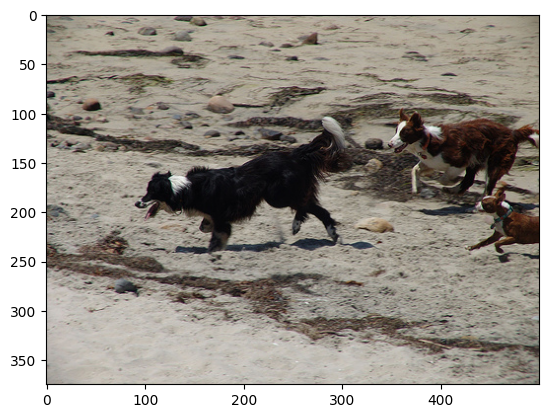

Greedy Search: three dogs are running on the beach
Beam Search, K = 3: three dogs are bearing each other on the beach next to a lake
Beam Search, K = 5: three dogs play together on the beach
Beam Search, K = 7: three dogs look at each other on the beach next to the ocean
Beam Search, K = 10: three dogs look at each other on the beach next to a lake


In [44]:
from tensorflow.keras.preprocessing import image
test_model = Xception(include_top=False, pooling='avg')
pic = 'data/Images/496555371_3e1ee0d97d.jpg'
img, feat = extract_features(pic, test_model)
x=plt.imread(pic)
plt.imshow(x)
plt.show()

print("Greedy Search:",greedySearch(feat))
print("Beam Search, K = 3:",beam_search_predictions(feat, beam_index = 3))
print("Beam Search, K = 5:",beam_search_predictions(feat, beam_index = 5))
print("Beam Search, K = 7:",beam_search_predictions(feat, beam_index = 7))
print("Beam Search, K = 10:",beam_search_predictions(feat, beam_index = 10))

1/1 [==============================] - 1s 716ms/step


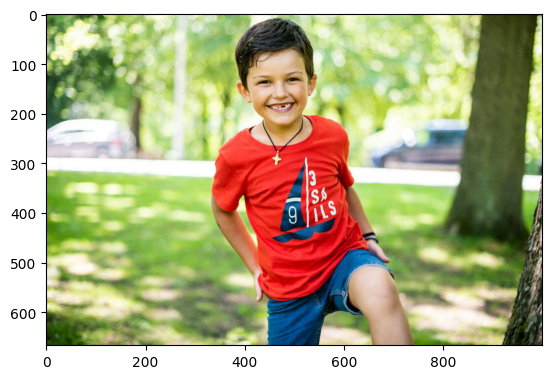

Greedy Search: a boy in a red shirt is running in a park
Beam Search, K = 3: a young boy in a blue shirt is running in the grass
Beam Search, K = 5: a little boy in a blue shirt is running through a grassy area
Beam Search, K = 7: a little boy in a blue shirt plays with a water bottle
Beam Search, K = 10: a little boy in a blue shirt plays with a water bottle


In [45]:
from tensorflow.keras.preprocessing import image
test_model = Xception(include_top=False, pooling='avg')
pic = 'red boy.jpeg'
img, feat = extract_features(pic, test_model)
x=plt.imread(pic)
plt.imshow(x)
plt.show()

print("Greedy Search:",greedySearch(feat))
print("Beam Search, K = 3:",beam_search_predictions(feat, beam_index = 3))
print("Beam Search, K = 5:",beam_search_predictions(feat, beam_index = 5))
print("Beam Search, K = 7:",beam_search_predictions(feat, beam_index = 7))
print("Beam Search, K = 10:",beam_search_predictions(feat, beam_index = 10))